In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
pd.options.mode.chained_assignment = None

In [308]:
df_train = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\application_train.csv')

In [302]:
df_train = df_train[df_train['SK_ID_CURR'] <=216091]
df_train.shape

(100001, 122)

In [306]:
df_train['EMERGENCYSTATE_MODE_No'].isnull().sum()

0

In [304]:
df_train = pd.get_dummies(df_train)
df_train.shape

(100001, 246)

In [ ]:
#iv, vif

In [18]:
bureau = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\bureau.csv')

In [19]:
bureau.columns.values

array(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE',
       'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY'], dtype=object)

In [20]:
bureau_dummies = bureau[['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']]
bureau_numeric = bureau[['SK_ID_CURR', 'SK_ID_BUREAU',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE',
       'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY']]

In [21]:
bureau1 = bureau[['SK_ID_CURR']]
bureau1 = bureau1.drop_duplicates('SK_ID_CURR')
bureau1 = pd.DataFrame(bureau1)
bureau1.shape

(305811, 1)

In [8]:
def grouper(w, x, z):
    y = x.groupby('SK_ID_CURR', as_index=False)[z].mean()
    df_train2 = pd.concat([w, y[z]], axis=1)
    return df_train2

In [22]:
days_credit = grouper(bureau1, bureau, 'DAYS_CREDIT')
credit_day_overdue = grouper(bureau1, bureau, 'CREDIT_DAY_OVERDUE')
days_credit_enddate = grouper(bureau1, bureau, 'DAYS_CREDIT_ENDDATE')
days_enddate_fact = grouper(bureau1, bureau, 'DAYS_ENDDATE_FACT')
amt_credit_maxoverdue = grouper(bureau1, bureau, 'AMT_CREDIT_MAX_OVERDUE')
cnt_credit_prolong = grouper(bureau1, bureau, 'CNT_CREDIT_PROLONG')
amt_credit_sum = grouper(bureau1, bureau, 'AMT_CREDIT_SUM')
amt_credit_sum_debt = grouper(bureau1, bureau, 'AMT_CREDIT_SUM_DEBT')
amt_credit_sum_limit = grouper(bureau1, bureau, 'AMT_CREDIT_SUM_LIMIT')
amt_credit_sum_overdue = grouper(bureau1, bureau, 'AMT_CREDIT_SUM_OVERDUE')
days_credit_update = grouper(bureau1, bureau, 'DAYS_CREDIT_UPDATE')
amt_annuity = grouper(bureau1, bureau, 'AMT_ANNUITY')
amt_annuity.shape

(539751, 2)

In [23]:
df_train = pd.merge(df_train, days_credit, how='left', on = 'SK_ID_CURR')
df_train = pd.merge(df_train, credit_day_overdue, how='left', on = 'SK_ID_CURR')
df_train = pd.merge(df_train, days_credit_enddate, how='left', on = 'SK_ID_CURR')
df_train = pd.merge(df_train, days_enddate_fact, how='left', on = 'SK_ID_CURR')
df_train = pd.merge(df_train, amt_credit_maxoverdue, how='left', on = 'SK_ID_CURR')
df_train = pd.merge(df_train, cnt_credit_prolong, how='left', on = 'SK_ID_CURR')
df_train = pd.merge(df_train, amt_credit_sum, how='left', on = 'SK_ID_CURR')
df_train = pd.merge(df_train, amt_credit_sum_debt, how='left', on = 'SK_ID_CURR')
df_train = pd.merge(df_train, amt_credit_sum_limit, how='left', on = 'SK_ID_CURR')
df_train = pd.merge(df_train, amt_credit_sum_overdue, how='left', on = 'SK_ID_CURR')
df_train = pd.merge(df_train, days_credit_update, how='left', on = 'SK_ID_CURR')
df_train = pd.merge(df_train, amt_annuity, how='left', on = 'SK_ID_CURR')

In [24]:
df_train.shape

(100001, 134)

In [12]:
def dummies(x, z):
    y = x.drop_duplicates(z)
    y = pd.get_dummies(y)
    return y

In [13]:
bureau_dummies = dummies(bureau_dummies, 'SK_ID_CURR')
bureau_dummies.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,...,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,215354,5714462,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,162297,5714469,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
13,402440,5714475,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
14,238881,5714482,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
21,222183,5714491,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [14]:
bureau_dummies.shape

(305811, 22)

In [15]:
df_train = pd.merge(df_train, bureau_dummies, how='left', on='SK_ID_CURR')
df_train.shape

(100001, 155)

In [17]:
bb = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\bureau_balance.csv')
bb.shape

(27299925, 3)

In [18]:
bb_status = dummies(bb, 'SK_ID_BUREAU')
bb_status.shape

(817395, 10)

In [19]:
df_train = pd.merge(df_train, bb_status, how='left', on='SK_ID_BUREAU')
df_train.shape

(100001, 288)

In [20]:
def grouper1(x, z):
    y = x.groupby('SK_ID_BUREAU', as_index=False)[z].mean()
    return y

In [21]:
bb_months_balance = grouper1(bb, 'MONTHS_BALANCE')
bb_months_balance.shape

(817395, 2)

In [22]:
df_train = pd.merge(df_train, bb_months_balance, how='left', on='SK_ID_BUREAU')
df_train.shape

(100001, 289)

In [23]:
#The next sheet we will look at is POS_Cash

In [24]:
pc = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\POS_CASH_balance.csv')
pc.shape

(10001358, 8)

In [25]:
pc.columns.values
#It looks like there is only 1 column in this set that we will need to make dummy columns for
#The rest are all numeric

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'], dtype=object)

In [26]:
pc_df = pc[['SK_ID_CURR']]
pc_df = pc.drop_duplicates('SK_ID_CURR')
pc_df.shape

(337252, 8)

In [27]:
def grouper1(x, z):
    y = x.groupby('SK_ID_CURR', as_index=False)[z].mean()
    return y

In [28]:
months_balance = grouper1(pc, 'MONTHS_BALANCE')
cnt_instalment = grouper1(pc, 'CNT_INSTALMENT')
cnt_instalment_future = grouper1(pc, 'CNT_INSTALMENT_FUTURE')
sk_dpd = grouper1(pc, 'SK_DPD')
sk_dpd_def = grouper1(pc, 'SK_DPD_DEF')
months_balance.shape

(337252, 2)

In [29]:
months_balance = months_balance[['SK_ID_CURR', 'MONTHS_BALANCE']]
cnt_instalment = cnt_instalment[['SK_ID_CURR', 'CNT_INSTALMENT']]
cnt_instalment_future = cnt_instalment_future[['SK_ID_CURR', 'CNT_INSTALMENT_FUTURE']]
sk_dpd = sk_dpd[['SK_ID_CURR', 'SK_DPD']]
sk_dpd_def = sk_dpd_def[['SK_ID_CURR', 'SK_DPD_DEF']]
months_balance.shape

(337252, 2)

In [30]:
months_balance.columns.values

array(['SK_ID_CURR', 'MONTHS_BALANCE'], dtype=object)

In [31]:
df_train = pd.merge(df_train, months_balance, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, cnt_instalment, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, cnt_instalment_future, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, sk_dpd, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, sk_dpd_def, how='left', on='SK_ID_CURR')
df_train.shape

(100001, 294)

In [32]:
pc_dummies = pc[['SK_ID_CURR', 'NAME_CONTRACT_STATUS']]
pc_dummies = dummies(pc_dummies, 'SK_ID_CURR')
df_train = pd.merge(df_train, pc_dummies, how='left', on='SK_ID_CURR')

In [33]:
df_train.shape

(100001, 301)

In [34]:
#The next sheet we will look at is credit_card_balance
cc = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\credit_card_balance.csv')

In [35]:
cc.columns.values
#It looks like there is only one column that we will need to create dummy columns for

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE',
       'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',
       'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM',
       'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF'], dtype=object)

In [36]:
cc_dummies = cc[['SK_ID_CURR', 'NAME_CONTRACT_STATUS']]
cc_dummies = dummies(cc_dummies, 'SK_ID_CURR')
cc_dummies.shape

(103558, 6)

In [37]:
df_train = pd.merge(df_train, cc_dummies, how='left', on='SK_ID_CURR')

In [38]:
df_train.shape

(100001, 306)

In [39]:
cc_df = cc[['SK_ID_CURR']]
cc_df=  cc_df.drop_duplicates('SK_ID_CURR')
cc_df = pd.DataFrame(cc_df)
cc_df.shape

(103558, 1)

In [40]:
months_balance = grouper1(cc, 'MONTHS_BALANCE')
amt_balance = grouper1(cc, 'AMT_BALANCE')
amt_credit_limit_actual = grouper1(cc, 'AMT_CREDIT_LIMIT_ACTUAL')
amt_drawings_atm_current = grouper1(cc, 'AMT_DRAWINGS_ATM_CURRENT')
amt_drawings_current = grouper1(cc, 'AMT_DRAWINGS_CURRENT')
amt_drawings_other_current = grouper1(cc, 'AMT_DRAWINGS_OTHER_CURRENT')
amt_drawings_pos_current = grouper1(cc, 'AMT_DRAWINGS_POS_CURRENT')
amt_inst_min_regularity = grouper1(cc, 'AMT_INST_MIN_REGULARITY')
amt_payment_current = grouper1(cc, 'AMT_PAYMENT_CURRENT')
amt_payment_total_current = grouper1(cc, 'AMT_PAYMENT_TOTAL_CURRENT')
amt_receivable_principal = grouper1(cc, 'AMT_RECEIVABLE_PRINCIPAL')
amt_receivable = grouper1(cc, 'AMT_RECIVABLE')
amt_total_receivable = grouper1(cc, 'AMT_TOTAL_RECEIVABLE')
cnt_drawings_atm_current = grouper1(cc, 'CNT_DRAWINGS_ATM_CURRENT')
cnt_drawings_current = grouper1(cc, 'CNT_DRAWINGS_ATM_CURRENT')
cnt_drawings_other_current = grouper1(cc, 'CNT_DRAWINGS_OTHER_CURRENT')
cnt_drawings_pos_current = grouper1(cc, 'CNT_DRAWINGS_POS_CURRENT')
cnt_instalment_mature_cum = grouper1(cc, 'CNT_INSTALMENT_MATURE_CUM')
months_balance.shape

(103558, 2)

In [41]:
months_balance.columns.values

array(['SK_ID_CURR', 'MONTHS_BALANCE'], dtype=object)

In [42]:
df_train = pd.merge(df_train, months_balance, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_balance, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_credit_limit_actual, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_drawings_atm_current, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_drawings_current, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_drawings_other_current, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_drawings_pos_current, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_inst_min_regularity, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_payment_current, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_payment_total_current, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_receivable_principal, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_receivable, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, cnt_drawings_atm_current, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, cnt_drawings_current, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, cnt_drawings_other_current, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, cnt_drawings_pos_current, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, cnt_instalment_mature_cum, how='left', on='SK_ID_CURR')

In [43]:
df_train.shape

(100001, 323)

In [44]:
pa = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\previous_application.csv')
pa.shape

(1670214, 37)

In [45]:
pa.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

In [46]:
def dummies(x, z):
    y = x.drop_duplicates(z)
    y = pd.get_dummies(y)
    return y

In [47]:
pa_dummies = pa[['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
                'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 
                'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 
                'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']]
pa_dummies = dummies(pa_dummies, 'SK_ID_CURR')
pa_dummies.shape

(338857, 143)

In [48]:
df_train = pd.merge(df_train, pa_dummies, how= 'left', on='SK_ID_CURR')

In [49]:
df_train.shape

(100001, 465)

In [50]:
pa_df = pa[['SK_ID_CURR']]
pa_df = pa.drop_duplicates('SK_ID_CURR')
pa_df = pd.DataFrame(pa_df)

In [51]:
amt_annuity = grouper1(pa, 'AMT_ANNUITY')
amt_application = grouper1(pa, 'AMT_APPLICATION')
amt_credit = grouper1(pa, 'AMT_CREDIT')
amt_down_payment = grouper1(pa, 'AMT_DOWN_PAYMENT')
amt_goods_price = grouper1(pa, 'AMT_GOODS_PRICE')
hour_appr_process_start = grouper1(pa, 'HOUR_APPR_PROCESS_START')
rate_down_payment = grouper1(pa, 'RATE_DOWN_PAYMENT')
rate_interest_primary = grouper1(pa, 'RATE_INTEREST_PRIMARY')
rate_interest_privileged = grouper1(pa, 'RATE_INTEREST_PRIVILEGED')
days_decision = grouper1(pa, 'DAYS_DECISION')
sellerplace_area = grouper1(pa, 'SELLERPLACE_AREA')
cnt_payment = grouper1(pa, 'CNT_PAYMENT')
days_first_drawing = grouper1(pa, 'DAYS_FIRST_DRAWING')
days_first_due = grouper1(pa, 'DAYS_FIRST_DUE')
days_last_due_1st_version = grouper1(pa, 'DAYS_LAST_DUE_1ST_VERSION')
days_last_due = grouper1(pa, 'DAYS_LAST_DUE')
days_termination = grouper1(pa, 'DAYS_TERMINATION')
nflag_insured_on_approval = grouper1(pa, 'NFLAG_INSURED_ON_APPROVAL')
amt_annuity.shape

(338857, 2)

In [52]:
df_train = pd.merge(df_train, amt_annuity, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_application, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_credit, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_down_payment, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_goods_price, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, hour_appr_process_start, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, rate_down_payment, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, rate_interest_primary, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, rate_interest_privileged, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, days_decision, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, sellerplace_area, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, cnt_payment, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, days_first_drawing, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, days_first_due, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, days_last_due_1st_version, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, days_last_due, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, days_termination, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, nflag_insured_on_approval, how='left', on='SK_ID_CURR')

In [53]:
df_train.shape

(100001, 483)

In [54]:
#The last sheet we will look at is installments_payments
ip = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\installments_payments.csv')
ip.shape

(13605401, 8)

In [55]:
ip.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'], dtype=object)

In [56]:
num_instalment_version = grouper1(ip, 'NUM_INSTALMENT_VERSION')
num_instalment_number = grouper1(ip, 'NUM_INSTALMENT_NUMBER')
days_instalment = grouper1(ip, 'DAYS_INSTALMENT')
days_entry_payment = grouper1(ip, 'DAYS_ENTRY_PAYMENT')
amt_payment = grouper1(ip, 'AMT_PAYMENT')
amt_instalment = grouper1(ip, 'AMT_INSTALMENT')
days_instalment.shape

(339587, 2)

In [57]:
num_instalment_version = num_instalment_version[['SK_ID_CURR', 'NUM_INSTALMENT_VERSION']]
num_instalment_number = num_instalment_number[['SK_ID_CURR', 'NUM_INSTALMENT_NUMBER']]
days_instalment = days_instalment[['SK_ID_CURR', 'DAYS_INSTALMENT']]
days_entry_payment = days_entry_payment[['SK_ID_CURR', 'DAYS_ENTRY_PAYMENT']]
amt_payment = amt_payment[['SK_ID_CURR', 'AMT_PAYMENT']]
amt_instalment = amt_instalment[['SK_ID_CURR', 'AMT_INSTALMENT']]

In [58]:
df_train = pd.merge(df_train, num_instalment_version, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, num_instalment_number, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, days_instalment, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, days_entry_payment, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_instalment, how='left', on='SK_ID_CURR')
df_train = pd.merge(df_train, amt_payment, how='left', on='SK_ID_CURR')

In [59]:
df_train.shape

(100001, 489)

In [60]:
df_train.to_csv('C:\\Users\\tilleymusprime\\Desktop\\df_train_clean.csv')

In [8]:
df_train.columns.values

array(['Unnamed: 0', 'SK_ID_CURR', 'TARGET', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       'AMT_GOODS_PRICE_x', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START_x', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',

In [ ]:
#Now that we have put all of the data together in one dataframe, we will continue the cleaning process.
#We will first go through each column and create a histogram so we can get a general idea of the data
#After that, we will fill in missing values for each column
#Finally, we will do some statistical analysis by comparing each chart against target to see if any particular categories 
#stand out for our future model.

In [309]:
df_train = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\df_train_clean.csv')

In [310]:
df_train['EMERGENCYSTATE_MODE_No'].isnull().sum()

0

In [26]:
def hist_maker(w, x, y, z):
    plt.hist(x, bins = w)
    plt.xlabel(y)
    plt.ylabel('Count')
    plt.title(z)
    plt.show()

In [27]:
def successrate(x):
    a =success1[success1[x] == 1]
    b= success0[success0[x] == 0]
    d = df_train.shape
    return a/d, b/d

In [64]:
#Now that we have our plotting formulas set, we will use weight of evidence to determine what variables are most important
#We will also check the information value of the data as well.  This will allow us to see what variables are important
#It will also reduce the number of columns in the data frame.  In this situation, we will keep all variables between 
#0.02 and 0.5. The rest will either be considered unrelated or too good to be true
# The code for this is available at https://github.com/Sundar0989/WOE-and-IV/blob/master/WOE_IV.ipynb

In [65]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [69]:
final_iv, IV = data_vars(df_train, df_train.TARGET)

C:\Users\tilleymusprime\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in log
C:\Users\tilleymusprime\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in log
C:\Users\tilleymusprime\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: RuntimeWarning: divide by zero encountered in log
C:\Users\tilleymusprime\Anaconda3\lib\site-packages\ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in log


In [7]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,Unnamed: 0,0.000000,3.333300e+04,33334,2682.0,0.080458,30652.0,0.919542,0.331398,0.333507,-0.006347,0.000046
1,Unnamed: 0,33334.000000,6.666600e+04,33333,2690.0,0.080701,30643.0,0.919299,0.332386,0.333409,-0.003074,0.000046
2,Unnamed: 0,66667.000000,1.000000e+05,33334,2721.0,0.081628,30613.0,0.918372,0.336216,0.333083,0.009363,0.000046
3,SK_ID_CURR,100002.000000,1.386200e+05,33334,2682.0,0.080458,30652.0,0.919542,0.331398,0.333507,-0.006347,0.000046
4,SK_ID_CURR,138621.000000,1.773060e+05,33333,2690.0,0.080701,30643.0,0.919299,0.332386,0.333409,-0.003074,0.000046
5,SK_ID_CURR,177307.000000,2.160910e+05,33334,2721.0,0.081628,30613.0,0.918372,0.336216,0.333083,0.009363,0.000046
6,CNT_CHILDREN,0.000000,1.000000e+00,89992,7222.0,0.080252,82770.0,0.919748,0.892376,0.900574,-0.009145,0.000725
7,CNT_CHILDREN,2.000000,1.200000e+01,10009,871.0,0.087022,9138.0,0.912978,0.107624,0.099426,0.079234,0.000725
8,AMT_INCOME_TOTAL,25650.000000,1.170000e+05,33532,2853.0,0.085083,30679.0,0.914917,0.352527,0.333801,0.054581,0.007440
9,AMT_INCOME_TOTAL,117130.500000,1.800000e+05,36608,3112.0,0.085009,33496.0,0.914991,0.384530,0.364451,0.053628,0.007440


In [8]:
IV.sort_values('IV')

,VAR_NAME,IV
247,NAME_FAMILY_STATUS_Unknown,1.183847e-10
128,FLAG_DOCUMENT_12,1.183847e-10
150,FLAG_MOBIL,1.183847e-10
284,NAME_INCOME_TYPE_Maternity leave,1.183847e-10
126,FLAG_DOCUMENT_10,4.735415e-10
61,CODE_GENDER_XNA,1.065474e-09
282,NAME_INCOME_TYPE_Businessman,1.894187e-09
287,NAME_INCOME_TYPE_Student,9.589581e-09
140,FLAG_DOCUMENT_4,2.320505e-08
409,ORGANIZATION_TYPE_Trade: type 4,2.320505e-08


In [311]:
#Based on the above data, we will use all columns with a score between 0.02 and 0.7
df_train = df_train[['SK_ID_CURR', 'SK_ID_BUREAU', 'TARGET', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH',
                    'NAME_EDUCATION_TYPE_Higher education', 'CNT_DRAWINGS_ATM_CURRENT_x', 'CNT_DRAWINGS_ATM_CURRENT_y',
                    'AMT_DRAWINGS_CURRENT', 'AMT_BALANCE', 'AMT_RECIVABLE', 'AMT_RECEIVABLE_PRINCIPAL', 
                    'NAME_INCOME_TYPE_Working', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'DAYS_DECISION', 'TOTALAREA_MODE',
                    'FLOORSMAX_MODE', 'CODE_GENDER_M', 'CODE_GENDER_F', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ENTRY_PAYMENT',
                    'NAME_EDUCATION_TYPE_Secondary / secondary special', 'LIVINGAREA_MEDI', 'LIVINGAREA_AVG', 'DAYS_INSTALMENT',
                    'AMT_DRAWINGS_ATM_CURRENT', 'LIVINGAREA_MODE', 'DAYS_ID_PUBLISH', 'YEARS_BEGINEXPLUATATION_MEDI',
                    'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'APARTMENTS_AVG', 'AMT_INST_MIN_REGULARITY',
                    'APARTMENTS_MEDI', 'AMT_DOWN_PAYMENT', 'APARTMENTS_MODE', 'AMT_GOODS_PRICE_x', 'AMT_PAYMENT',
                    'ENTRANCES_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'NAME_INCOME_TYPE_Pensioner', 'ORGANIZATION_TYPE_XNA',
                    'CNT_DRAWINGS_POS_CURRENT', 'FLAG_EMP_PHONE', 'EMERGENCYSTATE_MODE_Yes', 'REGION_RATING_CLIENT_W_CITY',
                    'REG_CITY_NOT_WORK_CITY', 'REGION_RATING_CLIENT', 'HOUSETYPE_MODE_block of flats', 'FLAG_DOCUMENT_3',
                    'SELLERPLACE_AREA', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'NONLIVINGAREA_AVG',
                    'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'ELEVATORS_MEDI', 
                    'DAYS_LAST_DUE_1ST_VERSION', 'BASEMENTAREA_AVG', 'OCCUPATION_TYPE_Laborers', 'FLOORSMIN_AVG',
                    'BASEMENTAREA_MEDI', 'OWN_CAR_AGE', 'FLOORSMIN_MODE', 'BASEMENTAREA_MODE', 'HOUR_APPR_PROCESS_START_y',
                    'AMT_INSTALMENT', 'MONTHS_BALANCE_x.1', 'CNT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
                    'AMT_PAYMENT_CURRENT', 'AMT_ANNUITY']]

In [312]:
#Here we will set up two dataframes for our bar plots.  The first is for the accounts with no payment problems.
#The second is for accounts with payment problems.
#When we are comparing the payment problem and non payment problem columns we will use two separate histograms instead of
#graphing them on the same chart.  This is due to the size difference of each sample.  When they are on they same plot,
#it can be hard to the success0 data set
success1 = df_train[df_train['TARGET'] == 1]
success0 = df_train[df_train['TARGET'] == 0]

In [313]:
def successrate(x):
    a =success1[success1[x] == 1]
    b= success0[success0[x] == 0]
    c= a.shape
    d = b.shape
    e = df_train.shape
    return c[0]/e[0], d[0]/e[0]

In [314]:
#The first column we will look at is TARGET
#This column indicates if the client had payment difficulties
#Since this column is all 1 and 0, we will just need to check for missing values
#Since this column is the dependent variable, hopefully it will not having any missing values
df_train['TARGET'].isnull().sum()

0

In [315]:
successrate('TARGET')
#It looks like roughly 91% of accounts do not have payment problems while roughly 9% of accounts do

(0.08092919070809292, 0.9190708092919071)

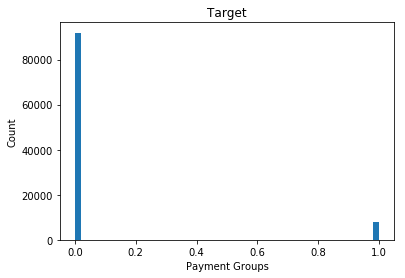

In [316]:
hist_maker(50, df_train['TARGET'], 'Payment Groups', 'Target')

In [317]:
df_train.columns.values

array(['SK_ID_CURR', 'SK_ID_BUREAU', 'TARGET', 'EXT_SOURCE_3',
       'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH',
       'NAME_EDUCATION_TYPE_Higher education',
       'CNT_DRAWINGS_ATM_CURRENT_x', 'CNT_DRAWINGS_ATM_CURRENT_y',
       'AMT_DRAWINGS_CURRENT', 'AMT_BALANCE', 'AMT_RECIVABLE',
       'AMT_RECEIVABLE_PRINCIPAL', 'NAME_INCOME_TYPE_Working',
       'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'DAYS_DECISION',
       'TOTALAREA_MODE', 'FLOORSMAX_MODE', 'CODE_GENDER_M',
       'CODE_GENDER_F', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ENTRY_PAYMENT',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'LIVINGAREA_MEDI', 'LIVINGAREA_AVG', 'DAYS_INSTALMENT',
       'AMT_DRAWINGS_ATM_CURRENT', 'LIVINGAREA_MODE', 'DAYS_ID_PUBLISH',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'APARTMENTS_AVG',
       'AMT_INST_MIN_REGULARITY', 'APARTMENTS_MEDI', 'AMT_DOWN_PAYMENT',
       'APARTMENTS_MODE', 'AMT_GOODS_PRICE_x', 'AMT_PAYME

In [318]:
#The next column we will look at is EXT_SOURCE_3.
#This is external data
df_train['EXT_SOURCE_3'].isnull().sum()
#It looks like there are quite a few missing values in this source.  Let's create histogram and see how we should fill the data

19827

In [319]:
df_train['EXT_SOURCE_3'] = df_train['EXT_SOURCE_3'].fillna(0)
success1['EXT_SOURCE_3'] = success1['EXT_SOURCE_3'].fillna(0)
success0['EXT_SOURCE_3'] = success0['EXT_SOURCE_3'].fillna(0)
#We will assume that the missing values are due to people having no credit so we will fill in 0

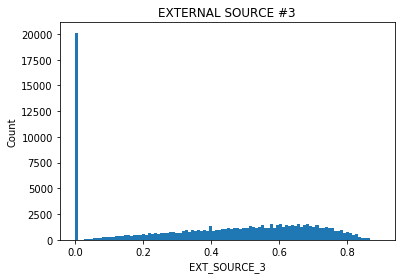

In [320]:
hist_maker(100, df_train['EXT_SOURCE_3'], 'EXT_SOURCE_3', 'EXTERNAL SOURCE #3')

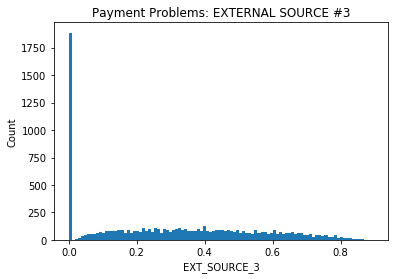

In [321]:
hist_maker(100, success1['EXT_SOURCE_3'], 'EXT_SOURCE_3', 'Payment Problems: EXTERNAL SOURCE #3')

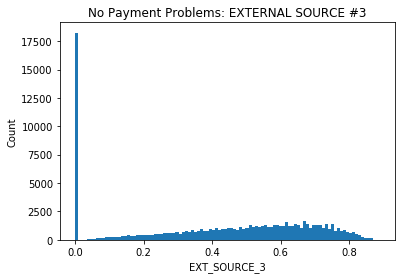

In [322]:
hist_maker(100, success0['EXT_SOURCE_3'], 'EXT_SOURCE_3', 'No Payment Problems: EXTERNAL SOURCE #3')

In [323]:
#It looks there are more payment problems with lower ratios of EXT_SOURCE 3 than with higher EXT_SOURCE2 ratios
# It looks like there is a negative relationship between these two.  As the score goes up, payment problems go down.
dfex3 = df_train[['TARGET', 'EXT_SOURCE_3']]
dfex3.corr()

,TARGET,EXT_SOURCE_3
TARGET,1.000000,-0.118977
EXT_SOURCE_3,-0.118977,1.000000


In [324]:
#the next column we will look at is EXT_SOURCE_2.
#This is another externdal data source
df_train['EXT_SOURCE_2'].isnull().sum()

215

In [325]:
df_train['EXT_SOURCE_2'] = df_train['EXT_SOURCE_2'].fillna(0)
success1['EXT_SOURCE_2'] = success1['EXT_SOURCE_2'].fillna(0)
success0['EXT_SOURCE_2'] = success0['EXT_SOURCE_2'].fillna(0)
#We will assume that the missing values are due to them being nonexistent and we will assign 0

In [326]:
dfex2 = df_train[['TARGET', 'EXT_SOURCE_2']]
dfex2.corr()

,TARGET,EXT_SOURCE_2
TARGET,1.000000,-0.159946
EXT_SOURCE_2,-0.159946,1.000000


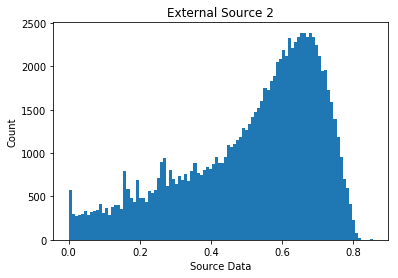

In [327]:
hist_maker(100, df_train['EXT_SOURCE_2'], 'Source Data', 'External Source 2')

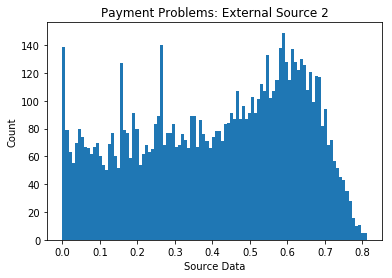

In [328]:
hist_maker(100, success1['EXT_SOURCE_2'], 'Source Data', 'Payment Problems: External Source 2')

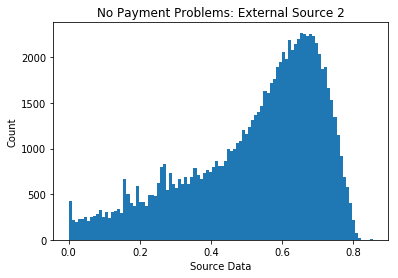

In [329]:
hist_maker(100, success0['EXT_SOURCE_2'], 'Source Data', 'No Payment Problems: External Source 2')

In [330]:
#It looks like there is a negative correlation between external source 2 and payment problems
#As the score goes up, the amount of payment problems goes down.  The charts above support this

In [331]:
#The next column we will look at is EXT_SOURCE_1
#This is another external data source
df_train['EXT_SOURCE_1'].isnull().sum()

56284

In [332]:
df_train['EXT_SOURCE_1'] = df_train['EXT_SOURCE_1'].fillna(0)
success1['EXT_SOURCE_1'] = df_train['EXT_SOURCE_1'].fillna(0)
success0['EXT_SOURCE_1'] = df_train['EXT_SOURCE_1'].fillna(0)

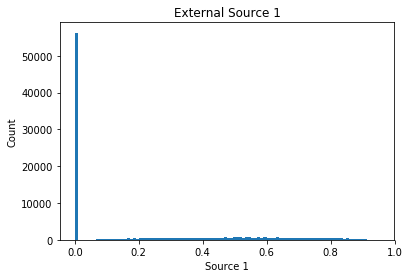

In [333]:
hist_maker(100, df_train['EXT_SOURCE_1'], 'Source 1', 'External Source 1')

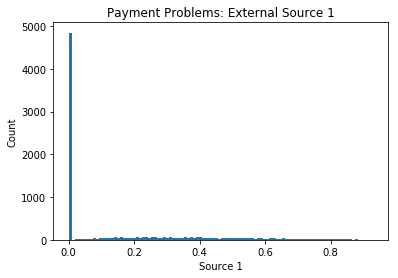

In [334]:
hist_maker(100, success1['EXT_SOURCE_1'], 'Source 1', 'Payment Problems: External Source 1')

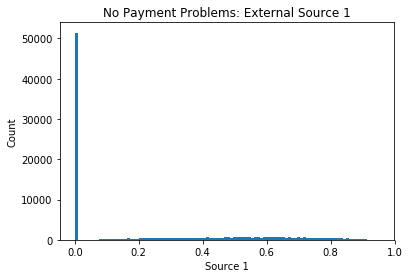

In [335]:
hist_maker(100, success0['EXT_SOURCE_1'], 'Source 1', 'No Payment Problems: External Source 1')

In [336]:
#It looks like there are fewer payment problems when there are higher source1 ratios
dfex1 = df_train[['TARGET', 'EXT_SOURCE_1']]
dfex1.corr()
#It looks like there is a slightly negative correlation between source 1 and payment problems.

,TARGET,EXT_SOURCE_1
TARGET,1.000000,-0.066402
EXT_SOURCE_1,-0.066402,1.000000


In [337]:
#The next column we will look at is days_birth
#This column indicates the age of the applicant
df_train['DAYS_BIRTH'].isnull().sum()

0

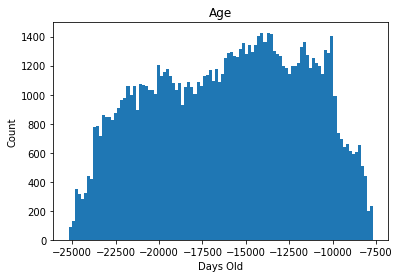

In [338]:
hist_maker(100, df_train['DAYS_BIRTH'], 'Days Old', 'Age')

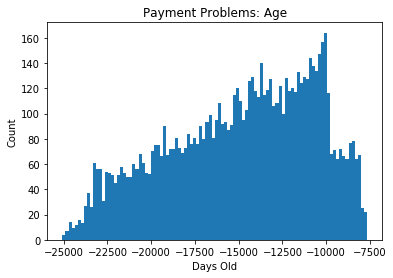

In [339]:
hist_maker(100, success1['DAYS_BIRTH'], 'Days Old', 'Payment Problems: Age')

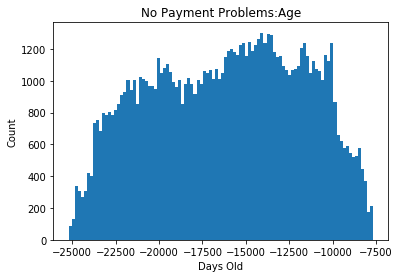

In [340]:
hist_maker(100, success0['DAYS_BIRTH'], 'Days Old', 'No Payment Problems:Age')


In [341]:
dfdb = df_train[['TARGET', 'DAYS_BIRTH']]
dfdb.corr()
#It looks like there are fewer payment problems as people get older.  It is important to note with the correlation
#below that days old is negative and 0 is no payment problems so this is why there is a slight positive relationship.

,TARGET,DAYS_BIRTH
TARGET,1.000000,0.076841
DAYS_BIRTH,0.076841,1.000000


In [342]:
#The next column we will look at is NAME_EDUCATION_TYPE_Higher education
#This column indicates whether or not an applicant has higher credit
#
df_train['NAME_EDUCATION_TYPE_Higher education'].isnull().sum()

0

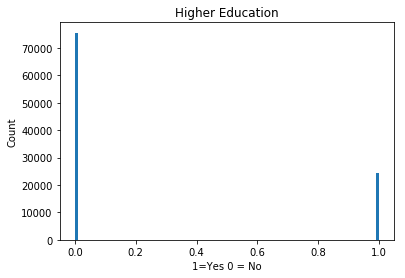

In [343]:
hist_maker(100, df_train['NAME_EDUCATION_TYPE_Higher education'], '1=Yes 0 = No', 'Higher Education')

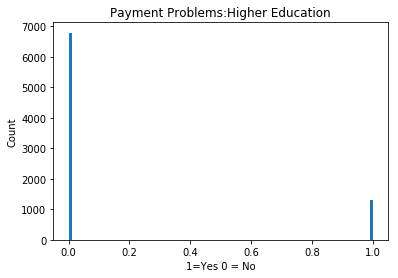

In [344]:
hist_maker(100, success1['NAME_EDUCATION_TYPE_Higher education'], '1=Yes 0 = No', 'Payment Problems:Higher Education')

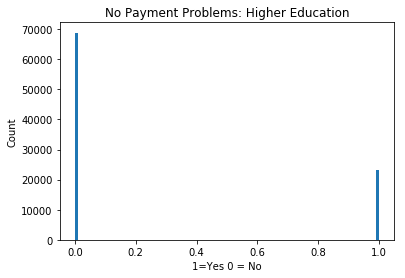

In [345]:
hist_maker(100, success0['NAME_EDUCATION_TYPE_Higher education'], '1=Yes 0 = No', 'No Payment Problems: Higher Education')

In [346]:
##It looks like there are fewer people with higher education with payment problems.
#This could be because people with student loan debt are more familiar with debt or have better job prospects
#The initial debt
dfex3 = df_train[['TARGET', 'NAME_EDUCATION_TYPE_Higher education']]
dfex3.corr()

,TARGET,NAME_EDUCATION_TYPE_Higher education
TARGET,1.000000,-0.057677
NAME_EDUCATION_TYPE_Higher education,-0.057677,1.000000


In [347]:
#The next column we will look at is CNT_DRAWINGS_ATM_CURRENT_x
#This column indicates the current atm drawings from the training data set
df_train['CNT_DRAWINGS_ATM_CURRENT_x'].isnull().sum()

80334

In [348]:
df_train['CNT_DRAWINGS_ATM_CURRENT_x'] = df_train['CNT_DRAWINGS_ATM_CURRENT_x'].fillna(0)
success1['CNT_DRAWINGS_ATM_CURRENT_x'] = success1['CNT_DRAWINGS_ATM_CURRENT_x'].fillna(0)
success0['CNT_DRAWINGS_ATM_CURRENT_x'] = success0['CNT_DRAWINGS_ATM_CURRENT_x'].fillna(0)
#We will asume that the missing values are due to there note being any drawings.

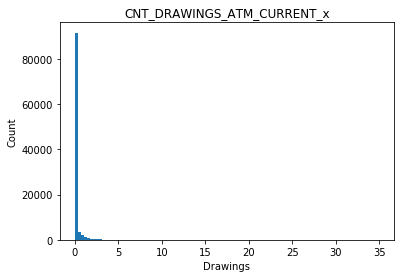

In [349]:
hist_maker(100, df_train['CNT_DRAWINGS_ATM_CURRENT_x'], 'Drawings', 'CNT_DRAWINGS_ATM_CURRENT_x')

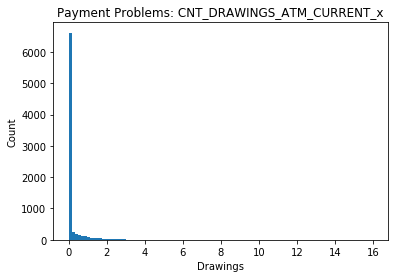

In [350]:
hist_maker(100, success1['CNT_DRAWINGS_ATM_CURRENT_x'], 'Drawings', 'Payment Problems: CNT_DRAWINGS_ATM_CURRENT_x')

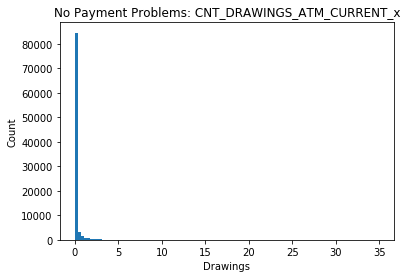

In [351]:
hist_maker(100, success0['CNT_DRAWINGS_ATM_CURRENT_x'], 'Drawings', 'No Payment Problems: CNT_DRAWINGS_ATM_CURRENT_x')

In [352]:
#It looks like there is a steeper dropoff in 
dfex3 = df_train[['TARGET', 'CNT_DRAWINGS_ATM_CURRENT_x']]
dfex3.corr()
#It looks like the higher drawings are then the more payment problems there are.

,TARGET,CNT_DRAWINGS_ATM_CURRENT_x
TARGET,1.000000,0.065686
CNT_DRAWINGS_ATM_CURRENT_x,0.065686,1.000000


In [353]:
#The next column we will look at is CNT_DRAWINGS_ATM_CURRENT_y
#This column indicates the amount of atm drawings from the creditcard balance datasheet
df_train['CNT_DRAWINGS_ATM_CURRENT_y'].isnull().sum()
#For the missing values, we will once again assume that the lack of data is due to the lack of drawings

80334

In [354]:
df_train['CNT_DRAWINGS_ATM_CURRENT_y'] = df_train['CNT_DRAWINGS_ATM_CURRENT_y'].fillna(0)
success1['CNT_DRAWINGS_ATM_CURRENT_y'] = success1['CNT_DRAWINGS_ATM_CURRENT_y'].fillna(0)
success0['CNT_DRAWINGS_ATM_CURRENT_y'] = success0['CNT_DRAWINGS_ATM_CURRENT_y'].fillna(0)

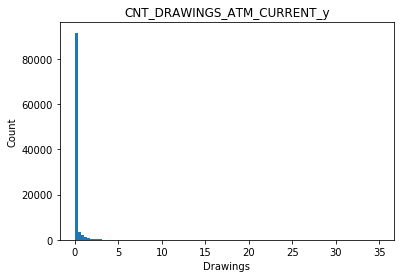

In [355]:
hist_maker(100, df_train['CNT_DRAWINGS_ATM_CURRENT_y'], 'Drawings', 'CNT_DRAWINGS_ATM_CURRENT_y')

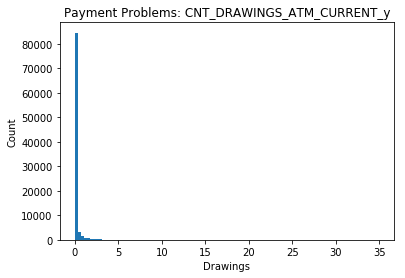

In [356]:
hist_maker(100, success0['CNT_DRAWINGS_ATM_CURRENT_y'], 'Drawings', 'Payment Problems: CNT_DRAWINGS_ATM_CURRENT_y')

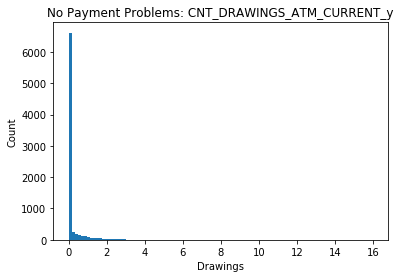

In [357]:
hist_maker(100, success1['CNT_DRAWINGS_ATM_CURRENT_y'], 'Drawings', 'No Payment Problems: CNT_DRAWINGS_ATM_CURRENT_y')

In [358]:
#There appears to be  a steeper dropoff with payment problems than with clients with no payment problems

In [359]:
#The next column we will look at is AMT_DRAWINGS_CURRENT
#This column indicates the current drawings from the credit card balance sheet
df_train['AMT_DRAWINGS_CURRENT'].isnull().sum()
#We will assume that the missing values are due to people not having a credit card so we will fill them with 0

71781

In [360]:
df_train['AMT_DRAWINGS_CURRENT'] = df_train['AMT_DRAWINGS_CURRENT'].fillna(0)
success1['AMT_DRAWINGS_CURRENT'] = success1['AMT_DRAWINGS_CURRENT'].fillna(0)
success0['AMT_DRAWINGS_CURRENT'] = success0['AMT_DRAWINGS_CURRENT'].fillna(0)

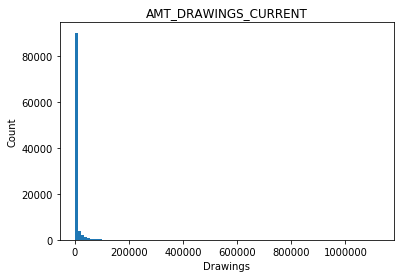

In [361]:
hist_maker(100, df_train['AMT_DRAWINGS_CURRENT'], 'Drawings', 'AMT_DRAWINGS_CURRENT')

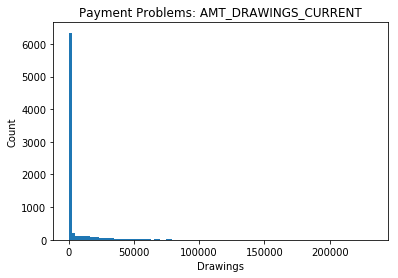

In [362]:
hist_maker(100, success1['AMT_DRAWINGS_CURRENT'], 'Drawings', 'Payment Problems: AMT_DRAWINGS_CURRENT')

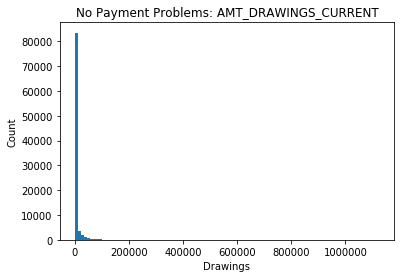

In [363]:
hist_maker(100, success0['AMT_DRAWINGS_CURRENT'], 'Drawings', 'No Payment Problems: AMT_DRAWINGS_CURRENT')

In [364]:
dfex3 = df_train[['TARGET', 'AMT_DRAWINGS_CURRENT']]
dfex3.corr()
#It looks like as drawings go up, there are more payment problems.  
#This makes sense as people with more current expenses might be more likely to have a payment problem.

,TARGET,AMT_DRAWINGS_CURRENT
TARGET,1.000000,0.035904
AMT_DRAWINGS_CURRENT,0.035904,1.000000


In [365]:
#The next column we will look at is AMT_BALANCE
#This column indicates the credit card balance amount in the credit card balance column.
df_train['AMT_BALANCE'].isnull().sum()
#We will assume that the missing values are due to the lack of credit card so we will fill in a 0

71781

In [366]:
#We will fill in the missing values with 0 based on our trusting the accountants principle
df_train['AMT_BALANCE'] = df_train['AMT_BALANCE'].fillna(0)
success1['AMT_BALANCE'] = success1['AMT_BALANCE'].fillna(0)
success0['AMT_BALANCE'] = success0['AMT_BALANCE'].fillna(0)

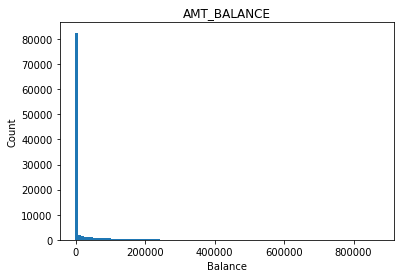

In [367]:
hist_maker(100, df_train['AMT_BALANCE'], 'Balance', 'AMT_BALANCE')

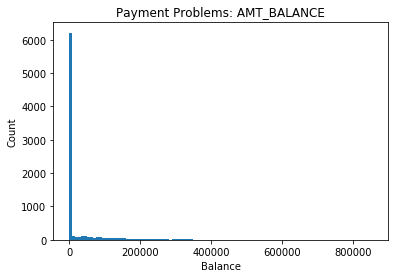

In [368]:
hist_maker(100, success1['AMT_BALANCE'], 'Balance', 'Payment Problems: AMT_BALANCE')

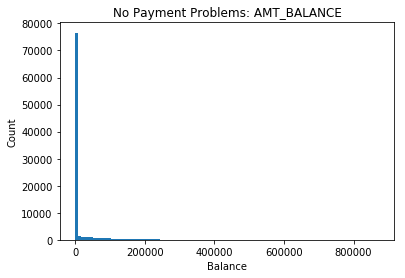

In [369]:
hist_maker(100, success0['AMT_BALANCE'], 'Balance', 'No Payment Problems: AMT_BALANCE')

In [370]:
dfex3 = df_train[['TARGET', 'AMT_BALANCE']]
dfex3.corr()
#It looks like there is a slightly positive correlation between amt balance and the amount of payment problems.

,TARGET,AMT_BALANCE
TARGET,1.000000,0.049816
AMT_BALANCE,0.049816,1.000000


In [371]:
#The next column we will look at is AMT_RECIVABLE
#This is from the credit card balance sheet
#It indicates the amount recievable on the previous credit
df_train['AMT_RECIVABLE'].isnull().sum()
#We will fill in the misssing values with 0 and assume they don't have that kind of account

71781

In [372]:
#We will fill in the missing values with 0 based on our trusting the accountants principle
df_train['AMT_RECIVABLE'] = df_train['AMT_RECIVABLE'].fillna(0)
success1['AMT_RECIVABLE'] = success1['AMT_RECIVABLE'].fillna(0)
success0['AMT_RECIVABLE'] = success0['AMT_RECIVABLE'].fillna(0)

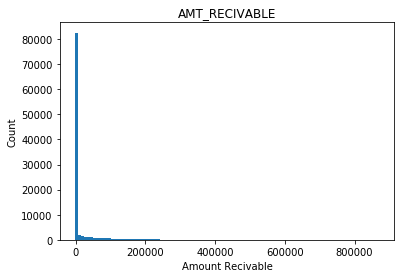

In [373]:
hist_maker(100, df_train['AMT_RECIVABLE'], 'Amount Recivable', 'AMT_RECIVABLE')

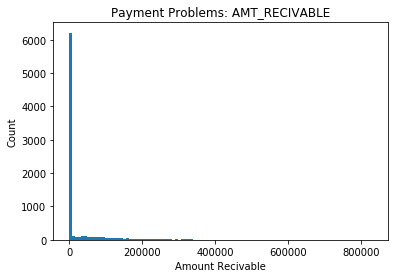

In [374]:
hist_maker(100, success1['AMT_RECIVABLE'], 'Amount Recivable', 'Payment Problems: AMT_RECIVABLE')

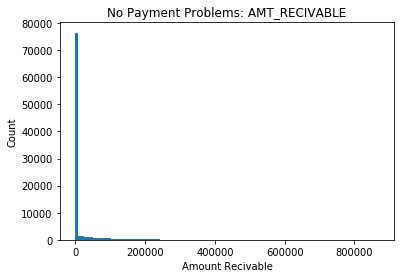

In [375]:
hist_maker(100, success0['AMT_RECIVABLE'], 'Amount Recivable', 'No Payment Problems: AMT_RECIVABLE')

In [376]:
dfex3 = df_train[['TARGET', 'AMT_RECIVABLE']]
dfex3.corr()
#It looks like there is a slightly positive relationship between amount receivable and payment problems

,TARGET,AMT_RECIVABLE
TARGET,1.00000,0.04946
AMT_RECIVABLE,0.04946,1.00000


In [377]:
#The next column we will look at is AMT_RECEIVABLE_PRINCIPAL
#this column indicates the amount of principal received on the last credit
#This comes from the credit card balance column.
df_train['AMT_RECEIVABLE_PRINCIPAL'].isnull().sum()

71781

In [378]:
#We will fill in the missing values with 0 based on our trusting the accountants principle
df_train['AMT_RECEIVABLE_PRINCIPAL'] = df_train['AMT_RECEIVABLE_PRINCIPAL'].fillna(0)
success1['AMT_RECEIVABLE_PRINCIPAL'] = success1['AMT_RECEIVABLE_PRINCIPAL'].fillna(0)
success0['AMT_RECEIVABLE_PRINCIPAL'] = success0['AMT_RECEIVABLE_PRINCIPAL'].fillna(0)

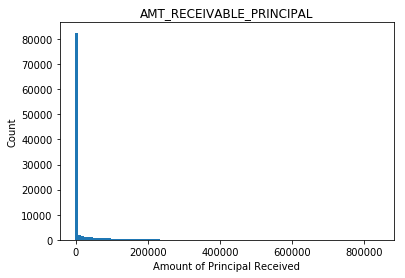

In [379]:
hist_maker(100, df_train['AMT_RECEIVABLE_PRINCIPAL'], 'Amount of Principal Received', 'AMT_RECEIVABLE_PRINCIPAL')

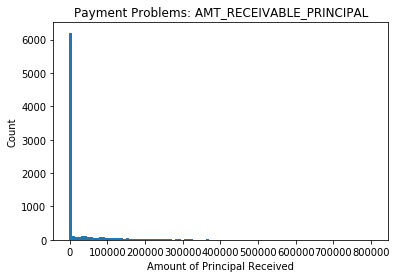

In [380]:
hist_maker(100, success1['AMT_RECEIVABLE_PRINCIPAL'], 'Amount of Principal Received', 'Payment Problems: AMT_RECEIVABLE_PRINCIPAL')

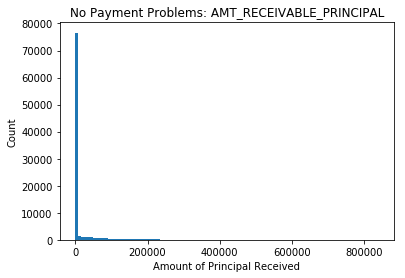

In [381]:
hist_maker(100, success0['AMT_RECEIVABLE_PRINCIPAL'], 'Amount of Principal Received', 'No Payment Problems: AMT_RECEIVABLE_PRINCIPAL')

In [382]:
dfex3 = df_train[['TARGET', 'AMT_RECEIVABLE_PRINCIPAL']]
dfex3.corr()
#It looks like there is a slighly positive correlation between these two categories.

,TARGET,AMT_RECEIVABLE_PRINCIPAL
TARGET,1.000000,0.049237
AMT_RECEIVABLE_PRINCIPAL,0.049237,1.000000


In [383]:
# The next column we will look at is NAME_INCOME_TYPE_Working
#This column describes if the applicant's income comes from working or not
df_train['NAME_INCOME_TYPE_Working'].isnull().sum()

0

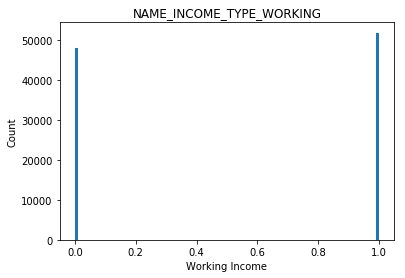

In [384]:
hist_maker(100, df_train['NAME_INCOME_TYPE_Working'], 'Working Income', 'NAME_INCOME_TYPE_WORKING')

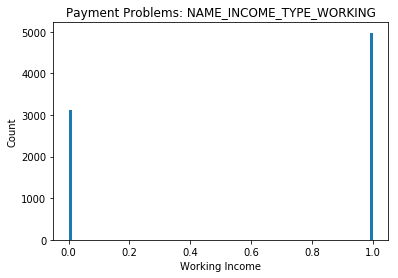

In [385]:
hist_maker(100, success1['NAME_INCOME_TYPE_Working'], 'Working Income', 'Payment Problems: NAME_INCOME_TYPE_WORKING')

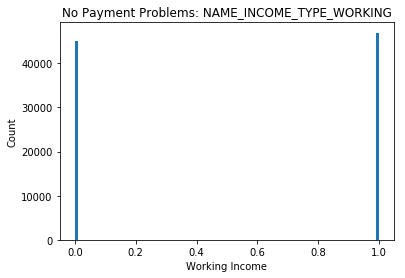

In [386]:
hist_maker(100, success0['NAME_INCOME_TYPE_Working'], 'Working Income', 'No Payment Problems: NAME_INCOME_TYPE_WORKING')

In [387]:
#In this column, it looks like there are more payment problems from people who derive their income from working.
#This could be due to job loss and longer time to come up with cash vs other income types.
dfex3 = df_train[['TARGET', 'NAME_INCOME_TYPE_Working']]
dfex3.corr()
#It looks like there is a slightly positive correlation

,TARGET,NAME_INCOME_TYPE_Working
TARGET,1.000000,0.057066
NAME_INCOME_TYPE_Working,0.057066,1.000000


In [388]:
#The next column we will look at is FLOORSMAX_AVG
#This column indicates the maximum average number of floors
df_train['FLOORSMAX_AVG'].isnull().sum()

49688

In [389]:
df_train['FLOORSMAX_AVG'] = df_train['FLOORSMAX_AVG'].fillna(0)
success1['FLOORSMAX_AVG'] = success1['FLOORSMAX_AVG'].fillna(0)
success0['FLOORSMAX_AVG'] = success0['FLOORSMAX_AVG'].fillna(0)
#We are going to assume that the accounts with no data are because they are not associated with residential loans.
#Because of this, we will fill in the missing values with 0.

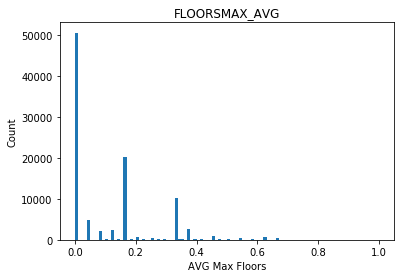

In [390]:
hist_maker(100, df_train['FLOORSMAX_AVG'], 'AVG Max Floors', 'FLOORSMAX_AVG')

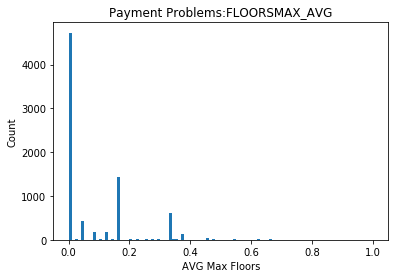

In [391]:
hist_maker(100, success1['FLOORSMAX_AVG'], 'AVG Max Floors', 'Payment Problems:FLOORSMAX_AVG')

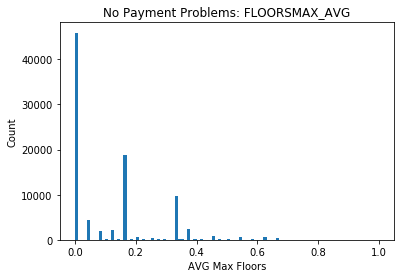

In [392]:
hist_maker(100, success0['FLOORSMAX_AVG'], 'AVG Max Floors', 'No Payment Problems: FLOORSMAX_AVG')

In [393]:
#All 3 charts look pretty similar so it doesn't look like this is an important variable.
dfex3 = df_train[['TARGET', 'FLOORSMAX_AVG']]
dfex3.corr()
#It looks like there is an inverse relationship between the maximum number of floors and payment problems
#The more floors there are, the fewer payment problems there are.
#This could be that larger projects have better management and more unit owners that smaller units or homes

,TARGET,FLOORSMAX_AVG
TARGET,1.000000,-0.053557
FLOORSMAX_AVG,-0.053557,1.000000


In [394]:
#The next column we will look at is FLOORSMAX_MEDI
#This column indicates the maximum floors median
df_train['FLOORSMAX_MEDI'].isnull().sum()

49688

In [395]:
df_train['FLOORSMAX_MEDI'] = df_train['FLOORSMAX_MEDI'].fillna(0)
success1['FLOORSMAX_MEDI'] = success1['FLOORSMAX_MEDI'].fillna(0)
success0['FLOORSMAX_MEDI'] = success0['FLOORSMAX_MEDI'].fillna(0)
#We will fill the missing values with 0 and assume that there are not any residential properties with missing data

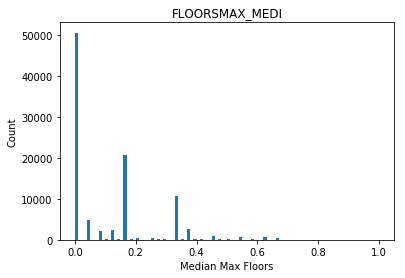

In [396]:
hist_maker(100, df_train['FLOORSMAX_MEDI'], 'Median Max Floors', 'FLOORSMAX_MEDI')

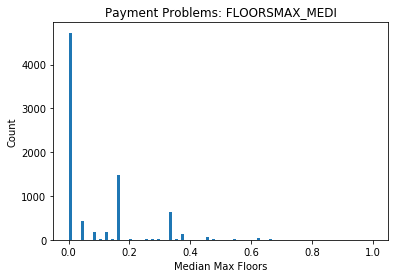

In [397]:
hist_maker(100, success1['FLOORSMAX_MEDI'], 'Median Max Floors', 'Payment Problems: FLOORSMAX_MEDI')

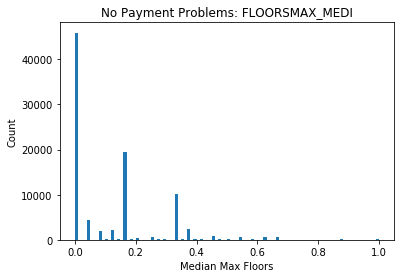

In [398]:
hist_maker(100, success0['FLOORSMAX_MEDI'], 'Median Max Floors', 'No Payment Problems: FLOORSMAX_MEDI')

In [399]:
#These 3 charts also look very similar so this probably is not a significant variable.
dfex3 = df_train[['TARGET', 'FLOORSMAX_MEDI']]
dfex3.corr()
#It looks like there is a slightly negative relationship between the median number of floors and payment problems

,TARGET,FLOORSMAX_MEDI
TARGET,1.000000,-0.053314
FLOORSMAX_MEDI,-0.053314,1.000000


In [400]:
#The next column we will look at is DAYS_DECISION
#This column is relative to the number of days it took to do the last application
#This column comes from the previous applicaiton sheet
df_train['DAYS_DECISION'].isnull().sum()

5346

In [401]:
df_train['DAYS_DECISION'] = df_train['DAYS_DECISION'].fillna(0)
success1['DAYS_DECISION'] = success1['DAYS_DECISION'].fillna(0)
success0['DAYS_DECISION'] = success0['DAYS_DECISION'].fillna(0)
#We will fill in the missing values with 0 and assume that these missing values are due to it being a type of loan that has
#instant approval

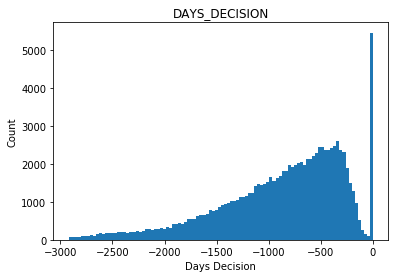

In [402]:
hist_maker(100, df_train['DAYS_DECISION'], 'Days Decision', 'DAYS_DECISION')

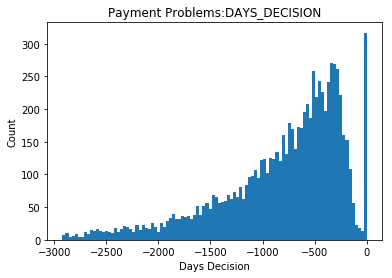

In [403]:
hist_maker(100, success1['DAYS_DECISION'], 'Days Decision', 'Payment Problems:DAYS_DECISION')

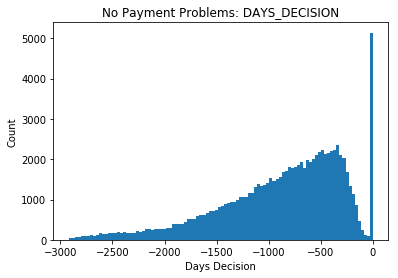

In [404]:
hist_maker(100, success0['DAYS_DECISION'], 'Days Decision', 'No Payment Problems: DAYS_DECISION')

In [405]:
#It looks like when they make quicker decisions there are more payment problems.
#They could look into what type of credit has a quicker applicaition process between 500 and 1000
dfex3 = df_train[['TARGET', 'DAYS_DECISION']]
dfex3.corr()
#It looks like there is a slightly psositve correlation between the number of days it takes and payment problems.

,TARGET,DAYS_DECISION
TARGET,1.000000,0.031398
DAYS_DECISION,0.031398,1.000000


In [406]:
#The next column we will look at is TOTALAREA_MODE.
#This column indicates the mode of the total area of the units and is from the original training sheet
df_train['TOTALAREA_MODE'].isnull().sum()

48223

In [407]:
df_train['TOTALAREA_MODE'] = df_train['TOTALAREA_MODE'].fillna(0)
success1['TOTALAREA_MODE'] = success1['TOTALAREA_MODE'].fillna(0)
success0['TOTALAREA_MODE'] = success0['TOTALAREA_MODE'].fillna(0)
#We will fill in these missing values with 0 and assume that they are not related to buildings.

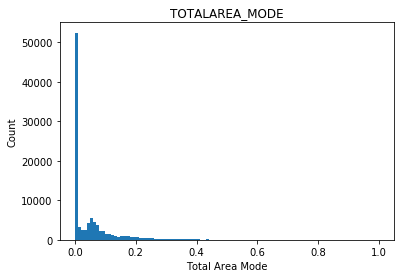

In [408]:
hist_maker(100, df_train['TOTALAREA_MODE'], 'Total Area Mode', 'TOTALAREA_MODE')

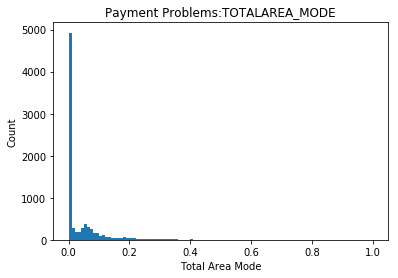

In [409]:
hist_maker(100, success1['TOTALAREA_MODE'], 'Total Area Mode', 'Payment Problems:TOTALAREA_MODE')

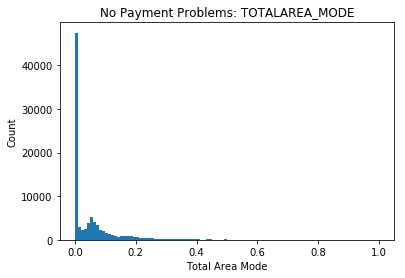

In [410]:
hist_maker(100, success0['TOTALAREA_MODE'], 'Total Area Mode', 'No Payment Problems: TOTALAREA_MODE')

In [411]:
#All three charts look pretty similar so this is probably not a significant variable
dfex3 = df_train[['TARGET', 'TOTALAREA_MODE']]
dfex3.corr()
#It looks like there is a slightly negative correlation between tota area mode and payment problems

,TARGET,TOTALAREA_MODE
TARGET,1.000000,-0.043472
TOTALAREA_MODE,-0.043472,1.000000


In [412]:
#The next column we will look at is FLOORSMAX_MODE
#This column indicates the mode of the max # of floors
#It is from the df_train sheet
df_train['FLOORSMAX_MODE'].isnull().sum()

49688

In [413]:
df_train['FLOORSMAX_MODE'] = df_train['FLOORSMAX_MODE'].fillna(0)
success1['FLOORSMAX_MODE'] = success1['FLOORSMAX_MODE'].fillna(0)
success0['FLOORSMAX_MODE'] = success0['FLOORSMAX_MODE'].fillna(0)

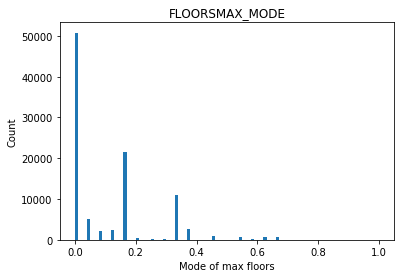

In [414]:
hist_maker(100, df_train['FLOORSMAX_MODE'], 'Mode of max floors', 'FLOORSMAX_MODE')

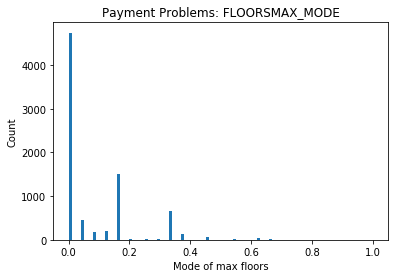

In [415]:
hist_maker(100, success1['FLOORSMAX_MODE'], 'Mode of max floors', 'Payment Problems: FLOORSMAX_MODE')

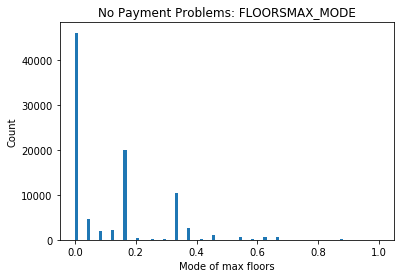

In [416]:
hist_maker(100, success0['FLOORSMAX_MODE'], 'Mode of max floors', 'No Payment Problems: FLOORSMAX_MODE')

In [417]:
#All three charts look pretty similar so this is probably not a significant variable.
dfex3 = df_train[['TARGET', 'FLOORSMAX_MODE']]
dfex3.corr()
#It looks like there is a negative correlation between floorsmax mode and payment problems

,TARGET,FLOORSMAX_MODE
TARGET,1.000000,-0.052969
FLOORSMAX_MODE,-0.052969,1.000000


In [418]:
#The next column we will look at is CODE_GENDER_M
#This column indicates if the gender of the applicant is male
df_train['CODE_GENDER_M'].isnull().sum()

0

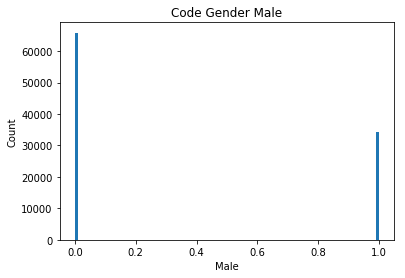

In [419]:
hist_maker(100, df_train['CODE_GENDER_M'], 'Male', 'Code Gender Male')

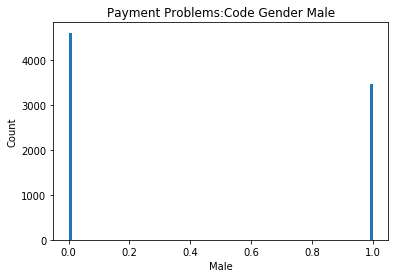

In [420]:
hist_maker(100, success1['CODE_GENDER_M'], 'Male', 'Payment Problems:Code Gender Male')

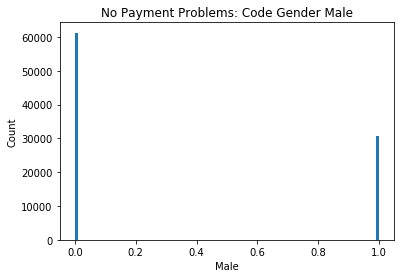

In [421]:
hist_maker(100, success0['CODE_GENDER_M'], 'Male', 'No Payment Problems: Code Gender Male')

In [422]:
#It looks like men have a higher rate of payment problems than women
dfex3 = df_train[['TARGET', 'CODE_GENDER_M']]
dfex3.corr()
#It looks like there is a psotive correlation between payment problems and men

,TARGET,CODE_GENDER_M
TARGET,1.000000,0.055281
CODE_GENDER_M,0.055281,1.000000


In [423]:
#The next column we will look at is CODE_GENDER_F
#This column indicates if the gender of the applicant is female
df_train['CODE_GENDER_F'].isnull().sum()

0

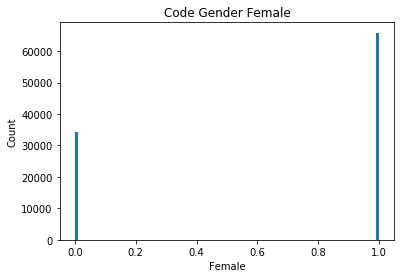

In [424]:
hist_maker(100, df_train['CODE_GENDER_F'], 'Female', 'Code Gender Female')

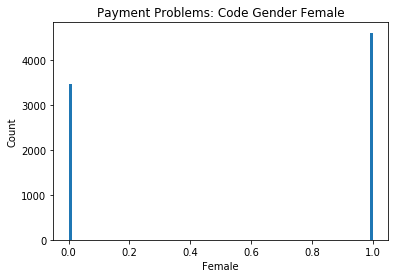

In [425]:
hist_maker(100, success1['CODE_GENDER_F'], 'Female', 'Payment Problems: Code Gender Female')

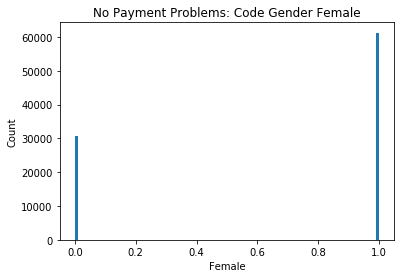

In [426]:
hist_maker(100, success0['CODE_GENDER_F'], 'Female', 'No Payment Problems: Code Gender Female')

In [427]:
#It looks like there is a lower ratio of women with payment problems 
dfex3 = df_train[['TARGET', 'CODE_GENDER_F']]
dfex3.corr()

,TARGET,CODE_GENDER_F
TARGET,1.000000,-0.055261
CODE_GENDER_F,-0.055261,1.000000


In [428]:
#The next column we will look at is DAYS_LAST_PHONE_CHANGE
#This column indicates the days since the client last changed phone numbers
df_train['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

1

In [429]:
df_train['DAYS_LAST_PHONE_CHANGE'] = df_train['DAYS_LAST_PHONE_CHANGE'].fillna(0)
success1['DAYS_LAST_PHONE_CHANGE'] = success1['DAYS_LAST_PHONE_CHANGE'].fillna(0)
success0['DAYS_LAST_PHONE_CHANGE'] = success0['DAYS_LAST_PHONE_CHANGE'].fillna(0)
#We will fill these missing values with 0 and assume the values are missing because they haven't changed their phone number

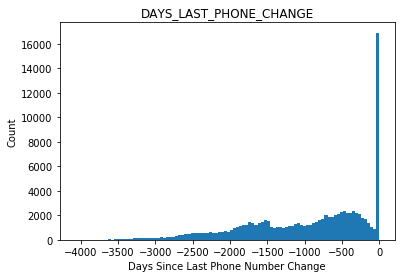

In [430]:
hist_maker(100, df_train['DAYS_LAST_PHONE_CHANGE'], 'Days Since Last Phone Number Change', 'DAYS_LAST_PHONE_CHANGE')

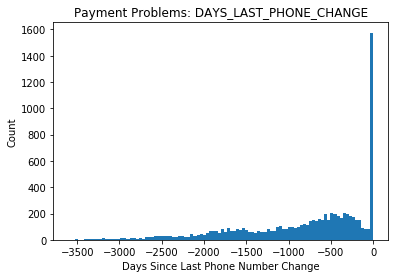

In [431]:
hist_maker(100, success1['DAYS_LAST_PHONE_CHANGE'], 'Days Since Last Phone Number Change', 'Payment Problems: DAYS_LAST_PHONE_CHANGE')

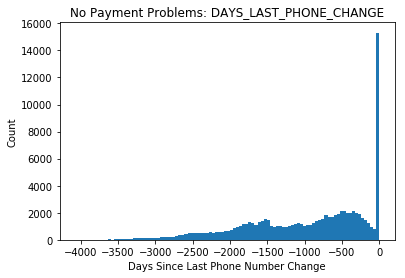

In [432]:
hist_maker(100, success0['DAYS_LAST_PHONE_CHANGE'], 'Days Since Last Phone Number Change', 'No Payment Problems: DAYS_LAST_PHONE_CHANGE')

In [433]:
#It looks like there is a higher rate of payment problems around 1500 days
dfex3 = df_train[['TARGET', 'DAYS_LAST_PHONE_CHANGE']]
dfex3.corr()
#It looks like there is a slightly positive correlation between the number of days since the last phone change and payment problems

,TARGET,DAYS_LAST_PHONE_CHANGE
TARGET,1.000000,0.053019
DAYS_LAST_PHONE_CHANGE,0.053019,1.000000


In [434]:
#The next column we will look at is DAYS_ENTRY_PAYMENT
#This column indicates when the insallments of previous credit were paid relative to the contract.
#This column originally comes from the installments_payments sheet
df_train['DAYS_ENTRY_PAYMENT'].isnull().sum()

5146

In [435]:
df_train['DAYS_ENTRY_PAYMENT'] = df_train['DAYS_ENTRY_PAYMENT'].fillna(0)
success1['DAYS_ENTRY_PAYMENT'] = success1['DAYS_ENTRY_PAYMENT'].fillna(0)
success0['DAYS_ENTRY_PAYMENT'] = success0['DAYS_ENTRY_PAYMENT'].fillna(0)
#We will assum the records are accurate and fill in the missing values with 0
#This assumes that the missing values did not make a payment 

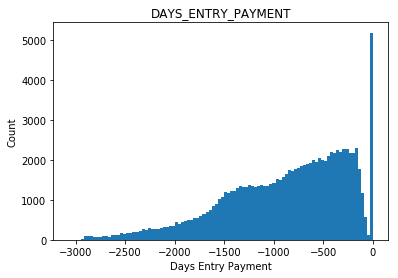

In [436]:
hist_maker(100, df_train['DAYS_ENTRY_PAYMENT'], 'Days Entry Payment', 'DAYS_ENTRY_PAYMENT')

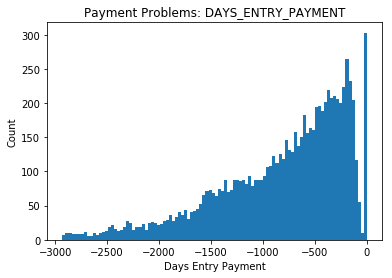

In [437]:
hist_maker(100, success1['DAYS_ENTRY_PAYMENT'], 'Days Entry Payment', 'Payment Problems: DAYS_ENTRY_PAYMENT')

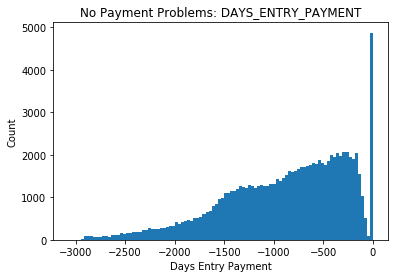

In [438]:
hist_maker(100, success0['DAYS_ENTRY_PAYMENT'], 'Days Entry Payment', 'No Payment Problems: DAYS_ENTRY_PAYMENT')

In [439]:
#It looks like there are more payment problems for people who paid 0 to 1000 days late.
#Making 2500+ day late payments didn't seem to have much of an effect on future payment problems.
dfex3 = df_train[['TARGET', 'DAYS_ENTRY_PAYMENT']]
dfex3.corr()
#It looks like there is a slight positive correlation between days entry payment and payment problems

,TARGET,DAYS_ENTRY_PAYMENT
TARGET,1.000000,0.031628
DAYS_ENTRY_PAYMENT,0.031628,1.000000


In [440]:
#The next column we will look at is NAME_EDUCATION_TYPE_Secondary / secondary special
#This column indicates if an applicant has acheived secondary education or not
df_train['NAME_EDUCATION_TYPE_Secondary / secondary special'].isnull().sum()

0

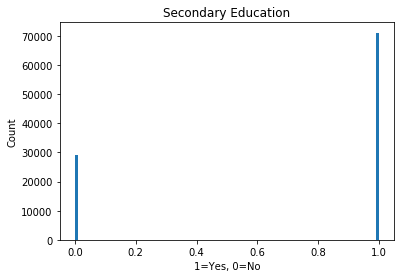

In [441]:
hist_maker(100, df_train['NAME_EDUCATION_TYPE_Secondary / secondary special'], '1=Yes, 0=No', 'Secondary Education')

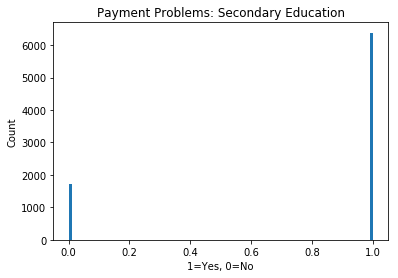

In [442]:
hist_maker(100, success1['NAME_EDUCATION_TYPE_Secondary / secondary special'], '1=Yes, 0=No', 'Payment Problems: Secondary Education')

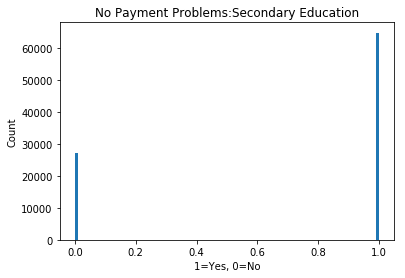

In [443]:
hist_maker(100, success0['NAME_EDUCATION_TYPE_Secondary / secondary special'], '1=Yes, 0=No', 'No Payment Problems:Secondary Education')

In [444]:
#It looks like there are more payment problems with secondary education than people without it
dfex3 = df_train[['TARGET', 'NAME_EDUCATION_TYPE_Secondary / secondary special']]
dfex3.corr()
#It looks like there is a slight positive correlation between secondary education and payment problems

,TARGET,NAME_EDUCATION_TYPE_Secondary / secondary special
TARGET,1.000000,0.051141
NAME_EDUCATION_TYPE_Secondary / secondary special,0.051141,1.000000


In [445]:
#The next column we will look at is LIVINGAREA_MEDI
#This column indicates the median living area
df_train['LIVINGAREA_MEDI'].isnull().sum()

50151

In [446]:
df_train['LIVINGAREA_MEDI'] = df_train['LIVINGAREA_MEDI'].fillna(0)
success1['LIVINGAREA_MEDI'] = success1['LIVINGAREA_MEDI'].fillna(0)
success0['LIVINGAREA_MEDI'] = success0['LIVINGAREA_MEDI'].fillna(0)
#We will assume that the missing values are due to the loans being unrelated to property so we will fill them with 0

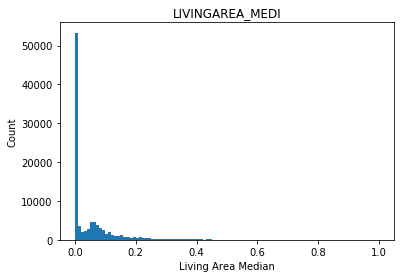

In [447]:
hist_maker(100, df_train['LIVINGAREA_MEDI'], 'Living Area Median', 'LIVINGAREA_MEDI')

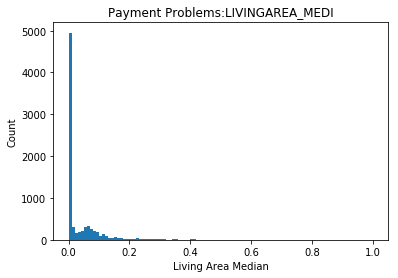

In [448]:
hist_maker(100, success1['LIVINGAREA_MEDI'], 'Living Area Median', 'Payment Problems:LIVINGAREA_MEDI')

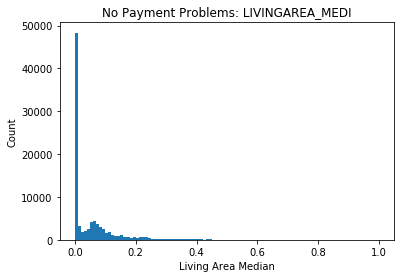

In [449]:
hist_maker(100, success0['LIVINGAREA_MEDI'], 'Living Area Median', 'No Payment Problems: LIVINGAREA_MEDI')

In [450]:
#All 3 charts look pretty similar
dfex3 = df_train[['TARGET', 'LIVINGAREA_MEDI']]
dfex3.corr()
#There is a slightly negative correlation between median living area and payment problems

,TARGET,LIVINGAREA_MEDI
TARGET,1.000000,-0.041295
LIVINGAREA_MEDI,-0.041295,1.000000


In [451]:
#The next column we will look at is LIVINGAREA_AVG
#This column indicates the average living area
df_train['LIVINGAREA_MEDI'].isnull().sum()

0

In [452]:
df_train['LIVINGAREA_AVG'] = df_train['LIVINGAREA_AVG'].fillna(0)
success1['LIVINGAREA_AVG'] = success1['LIVINGAREA_AVG'].fillna(0)
success0['LIVINGAREA_AVG'] = success0['LIVINGAREA_AVG'].fillna(0)
#We will assume the missing values are due to these loans being unrelated to property so we will fill them with 0

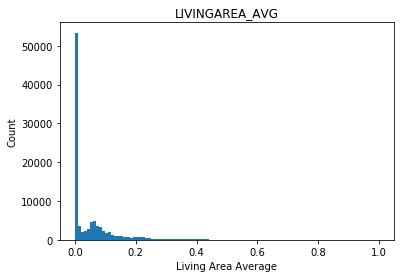

In [453]:
hist_maker(100, df_train['LIVINGAREA_AVG'], 'Living Area Average', 'LIVINGAREA_AVG')

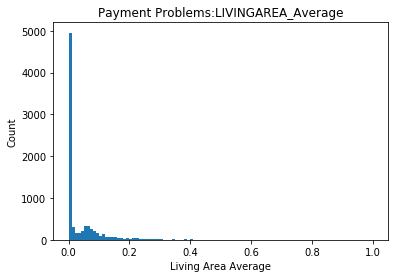

In [454]:
hist_maker(100, success1['LIVINGAREA_AVG'], 'Living Area Average', 'Payment Problems:LIVINGAREA_Average')

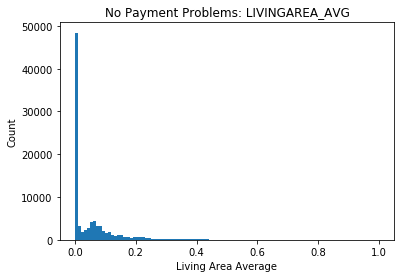

In [455]:
hist_maker(100, success0['LIVINGAREA_AVG'], 'Living Area Average', 'No Payment Problems: LIVINGAREA_AVG')

In [456]:
#All 3 charts look pretty similar
dfex3 = df_train[['TARGET', 'LIVINGAREA_AVG']]
dfex3.corr()
#It looks like there is a slightly negative correlation between average living area and payment problems

,TARGET,LIVINGAREA_AVG
TARGET,1.000000,-0.041507
LIVINGAREA_AVG,-0.041507,1.000000


In [457]:
#The next column we will look at is DAYS_INSTALMENT
#This column indicates when the installment was actually paid relative to when it was supposed to be paid
#This is from the installments payments sections
df_train['DAYS_INSTALMENT'].isnull().sum()

5145

In [458]:
df_train['DAYS_INSTALMENT'] = df_train['DAYS_INSTALMENT'].fillna(0)
success1['DAYS_INSTALMENT'] = success1['DAYS_INSTALMENT'].fillna(0)
success0['DAYS_INSTALMENT'] = success0['DAYS_INSTALMENT'].fillna(0)
#We will assume that the missing data is because they did not pay so we will fill it in with a 0

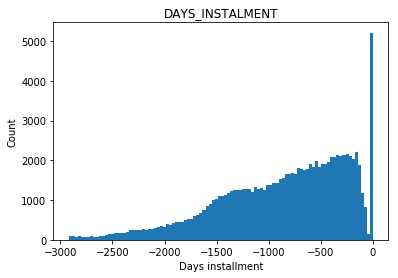

In [459]:
hist_maker(100, df_train['DAYS_INSTALMENT'], 'Days installment', 'DAYS_INSTALMENT')

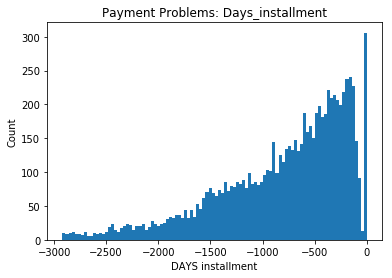

In [460]:
hist_maker(100, success1['DAYS_INSTALMENT'], 'DAYS installment', 'Payment Problems: Days_installment')

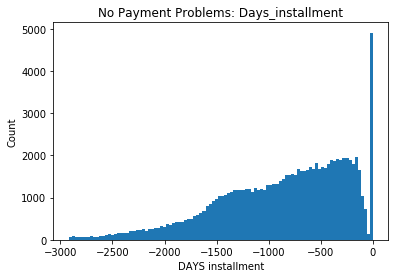

In [461]:
hist_maker(100, success0['DAYS_INSTALMENT'], 'DAYS installment', 'No Payment Problems: Days_installment')

In [462]:
dfex3 = df_train[['TARGET', 'DAYS_INSTALMENT']]
dfex3.corr()
#It looks like there is a slight positive correlation between days installment and payment problems.
#in the charts, it looks like there are more payment problems between days 250 and 500

,TARGET,DAYS_INSTALMENT
TARGET,1.000000,0.031325
DAYS_INSTALMENT,0.031325,1.000000


In [463]:
#The next column we will look at is AMT_DRAWINGS_ATM_CURRENT
#This column indicates the amount of drawings from ATM
df_train['AMT_DRAWINGS_ATM_CURRENT'].isnull().sum()

80334

In [464]:
df_train['AMT_DRAWINGS_ATM_CURRENT'] = df_train['AMT_DRAWINGS_ATM_CURRENT'].fillna(0)
success1['AMT_DRAWINGS_ATM_CURRENT'] = success1['AMT_DRAWINGS_ATM_CURRENT'].fillna(0)
success0['AMT_DRAWINGS_ATM_CURRENT'] = success0['AMT_DRAWINGS_ATM_CURRENT'].fillna(0)
#We will assume that the missing values are due to there not being any atm drawings so we will fill in 0

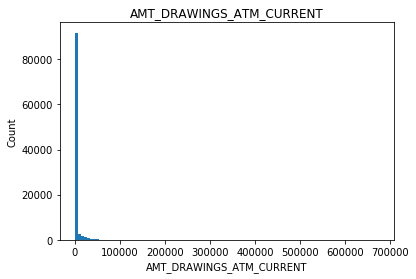

In [465]:
hist_maker(100, df_train['AMT_DRAWINGS_ATM_CURRENT'], 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_ATM_CURRENT')

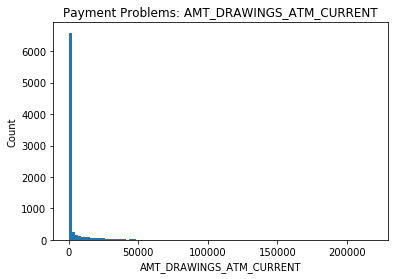

In [466]:
hist_maker(100, success1['AMT_DRAWINGS_ATM_CURRENT'], 'AMT_DRAWINGS_ATM_CURRENT', 'Payment Problems: AMT_DRAWINGS_ATM_CURRENT')

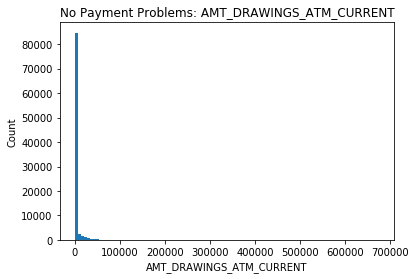

In [467]:
hist_maker(100, success0['AMT_DRAWINGS_ATM_CURRENT'], 'AMT_DRAWINGS_ATM_CURRENT', 'No Payment Problems: AMT_DRAWINGS_ATM_CURRENT')

In [468]:
#All 3 charts look pretty similar
dfex3 = df_train[['TARGET', 'AMT_DRAWINGS_ATM_CURRENT']]
dfex3.corr()
#It looks like there is a slighly positive relationship between current atm drawings and payment problems

,TARGET,AMT_DRAWINGS_ATM_CURRENT
TARGET,1.000000,0.043464
AMT_DRAWINGS_ATM_CURRENT,0.043464,1.000000


In [469]:
#The next column we will look at is LIVINGAREA_MODE
#This column indicates the mode of living areas
df_train['LIVINGAREA_MODE'].isnull().sum()

50151

In [470]:
df_train['LIVINGAREA_MODE'] = df_train['LIVINGAREA_MODE'].fillna(0)
success1['LIVINGAREA_MODE'] = success1['LIVINGAREA_MODE'].fillna(0)
success0['LIVINGAREA_MODE'] = success0['LIVINGAREA_MODE'].fillna(0)
#We will assume the missing values are due to the loans being unrelated to property and fill them in with 0

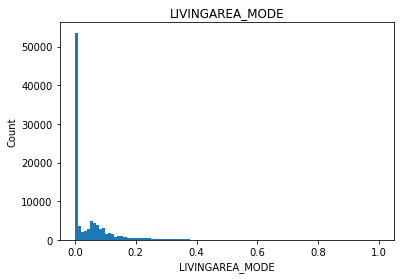

In [471]:
hist_maker(100, df_train['LIVINGAREA_MODE'], 'LIVINGAREA_MODE', 'LIVINGAREA_MODE')

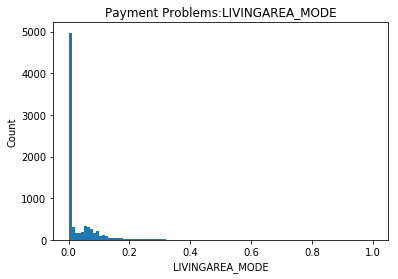

In [472]:
hist_maker(100, success1['LIVINGAREA_MODE'], 'LIVINGAREA_MODE', 'Payment Problems:LIVINGAREA_MODE')

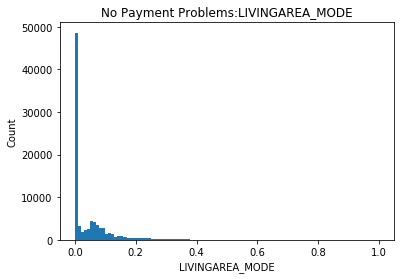

In [473]:
hist_maker(100, success0['LIVINGAREA_MODE'], 'LIVINGAREA_MODE', 'No Payment Problems:LIVINGAREA_MODE')

In [474]:
dfex3 = df_train[['TARGET', 'LIVINGAREA_MODE']]
dfex3.corr()
#It looks like there is a slightly negative relationship between living area mode and payment problems

,TARGET,LIVINGAREA_MODE
TARGET,1.000000,-0.039692
LIVINGAREA_MODE,-0.039692,1.000000


In [475]:
#The next column we will look at is DAYS_ID_PUBLISH
#This column indicates how many days before the application the client changed the identity document
df_train['DAYS_ID_PUBLISH'].isnull().sum()

0

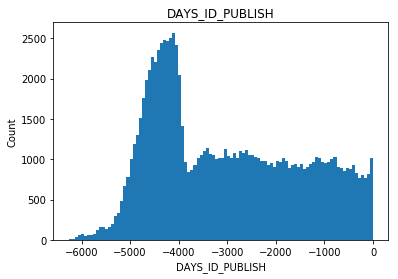

In [476]:
hist_maker(100, df_train['DAYS_ID_PUBLISH'], 'DAYS_ID_PUBLISH', 'DAYS_ID_PUBLISH')

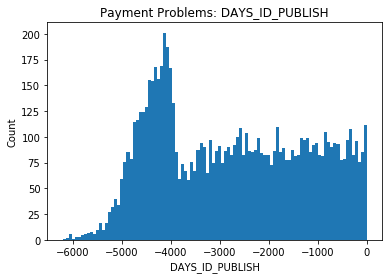

In [477]:
hist_maker(100, success1['DAYS_ID_PUBLISH'], 'DAYS_ID_PUBLISH', 'Payment Problems: DAYS_ID_PUBLISH')

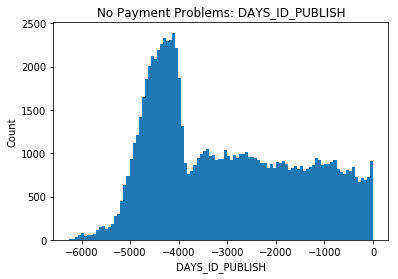

In [478]:
hist_maker(100, success0['DAYS_ID_PUBLISH'], 'DAYS_ID_PUBLISH', 'No Payment Problems: DAYS_ID_PUBLISH')

In [479]:
#All 3 charts look pretty similar
dfex3 = df_train[['TARGET', 'DAYS_ID_PUBLISH']]
dfex3.corr()
#It looks like there is a slightly positive relationship between days id publish and payment problems

,TARGET,DAYS_ID_PUBLISH
TARGET,1.000000,0.051796
DAYS_ID_PUBLISH,0.051796,1.000000


In [480]:
#The next column we will look at is YEARS_BEGINEXPLUATATION_MEDI
df_train['YEARS_BEGINEXPLUATATION_MEDI'].isnull().sum()

48701

In [481]:
df_train['YEARS_BEGINEXPLUATATION_MEDI'] = df_train['YEARS_BEGINEXPLUATATION_MEDI'].fillna(0)
success1['YEARS_BEGINEXPLUATATION_MEDI'] = success1['YEARS_BEGINEXPLUATATION_MEDI'].fillna(0)
success0['YEARS_BEGINEXPLUATATION_MEDI'] = success0['YEARS_BEGINEXPLUATATION_MEDI'].fillna(0)
#We will assume that the missing values are due to being unrelated to property so we will fill them with 0

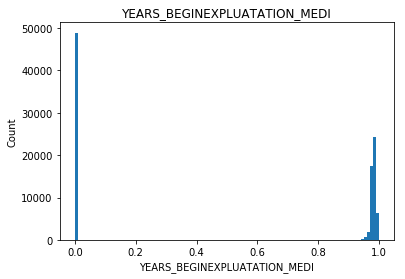

In [482]:
hist_maker(100, df_train['YEARS_BEGINEXPLUATATION_MEDI'], 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI')

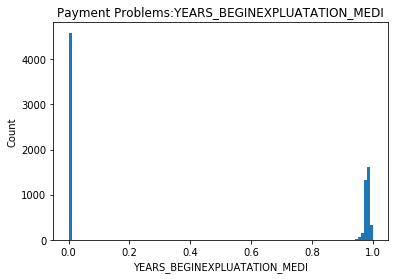

In [483]:
hist_maker(100, success1['YEARS_BEGINEXPLUATATION_MEDI'], 'YEARS_BEGINEXPLUATATION_MEDI', 'Payment Problems:YEARS_BEGINEXPLUATATION_MEDI')

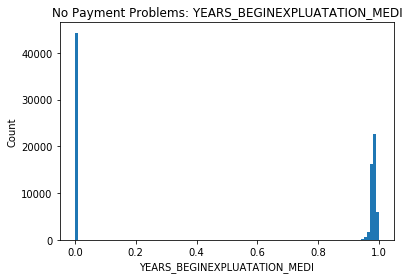

In [484]:
hist_maker(100, success0['YEARS_BEGINEXPLUATATION_MEDI'], 'YEARS_BEGINEXPLUATATION_MEDI', 'No Payment Problems: YEARS_BEGINEXPLUATATION_MEDI')

In [485]:
#All 3 charts look pretty similar
dfex3 = df_train[['TARGET', 'YEARS_BEGINEXPLUATATION_MEDI']]
dfex3.corr()
#Slight negative relationship between this variable and payment problems

,TARGET,YEARS_BEGINEXPLUATATION_MEDI
TARGET,1.000000,-0.046197
YEARS_BEGINEXPLUATATION_MEDI,-0.046197,1.000000


In [486]:
#The next column we will look at is YEARS_BEGINEXPLUATATION_AVG
df_train['YEARS_BEGINEXPLUATATION_AVG'].isnull().sum()

48701

In [487]:
df_train['YEARS_BEGINEXPLUATATION_AVG'] = df_train['YEARS_BEGINEXPLUATATION_AVG'].fillna(0)
success1['YEARS_BEGINEXPLUATATION_AVG'] = success1['YEARS_BEGINEXPLUATATION_AVG'].fillna(0)
success0['YEARS_BEGINEXPLUATATION_AVG'] = success0['YEARS_BEGINEXPLUATATION_AVG'].fillna(0)

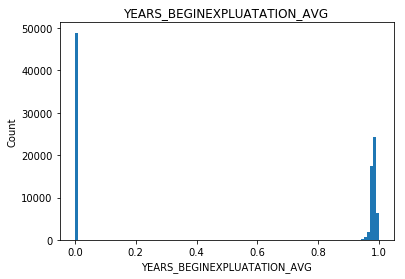

In [488]:
hist_maker(100, df_train['YEARS_BEGINEXPLUATATION_AVG'], 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_AVG')

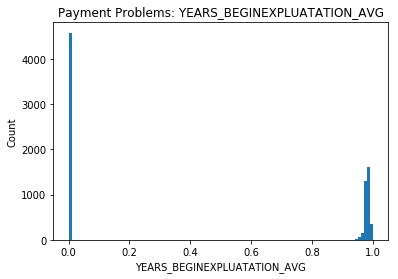

In [489]:
hist_maker(100, success1['YEARS_BEGINEXPLUATATION_AVG'], 'YEARS_BEGINEXPLUATATION_AVG', 'Payment Problems: YEARS_BEGINEXPLUATATION_AVG')

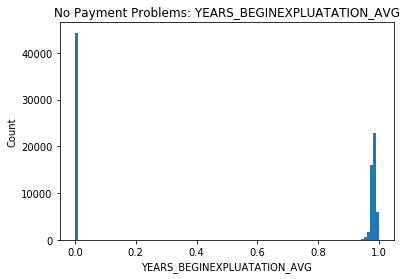

In [490]:
hist_maker(100, success0['YEARS_BEGINEXPLUATATION_AVG'], 'YEARS_BEGINEXPLUATATION_AVG', 'No Payment Problems: YEARS_BEGINEXPLUATATION_AVG')

In [491]:
#All 3 charts look pretty similar
dfex3 = df_train[['TARGET', 'YEARS_BEGINEXPLUATATION_AVG']]
dfex3.corr()
#It looks like there is a slightly negative relationship between these two variables

,TARGET,YEARS_BEGINEXPLUATATION_AVG
TARGET,1.000000,-0.046171
YEARS_BEGINEXPLUATATION_AVG,-0.046171,1.000000


In [492]:
#The next column we will look at is YEARS_BEGINEXPLUATATION_MODE
df_train['YEARS_BEGINEXPLUATATION_MODE'].isnull().sum()

48701

In [493]:
df_train['YEARS_BEGINEXPLUATATION_MODE'] = df_train['YEARS_BEGINEXPLUATATION_MODE'].fillna(0)
success1['YEARS_BEGINEXPLUATATION_MODE'] = success1['YEARS_BEGINEXPLUATATION_MODE'].fillna(0)
success0['YEARS_BEGINEXPLUATATION_MODE'] = success0['YEARS_BEGINEXPLUATATION_MODE'].fillna(0)
#We will assume the missing values are due to being loans unrelated to property and fill them with 0

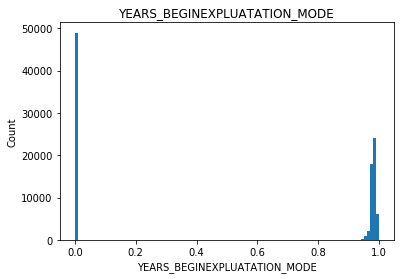

In [494]:
hist_maker(100, df_train['YEARS_BEGINEXPLUATATION_MODE'], 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MODE')

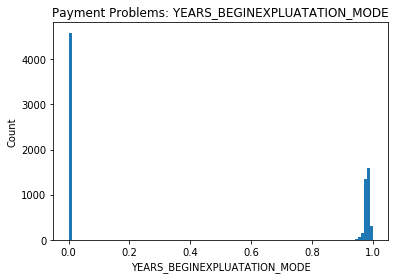

In [495]:
hist_maker(100, success1['YEARS_BEGINEXPLUATATION_MODE'], 'YEARS_BEGINEXPLUATATION_MODE', 'Payment Problems: YEARS_BEGINEXPLUATATION_MODE')

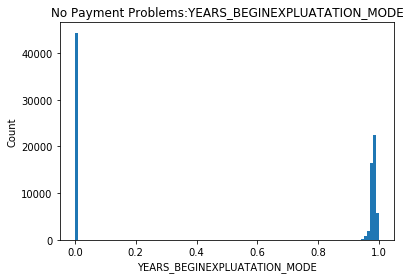

In [496]:
hist_maker(100, success0['YEARS_BEGINEXPLUATATION_MODE'], 'YEARS_BEGINEXPLUATATION_MODE', 'No Payment Problems:YEARS_BEGINEXPLUATATION_MODE')

In [497]:
#All 3 charts  look pretty similar
dfex3 = df_train[['TARGET', 'YEARS_BEGINEXPLUATATION_MODE']]
dfex3.corr()
#There is a slightly negative relationship between this data andpayment problems

,TARGET,YEARS_BEGINEXPLUATATION_MODE
TARGET,1.000000,-0.046198
YEARS_BEGINEXPLUATATION_MODE,-0.046198,1.000000


In [498]:
#The next column we will look at is Apartments Average
#This column indicates inofmration about how many apartments are in the area
df_train['APARTMENTS_AVG'].isnull().sum()

50682

In [499]:
df_train['APARTMENTS_AVG'] = df_train['APARTMENTS_AVG'].fillna(0)
success1['APARTMENTS_AVG'] = success1['APARTMENTS_AVG'].fillna(0)
success0['APARTMENTS_AVG'] = success0['APARTMENTS_AVG'].fillna(0)
#We will assume the missing values are due to loans being unrelated to property so will fill them in with 0

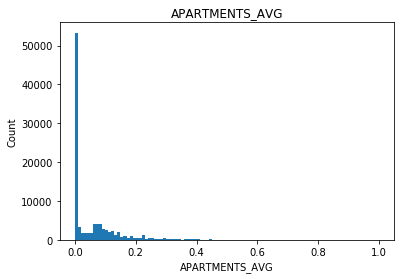

In [500]:
hist_maker(100, df_train['APARTMENTS_AVG'], 'APARTMENTS_AVG', 'APARTMENTS_AVG')

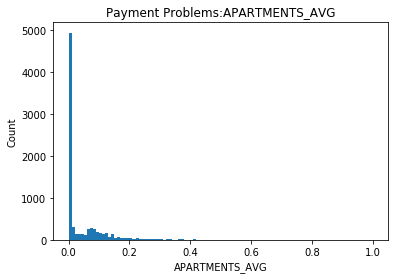

In [501]:
hist_maker(100, success1['APARTMENTS_AVG'], 'APARTMENTS_AVG', 'Payment Problems:APARTMENTS_AVG')

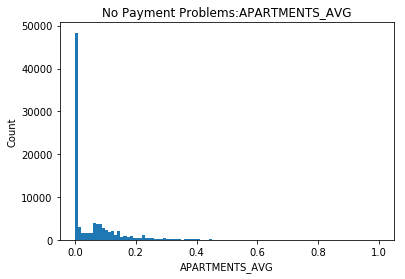

In [502]:
hist_maker(100, success0['APARTMENTS_AVG'], 'APARTMENTS_AVG', 'No Payment Problems:APARTMENTS_AVG')

In [503]:
#All 3 charts look pretty similar
dfex3 = df_train[['TARGET', 'APARTMENTS_AVG']]
dfex3.corr()
#It looks like there is a slightly negative correlation between average apartments and payment problems

,TARGET,APARTMENTS_AVG
TARGET,1.000000,-0.041922
APARTMENTS_AVG,-0.041922,1.000000


In [504]:
#The next column we will look at is AMT_INST_MIN_REGULARITY
df_train['AMT_INST_MIN_REGULARITY'].isnull().sum()

71781

In [505]:
df_train['AMT_INST_MIN_REGULARITY'] = df_train['AMT_INST_MIN_REGULARITY'].fillna(0)
success1['AMT_INST_MIN_REGULARITY'] = success1['AMT_INST_MIN_REGULARITY'].fillna(0)
success0['AMT_INST_MIN_REGULARITY'] = success0['AMT_INST_MIN_REGULARITY'].fillna(0)
#We will assume that missing values are due to being 0 so we will fill in 0

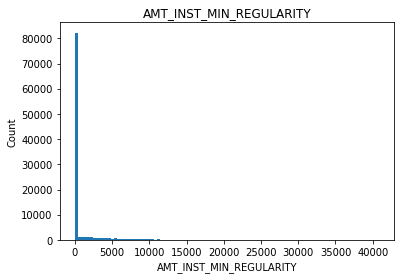

In [506]:
hist_maker(100, df_train['AMT_INST_MIN_REGULARITY'], 'AMT_INST_MIN_REGULARITY', 'AMT_INST_MIN_REGULARITY')

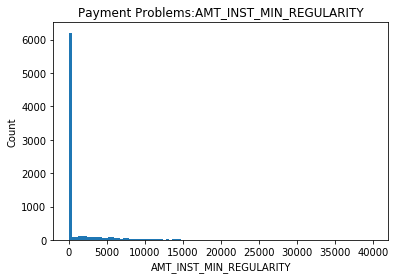

In [507]:
hist_maker(100, success1['AMT_INST_MIN_REGULARITY'], 'AMT_INST_MIN_REGULARITY', 'Payment Problems:AMT_INST_MIN_REGULARITY')

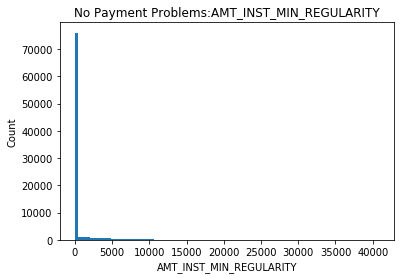

In [508]:
hist_maker(100, success0['AMT_INST_MIN_REGULARITY'], 'AMT_INST_MIN_REGULARITY', 'No Payment Problems:AMT_INST_MIN_REGULARITY')

In [509]:
#All 3 charts look pretty similar
dfex3 = df_train[['TARGET', 'AMT_INST_MIN_REGULARITY']]
dfex3.corr()
#It looks like there is a slightly positive correlation between this variable and payment problems

,TARGET,AMT_INST_MIN_REGULARITY
TARGET,1.000000,0.043493
AMT_INST_MIN_REGULARITY,0.043493,1.000000


In [510]:
#The next column we will look at is APARTMENTS_MEDI
#This column contains information about the median number of apartments
df_train['APARTMENTS_MEDI'].isnull().sum()

50682

In [511]:
df_train['APARTMENTS_MEDI'] = df_train['APARTMENTS_MEDI'].fillna(0)
success1['APARTMENTS_MEDI'] = success1['APARTMENTS_MEDI'].fillna(0)
success0['APARTMENTS_MEDI'] = success0['APARTMENTS_MEDI'].fillna(0)
#We will assume that the missing values are due to the loans being unrelated to property so we will fill in 0

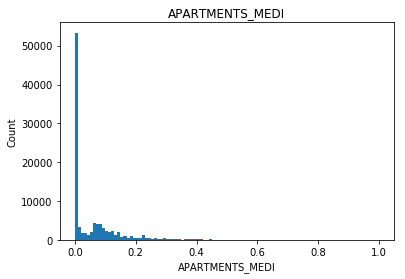

In [512]:
hist_maker(100, df_train['APARTMENTS_MEDI'], 'APARTMENTS_MEDI', 'APARTMENTS_MEDI')

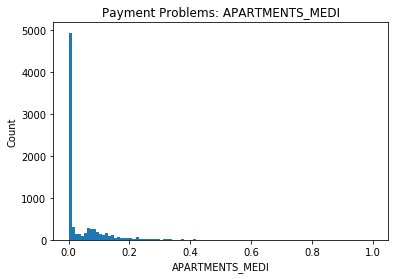

In [513]:
hist_maker(100, success1['APARTMENTS_MEDI'], 'APARTMENTS_MEDI', 'Payment Problems: APARTMENTS_MEDI')

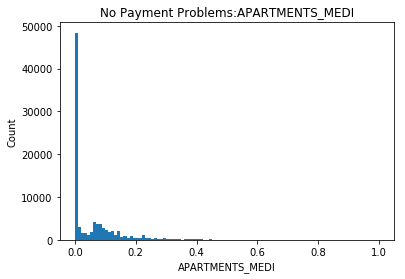

In [514]:
hist_maker(100, success0['APARTMENTS_MEDI'], 'APARTMENTS_MEDI', 'No Payment Problems:APARTMENTS_MEDI')

In [515]:
#All 3 charts look pretty similar
dfex3 = df_train[['TARGET', 'APARTMENTS_MEDI']]
dfex3.corr()
#It looks like there is a slightly negative relationship between meidan apartments and payment problems

,TARGET,APARTMENTS_MEDI
TARGET,1.000000,-0.041976
APARTMENTS_MEDI,-0.041976,1.000000


In [516]:
#The next column we will look at is AMT_DOWN_PAYMENT
#This column indicates the amount of down payment made by the applicant
df_train['AMT_DOWN_PAYMENT'].isnull().sum()

11079

In [517]:
df_train['AMT_DOWN_PAYMENT'] = df_train['AMT_DOWN_PAYMENT'].fillna(0)
success1['AMT_DOWN_PAYMENT'] = success1['AMT_DOWN_PAYMENT'].fillna(0)
success0['AMT_DOWN_PAYMENT'] = success0['AMT_DOWN_PAYMENT'].fillna(0)
#We will assume that the missing down payment values are due to there not being a downpayment so we will fill in 0

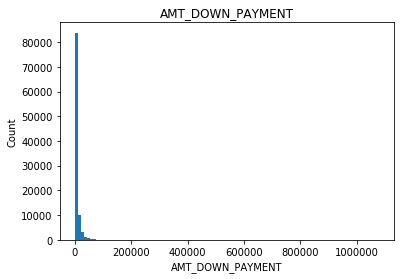

In [518]:
hist_maker(100, df_train['AMT_DOWN_PAYMENT'], 'AMT_DOWN_PAYMENT', 'AMT_DOWN_PAYMENT')

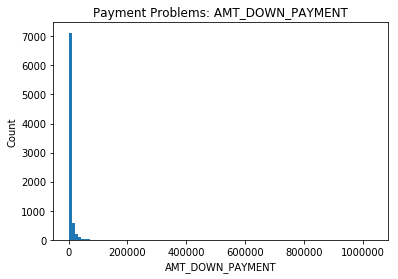

In [519]:
hist_maker(100, success1['AMT_DOWN_PAYMENT'], 'AMT_DOWN_PAYMENT', 'Payment Problems: AMT_DOWN_PAYMENT')

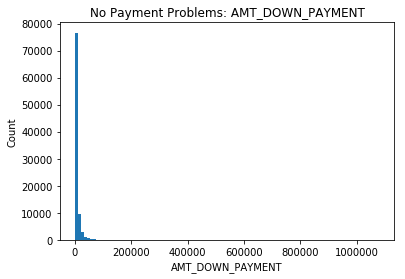

In [520]:
hist_maker(100, success0['AMT_DOWN_PAYMENT'], 'AMT_DOWN_PAYMENT', 'No Payment Problems: AMT_DOWN_PAYMENT')

In [521]:
#All 3 charts look similar
dfex3 = df_train[['TARGET', 'AMT_DOWN_PAYMENT']]
dfex3.corr()
#it looks like there is a slight negative correlation

,TARGET,AMT_DOWN_PAYMENT
TARGET,1.000000,-0.024179
AMT_DOWN_PAYMENT,-0.024179,1.000000


In [522]:
#The next column we will look at is APARTMENTS_MODE
#This column indicates the mode values of apartments
df_train['APARTMENTS_MODE'].isnull().sum()

50682

In [523]:
df_train['APARTMENTS_MODE'] = df_train['APARTMENTS_MODE'].fillna(0)
success1['APARTMENTS_MODE'] = success1['APARTMENTS_MODE'].fillna(0)
success0['APARTMENTS_MODE'] = success0['APARTMENTS_MODE'].fillna(0)
#We will assume that the missing values are due to  loans being unrelated to property so we will fill in 0

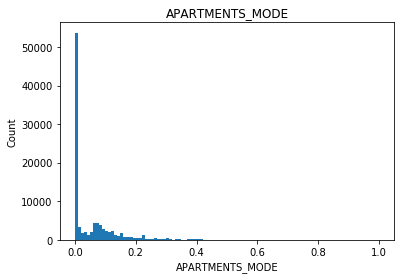

In [524]:
hist_maker(100, df_train['APARTMENTS_MODE'], 'APARTMENTS_MODE', 'APARTMENTS_MODE')

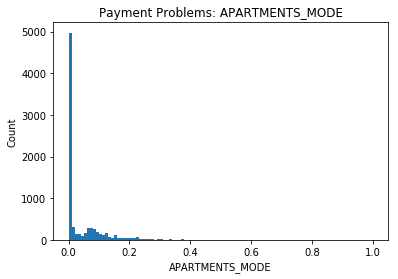

In [525]:
hist_maker(100, success1['APARTMENTS_MODE'], 'APARTMENTS_MODE', 'Payment Problems: APARTMENTS_MODE')

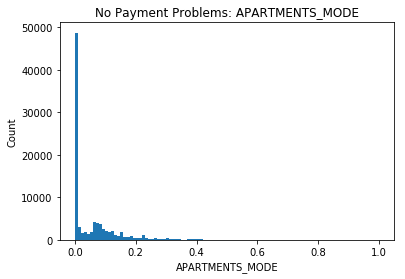

In [526]:
hist_maker(100, success0['APARTMENTS_MODE'], 'APARTMENTS_MODE', 'No Payment Problems: APARTMENTS_MODE')

In [527]:
#All 3 charts look similar
dfex3 = df_train[['TARGET', 'APARTMENTS_MODE']]
dfex3.corr()
#it looks like there is a slight negative correlation

,TARGET,APARTMENTS_MODE
TARGET,1.000000,-0.040786
APARTMENTS_MODE,-0.040786,1.000000


In [528]:
#The next column we will look at is AMT_GOODS_PRICE_x
#This column indicates the value of goods
df_train['AMT_GOODS_PRICE_x'].isnull().sum()

81

In [529]:
df_train['AMT_GOODS_PRICE_x'] = df_train['AMT_GOODS_PRICE_x'].fillna(0)
success1['AMT_GOODS_PRICE_x'] = success1['AMT_GOODS_PRICE_x'].fillna(0)
success0['AMT_GOODS_PRICE_x'] = success0['AMT_GOODS_PRICE_x'].fillna(0)
#We will assume that the missing values are due to there not being any goods so we will fill in 0

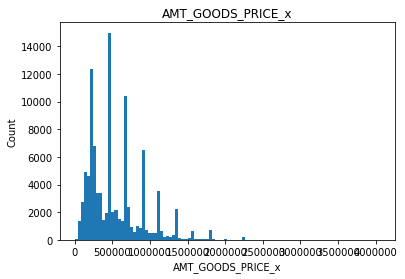

In [530]:
hist_maker(100, df_train['AMT_GOODS_PRICE_x'], 'AMT_GOODS_PRICE_x', 'AMT_GOODS_PRICE_x')

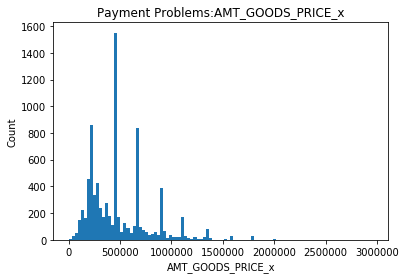

In [531]:
hist_maker(100, success1['AMT_GOODS_PRICE_x'], 'AMT_GOODS_PRICE_x', 'Payment Problems:AMT_GOODS_PRICE_x')

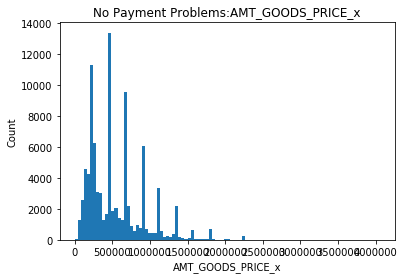

In [532]:
hist_maker(100, success0['AMT_GOODS_PRICE_x'], 'AMT_GOODS_PRICE_x', 'No Payment Problems:AMT_GOODS_PRICE_x')

In [533]:
dfex3 = df_train[['TARGET', 'AMT_GOODS_PRICE_x']]
dfex3.corr()
#It looks like there is a slightly negative correlation between the price of the goods and payment problems
#More expensive goodshave fewer payment problems more than chaper goods but not by much

,TARGET,AMT_GOODS_PRICE_x
TARGET,1.000000,-0.040337
AMT_GOODS_PRICE_x,-0.040337,1.000000


In [534]:
#The next column we will look at is AMT_PAYMENT
#This column indicates the payment amount
df_train['AMT_PAYMENT'].isnull().sum()

5146

In [535]:
df_train['AMT_PAYMENT'] = df_train['AMT_PAYMENT'].fillna(0)
success1['AMT_PAYMENT'] = success1['AMT_PAYMENT'].fillna(0)
success0['AMT_PAYMENT'] = success0['AMT_PAYMENT'].fillna(0)
#We will assume the missing values are due to there not being a payment made

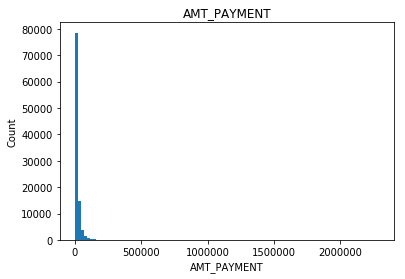

In [536]:
hist_maker(100, df_train['AMT_PAYMENT'], 'AMT_PAYMENT', 'AMT_PAYMENT')

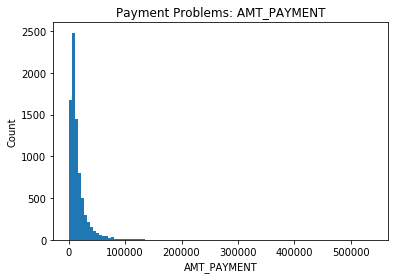

In [537]:
hist_maker(100, success1['AMT_PAYMENT'], 'AMT_PAYMENT', 'Payment Problems: AMT_PAYMENT')

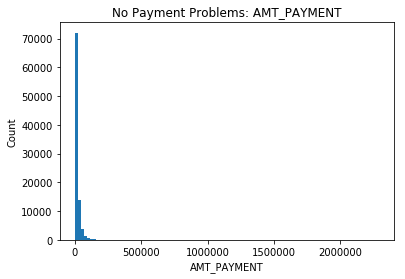

In [538]:
hist_maker(100, success0['AMT_PAYMENT'], 'AMT_PAYMENT', 'No Payment Problems: AMT_PAYMENT')

In [539]:
#It looks like there are more payment problems with people who make smaller payments
#This could be caused by people making a partial payment which would still trigger as an account with payment problems.
dfex3 = df_train[['TARGET', 'AMT_PAYMENT']]
dfex3.corr()
#It looks like there is a small negative correlation between the payment amount and payment problems

,TARGET,AMT_PAYMENT
TARGET,1.000000,-0.017277
AMT_PAYMENT,-0.017277,1.000000


In [540]:
#The next column we will look at is ENTRANCES_AVG
#This column indicates the averagera number of entrances
df_train['ENTRANCES_AVG'].isnull().sum()

50281

In [541]:
df_train['ENTRANCES_AVG'] = df_train['ENTRANCES_AVG'].fillna(0)
success1['ENTRANCES_AVG'] = success1['ENTRANCES_AVG'].fillna(0)
success0['ENTRANCES_AVG'] = success0['ENTRANCES_AVG'].fillna(0)
#We will assume that the missing values are due to the loans being unrelated to property so we will fill in 0

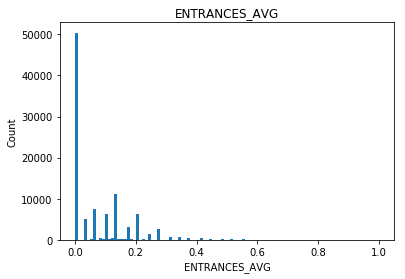

In [542]:
hist_maker(100, df_train['ENTRANCES_AVG'], 'ENTRANCES_AVG', 'ENTRANCES_AVG')

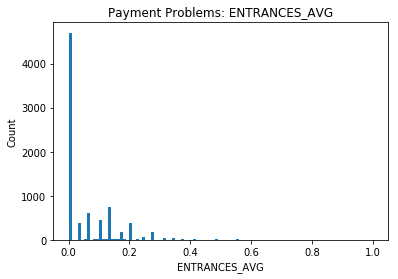

In [543]:
hist_maker(100, success1['ENTRANCES_AVG'], 'ENTRANCES_AVG', 'Payment Problems: ENTRANCES_AVG')

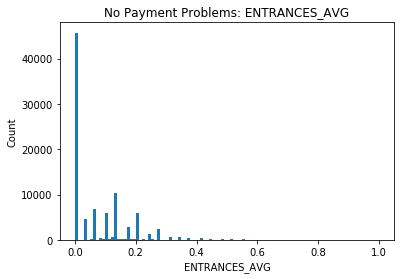

In [544]:
hist_maker(100, success0['ENTRANCES_AVG'], 'ENTRANCES_AVG', 'No Payment Problems: ENTRANCES_AVG')

In [545]:
#All 3 columns look pretty similar
dfex3 = df_train[['TARGET', 'ENTRANCES_AVG']]
dfex3.corr()
#It looks like there is a slight negative correlation between the average number of entrances and payment problems
#So the more entrances there are, the fewer payment problems there are.
#This agrees with the floorsmax data from earlier as well.  It seems there could be lower risk in larger places

,TARGET,ENTRANCES_AVG
TARGET,1.000000,-0.038786
ENTRANCES_AVG,-0.038786,1.000000


In [546]:
#The next column we will look at is ENTRANCES_MEDI
#This column indicates the median number of entrances
df_train['ENTRANCES_MEDI'].isnull().sum()

50281

In [547]:
df_train['ENTRANCES_MEDI'] = df_train['ENTRANCES_MEDI'].fillna(0)
success1['ENTRANCES_MEDI'] = success1['ENTRANCES_MEDI'].fillna(0)
success0['ENTRANCES_MEDI'] = success0['ENTRANCES_MEDI'].fillna(0)
#We will assume that the missing values are due to loans being unrelated to property so we will fill in 0

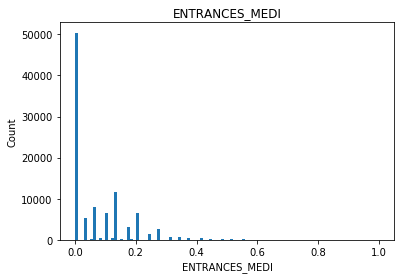

In [548]:
hist_maker(100, df_train['ENTRANCES_MEDI'], 'ENTRANCES_MEDI', 'ENTRANCES_MEDI')

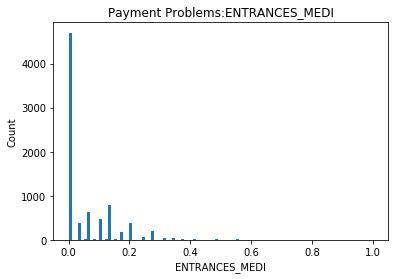

In [549]:
hist_maker(100, success1['ENTRANCES_MEDI'], 'ENTRANCES_MEDI', 'Payment Problems:ENTRANCES_MEDI')

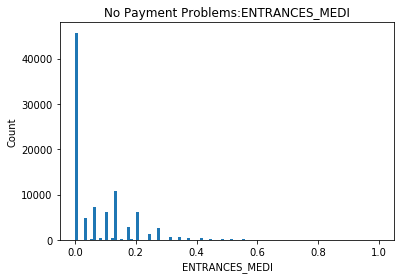

In [550]:
hist_maker(100, success0['ENTRANCES_MEDI'], 'ENTRANCES_MEDI', 'No Payment Problems:ENTRANCES_MEDI')

In [551]:
#All 3 charts look pretty similar
dfex3 = df_train[['TARGET', 'ENTRANCES_MEDI']]
dfex3.corr()
#It looks like there is a slight negative correlation between the median number of entrances and payment problems

,TARGET,ENTRANCES_MEDI
TARGET,1.000000,-0.038576
ENTRANCES_MEDI,-0.038576,1.000000


In [552]:
#The next column we will look at is ENTRANCES_MODE
#This column indicates the median number of entrances
df_train['ENTRANCES_MODE'].isnull().sum()

50281

In [557]:
df_train['ENTRANCES_MODE'] = df_train['ENTRANCES_MODE'].fillna(0)
success1['ENTRANCES_MODE'] = success1['ENTRANCES_MODE'].fillna(0)
success0['ENTRANCES_MODE'] = success0['ENTRANCES_MODE'].fillna(0)
#We will assume that the missing values are due to laons being unrelated to property so we will fill them with 0

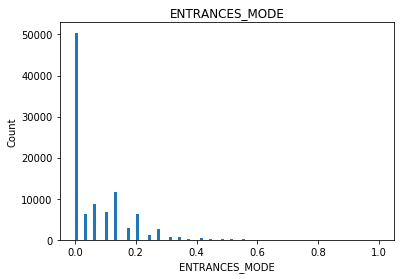

In [558]:
hist_maker(100, df_train['ENTRANCES_MODE'], 'ENTRANCES_MODE', 'ENTRANCES_MODE')

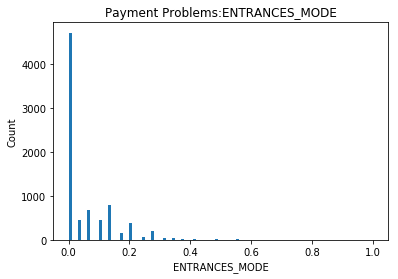

In [559]:
hist_maker(100, success1['ENTRANCES_MODE'], 'ENTRANCES_MODE', 'Payment Problems:ENTRANCES_MODE')

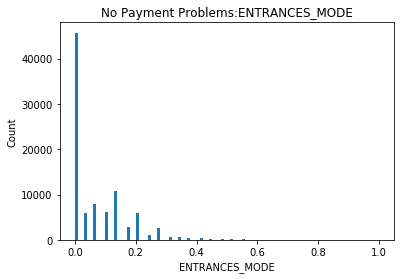

In [560]:
hist_maker(100, success0['ENTRANCES_MODE'], 'ENTRANCES_MODE', 'No Payment Problems:ENTRANCES_MODE')

In [561]:
#All 3 charts look pretty similar
dfex3 = df_train[['TARGET', 'ENTRANCES_MODE']]
dfex3.corr()
#The mode also has a negative correlation

,TARGET,ENTRANCES_MODE
TARGET,1.000000,-0.037236
ENTRANCES_MODE,-0.037236,1.000000


In [562]:
#The next column we will look at is NAME_INCOME_TYPE_Pensioner
#This column indicates if the applicants income comes from a pension
df_train['NAME_INCOME_TYPE_Pensioner'].isnull().sum()

0

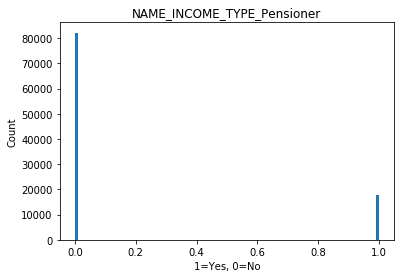

In [563]:
hist_maker(100, df_train['NAME_INCOME_TYPE_Pensioner'], '1=Yes, 0=No', 'NAME_INCOME_TYPE_Pensioner')

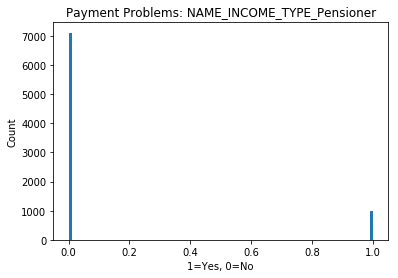

In [564]:
hist_maker(100, success1['NAME_INCOME_TYPE_Pensioner'], '1=Yes, 0=No', 'Payment Problems: NAME_INCOME_TYPE_Pensioner')

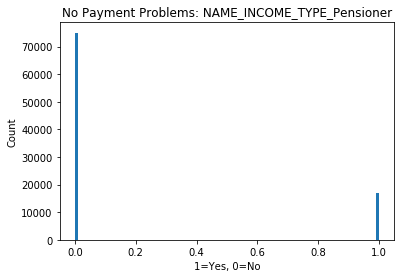

In [565]:
hist_maker(100, success0['NAME_INCOME_TYPE_Pensioner'], '1=Yes, 0=No', 'No Payment Problems: NAME_INCOME_TYPE_Pensioner')

In [566]:
#It looks like people on pensions have fewer payment problems
dfex3 = df_train[['TARGET', 'NAME_INCOME_TYPE_Pensioner']]
dfex3.corr()
#It looks like there is a slight negative correlation between having a pension income and having payment problems

,TARGET,NAME_INCOME_TYPE_Pensioner
TARGET,1.000000,-0.044724
NAME_INCOME_TYPE_Pensioner,-0.044724,1.000000


In [567]:
# The next column we will look at is ORGANIZATION_TYPE_XNA
#This describes if an organization is an unknown type or not
df_train['ORGANIZATION_TYPE_XNA'].isnull().sum()

0

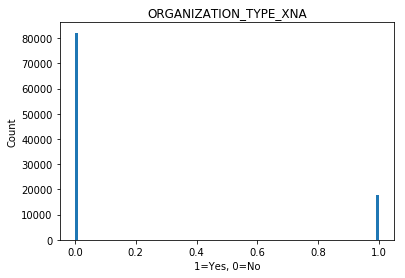

In [568]:
hist_maker(100, df_train['ORGANIZATION_TYPE_XNA'], '1=Yes, 0=No', 'ORGANIZATION_TYPE_XNA')

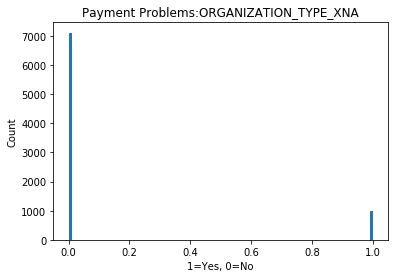

In [569]:
hist_maker(100, success1['ORGANIZATION_TYPE_XNA'], '1=Yes, 0=No', 'Payment Problems:ORGANIZATION_TYPE_XNA')

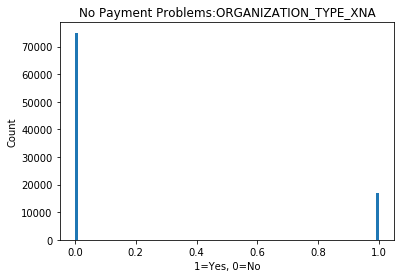

In [570]:
hist_maker(100, success0['ORGANIZATION_TYPE_XNA'], '1=Yes, 0=No', 'No Payment Problems:ORGANIZATION_TYPE_XNA')

In [571]:
#It looks like organizations of this type have fewer problems.
#This could be due to extra thorough vetting of companies in non-typical industries
dfex3 = df_train[['TARGET', 'ORGANIZATION_TYPE_XNA']]
dfex3.corr()
#The correlations support the chart that this type seems to have fewer payment problems

,TARGET,ORGANIZATION_TYPE_XNA
TARGET,1.000000,-0.044395
ORGANIZATION_TYPE_XNA,-0.044395,1.000000


In [572]:
#The next coumn we will look at is CNT_DRAWINGS_POS_CURRENT
#This column indicates the number of drawings for goods during the month of the previous credit
df_train['CNT_DRAWINGS_POS_CURRENT'].isnull().sum()

80334

In [573]:
df_train['CNT_DRAWINGS_POS_CURRENT'] = df_train['CNT_DRAWINGS_POS_CURRENT'].fillna(0)
success1['CNT_DRAWINGS_POS_CURRENT'] = success1['CNT_DRAWINGS_POS_CURRENT'].fillna(0)
success0['CNT_DRAWINGS_POS_CURRENT'] = success0['CNT_DRAWINGS_POS_CURRENT'].fillna(0)
#We will assume that the missing values are due to there not being any drawings so we will fill in 0

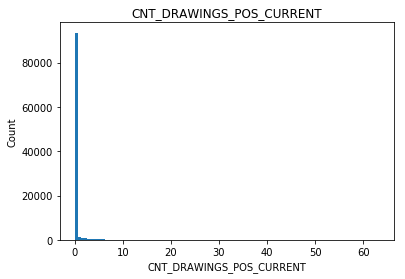

In [574]:
hist_maker(100, df_train['CNT_DRAWINGS_POS_CURRENT'], 'CNT_DRAWINGS_POS_CURRENT', 'CNT_DRAWINGS_POS_CURRENT')

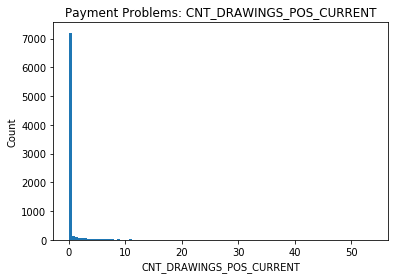

In [575]:
hist_maker(100, success1['CNT_DRAWINGS_POS_CURRENT'], 'CNT_DRAWINGS_POS_CURRENT', 'Payment Problems: CNT_DRAWINGS_POS_CURRENT')

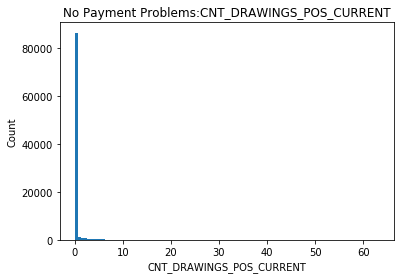

In [576]:
hist_maker(100, success0['CNT_DRAWINGS_POS_CURRENT'], 'CNT_DRAWINGS_POS_CURRENT', 'No Payment Problems:CNT_DRAWINGS_POS_CURRENT')

In [577]:
#All 3 charts look similar
dfex3 = df_train[['TARGET', 'CNT_DRAWINGS_POS_CURRENT']]
dfex3.corr()
#It looks like there is a slight positive correlation between the current count of drawings and payment problems

,TARGET,CNT_DRAWINGS_POS_CURRENT
TARGET,1.000000,0.036807
CNT_DRAWINGS_POS_CURRENT,0.036807,1.000000


In [578]:
#The next column we will look at is FLAG_EMP_PHONE
#This column indicates if the provided a work number
df_train['FLAG_EMP_PHONE'].isnull().sum()

0

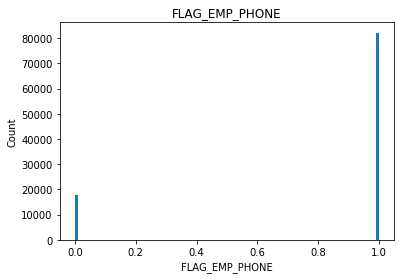

In [579]:
hist_maker(100, df_train['FLAG_EMP_PHONE'], 'FLAG_EMP_PHONE', 'FLAG_EMP_PHONE')

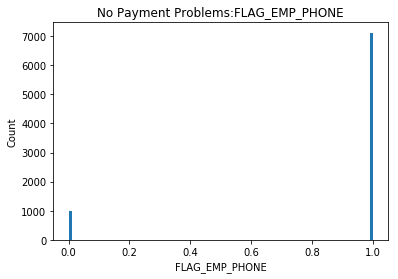

In [580]:
hist_maker(100, success1['FLAG_EMP_PHONE'], 'FLAG_EMP_PHONE', 'No Payment Problems:FLAG_EMP_PHONE')

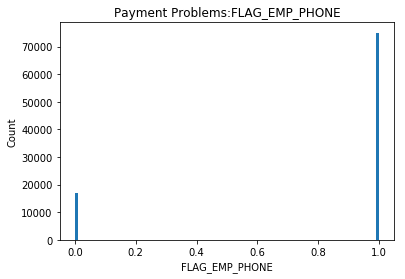

In [581]:
hist_maker(100, success0['FLAG_EMP_PHONE'], 'FLAG_EMP_PHONE', 'Payment Problems:FLAG_EMP_PHONE')

In [582]:
#It looks like there aremore accounts with no payment problems that do not provide an employer phone
dfex3 = df_train[['TARGET', 'FLAG_EMP_PHONE']]
dfex3.corr()
#It looks like there is a slight positive relationship between providing an employer phone and payment problems

,TARGET,FLAG_EMP_PHONE
TARGET,1.000000,0.044347
FLAG_EMP_PHONE,0.044347,1.000000


In [280]:
#The next column we will look at is REGION_RATING_CLIENT_W_CITY
#This column indicates the rating of the region with the city included
df_train['REGION_RATING_CLIENT_W_CITY'].isnull().sum()

0

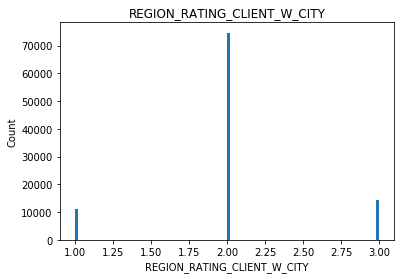

In [281]:
hist_maker(100, df_train['REGION_RATING_CLIENT_W_CITY'], 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT_W_CITY')

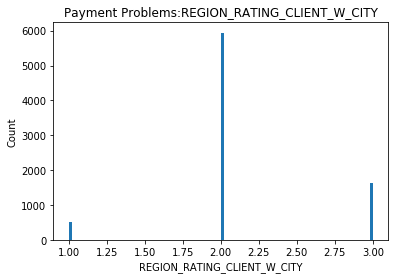

In [282]:
hist_maker(100, success1['REGION_RATING_CLIENT_W_CITY'], 'REGION_RATING_CLIENT_W_CITY', 'Payment Problems:REGION_RATING_CLIENT_W_CITY')

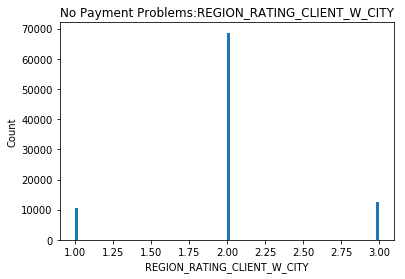

In [283]:
hist_maker(100, success0['REGION_RATING_CLIENT_W_CITY'], 'REGION_RATING_CLIENT_W_CITY', 'No Payment Problems:REGION_RATING_CLIENT_W_CITY')

In [284]:
#It looks like there might be more payment problems in higher rated cities and slighlty fewer in lower rated cities
dfex3 = df_train[['TARGET', 'REGION_RATING_CLIENT_W_CITY']]
dfex3.corr()
#It looks like there is a positive correlation between the region rating and payment problems
#This could indicate overheating of markets in popular locations

,TARGET,REGION_RATING_CLIENT_W_CITY
TARGET,1.000000,0.062816
REGION_RATING_CLIENT_W_CITY,0.062816,1.000000


In [285]:
#The next column we will look at is REG_CITY_NOT_WORK_CITY
#This column indicates if the permanent address and the contact address do not match
df_train['REG_CITY_NOT_WORK_CITY'].isnull().sum()

0

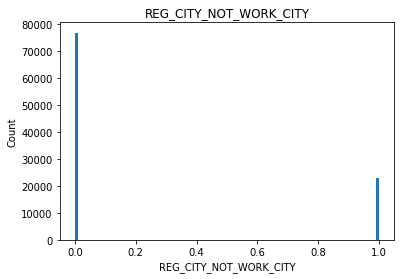

In [286]:
hist_maker(100, df_train['REG_CITY_NOT_WORK_CITY'], 'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY')

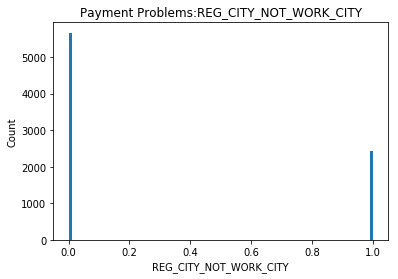

In [287]:
hist_maker(100, success1['REG_CITY_NOT_WORK_CITY'], 'REG_CITY_NOT_WORK_CITY', 'Payment Problems:REG_CITY_NOT_WORK_CITY')

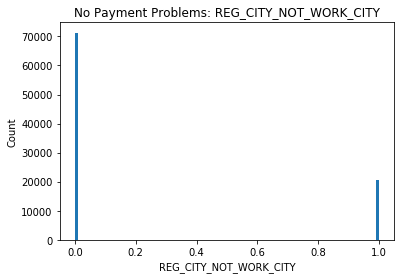

In [288]:
hist_maker(100, success0['REG_CITY_NOT_WORK_CITY'], 'REG_CITY_NOT_WORK_CITY', 'No Payment Problems: REG_CITY_NOT_WORK_CITY')

In [289]:
#It looks like there are more payment problems when the contact and permanent address do not match
dfex3 = df_train[['TARGET', 'REG_CITY_NOT_WORK_CITY']]
dfex3.corr()
#It looks like there is a slightly positive relationship between payment problems and not having matching addresses

,TARGET,REG_CITY_NOT_WORK_CITY
TARGET,1.000000,0.048275
REG_CITY_NOT_WORK_CITY,0.048275,1.000000


In [290]:
#The next column we will look at is REGION_RATING_CLIENT
#This includes the rating of the region
df_train['REGION_RATING_CLIENT'].isnull().sum()

0

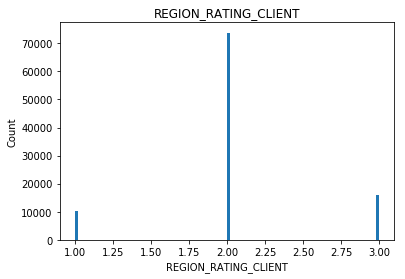

In [291]:
hist_maker(100, df_train['REGION_RATING_CLIENT'], 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT')

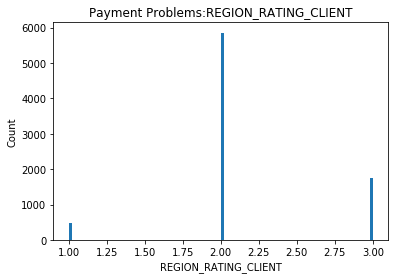

In [292]:
hist_maker(100, success1['REGION_RATING_CLIENT'], 'REGION_RATING_CLIENT', 'Payment Problems:REGION_RATING_CLIENT')

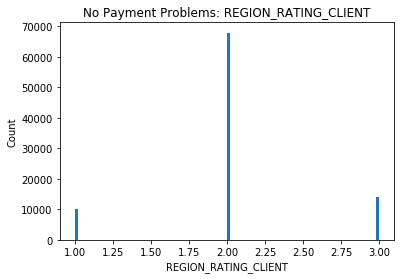

In [293]:
hist_maker(100, success0['REGION_RATING_CLIENT'], 'REGION_RATING_CLIENT', 'No Payment Problems: REGION_RATING_CLIENT')

In [294]:
#It looks like the same results as with region rating
dfex3 = df_train[['TARGET', 'REGION_RATING_CLIENT']]
dfex3.corr()
#There is once a gain a positive relationship between the region rating and payment problems

,TARGET,REGION_RATING_CLIENT
TARGET,1.000000,0.061598
REGION_RATING_CLIENT,0.061598,1.000000


In [295]:
#The next column we will look at is HOUSETYPE_MODE_block of flats
#This column indicates if the house is a blocks of flats
df_train['HOUSETYPE_MODE_block of flats'].isnull().sum()

0

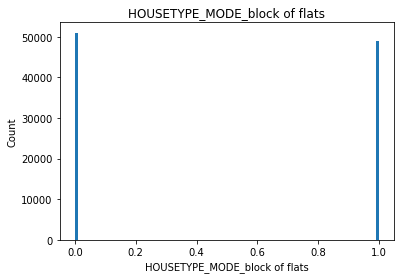

In [296]:
hist_maker(100, df_train['HOUSETYPE_MODE_block of flats'], 'HOUSETYPE_MODE_block of flats', 'HOUSETYPE_MODE_block of flats')

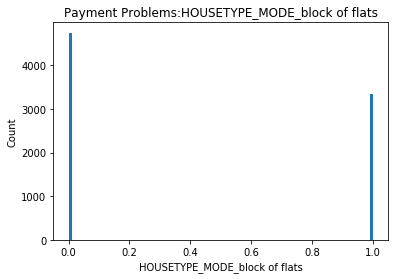

In [297]:
hist_maker(100, success1['HOUSETYPE_MODE_block of flats'], 'HOUSETYPE_MODE_block of flats', 'Payment Problems:HOUSETYPE_MODE_block of flats')

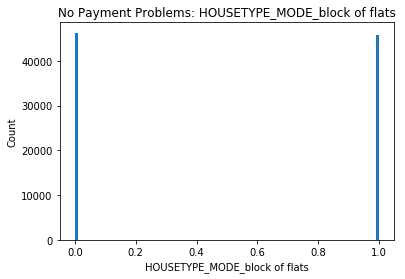

In [298]:
hist_maker(100, success0['HOUSETYPE_MODE_block of flats'], 'HOUSETYPE_MODE_block of flats', 'No Payment Problems: HOUSETYPE_MODE_block of flats')

In [299]:
dfex3 = df_train[['TARGET', 'HOUSETYPE_MODE_block of flats']]
dfex3.corr()
#It looks like there is a slightly negative relationship between this type of house and payment problems

,TARGET,HOUSETYPE_MODE_block of flats
TARGET,1.000000,-0.045641
HOUSETYPE_MODE_block of flats,-0.045641,1.000000


In [300]:
#The next column we are looking at is FLAG_DOCUMENT_3
#This column indicates if they received document 3.
df_train['FLAG_DOCUMENT_3'].isnull().sum()

0

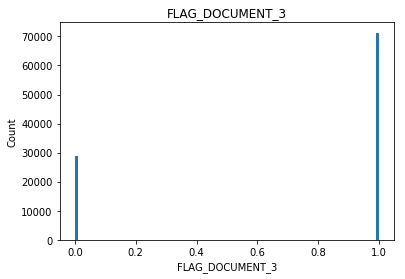

In [301]:
hist_maker(100, df_train['FLAG_DOCUMENT_3'], 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_3')

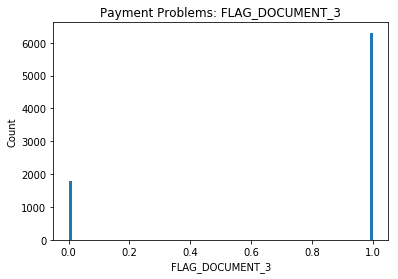

In [302]:
hist_maker(100, success1['FLAG_DOCUMENT_3'], 'FLAG_DOCUMENT_3', 'Payment Problems: FLAG_DOCUMENT_3')

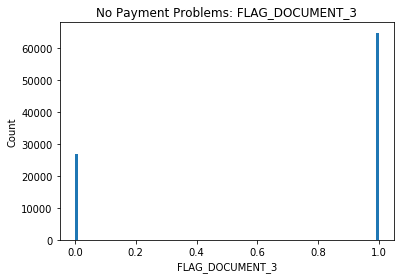

In [303]:
hist_maker(100, success0['FLAG_DOCUMENT_3'], 'FLAG_DOCUMENT_3', 'No Payment Problems: FLAG_DOCUMENT_3')

In [304]:
#It looks like there are fewer payment problems when document 3 is not flagged
dfex3 = df_train[['TARGET', 'FLAG_DOCUMENT_3']]
dfex3.corr()
#It looks like there is a slightly positive correlation between document 3 and payment problems

,TARGET,FLAG_DOCUMENT_3
TARGET,1.000000,0.043776
FLAG_DOCUMENT_3,0.043776,1.000000


In [305]:
#The next column we will look at is SELLERPLACE_AREA
df_train['SELLERPLACE_AREA'].isnull().sum()

5346

In [306]:
df_train['SELLERPLACE_AREA'] = df_train['SELLERPLACE_AREA'].fillna(0)
success1['SELLERPLACE_AREA'] = success1['SELLERPLACE_AREA'].fillna(0)
success0['SELLERPLACE_AREA'] = success0['SELLERPLACE_AREA'].fillna(0)
#We will assume that the missing values are due to loans being unrelated to property so we will fill in 0

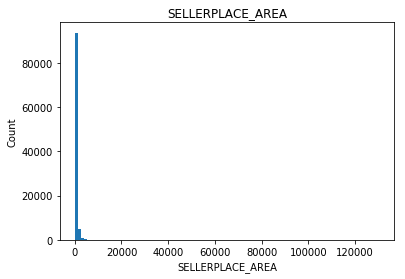

In [307]:
hist_maker(100, df_train['SELLERPLACE_AREA'], 'SELLERPLACE_AREA', 'SELLERPLACE_AREA')

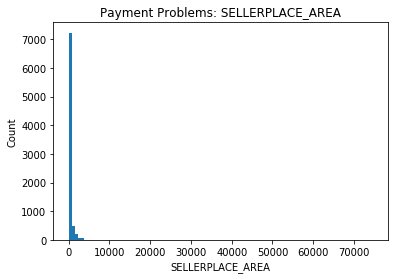

In [308]:
hist_maker(100, success1['SELLERPLACE_AREA'], 'SELLERPLACE_AREA', 'Payment Problems: SELLERPLACE_AREA')

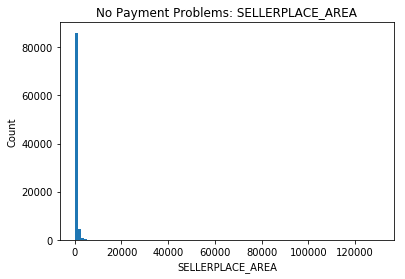

In [309]:
hist_maker(100, success0['SELLERPLACE_AREA'], 'SELLERPLACE_AREA', 'No Payment Problems: SELLERPLACE_AREA')

In [310]:
#All 3 charts look similar
dfex3 = df_train[['TARGET', 'SELLERPLACE_AREA']]
dfex3.corr()
#This value basically rounds down to 0

,TARGET,SELLERPLACE_AREA
TARGET,1.000000,-0.006527
SELLERPLACE_AREA,-0.006527,1.000000


In [311]:
#The next column we will look at is AMT_PAYMENT_TOTAL_CURRENT
#This column indicates the total amout of payment
df_train['AMT_PAYMENT_TOTAL_CURRENT'].isnull().sum()

71781

In [312]:
df_train['AMT_PAYMENT_TOTAL_CURRENT'] = df_train['AMT_PAYMENT_TOTAL_CURRENT'].fillna(0)
success1['AMT_PAYMENT_TOTAL_CURRENT'] = success1['AMT_PAYMENT_TOTAL_CURRENT'].fillna(0)
success0['AMT_PAYMENT_TOTAL_CURRENT'] = success0['AMT_PAYMENT_TOTAL_CURRENT'].fillna(0)

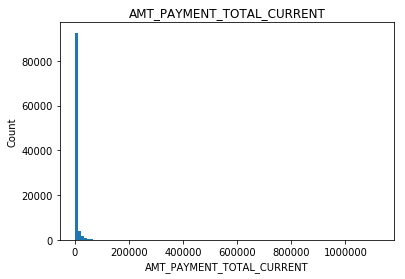

In [313]:
hist_maker(100, df_train['AMT_PAYMENT_TOTAL_CURRENT'], 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT')

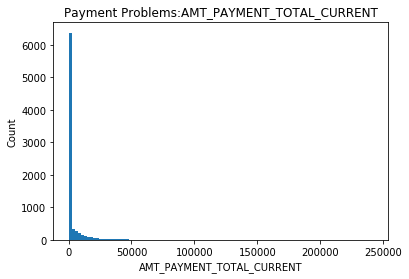

In [314]:
hist_maker(100, success1['AMT_PAYMENT_TOTAL_CURRENT'], 'AMT_PAYMENT_TOTAL_CURRENT', 'Payment Problems:AMT_PAYMENT_TOTAL_CURRENT')

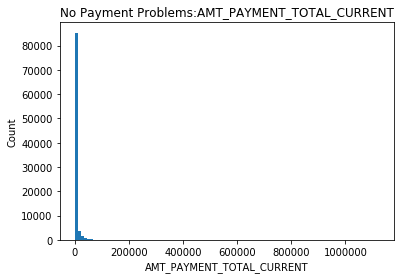

In [315]:
hist_maker(100, success0['AMT_PAYMENT_TOTAL_CURRENT'], 'AMT_PAYMENT_TOTAL_CURRENT', 'No Payment Problems:AMT_PAYMENT_TOTAL_CURRENT')

In [316]:
#It looks like there are more payment problems with higher amounts
dfex3 = df_train[['TARGET', 'AMT_PAYMENT_TOTAL_CURRENT']]
dfex3.corr()

,TARGET,AMT_PAYMENT_TOTAL_CURRENT
TARGET,1.000000,0.018327
AMT_PAYMENT_TOTAL_CURRENT,0.018327,1.000000


In [317]:
#The next column we will look at is AMT_DRAWINGS_POS_CURRENT
#This column indicates the current drawings
df_train['AMT_DRAWINGS_POS_CURRENT'].isnull().sum()

80334

In [318]:
df_train['AMT_DRAWINGS_POS_CURRENT'] = df_train['AMT_DRAWINGS_POS_CURRENT'].fillna(0)
success1['AMT_DRAWINGS_POS_CURRENT'] = success1['AMT_DRAWINGS_POS_CURRENT'].fillna(0)
success0['AMT_DRAWINGS_POS_CURRENT'] = success0['AMT_DRAWINGS_POS_CURRENT'].fillna(0)
#We will assume the missing values are due to there being no drawings so we will fill in 0

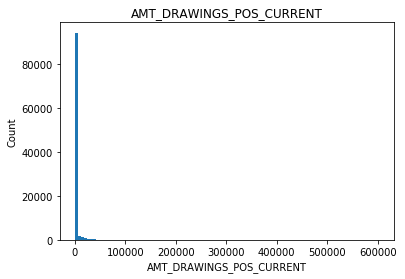

In [319]:
hist_maker(100, df_train['AMT_DRAWINGS_POS_CURRENT'], 'AMT_DRAWINGS_POS_CURRENT', 'AMT_DRAWINGS_POS_CURRENT')

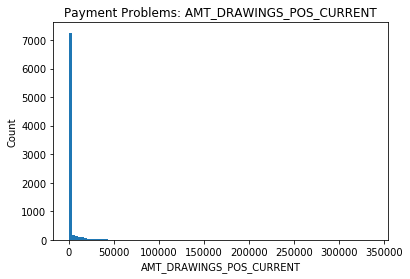

In [320]:
hist_maker(100, success1['AMT_DRAWINGS_POS_CURRENT'], 'AMT_DRAWINGS_POS_CURRENT', 'Payment Problems: AMT_DRAWINGS_POS_CURRENT')

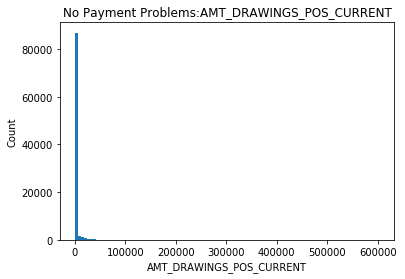

In [321]:
hist_maker(100, success0['AMT_DRAWINGS_POS_CURRENT'], 'AMT_DRAWINGS_POS_CURRENT', 'No Payment Problems:AMT_DRAWINGS_POS_CURRENT')

In [322]:
#All 3 charts look similar but this data could be hurt my the large number of missing values
dfex3 = df_train[['TARGET', 'AMT_DRAWINGS_POS_CURRENT']]
dfex3.corr()

,TARGET,AMT_DRAWINGS_POS_CURRENT
TARGET,1.00000,0.01145
AMT_DRAWINGS_POS_CURRENT,0.01145,1.00000


In [323]:
#The next column we will look at is NONLIVINGAREA_AVG
#This column indicates the average non living area.
df_train['NONLIVINGAREA_AVG'].isnull().sum()

55070

In [324]:
df_train['NONLIVINGAREA_AVG'] = df_train['NONLIVINGAREA_AVG'].fillna(0)
success1['NONLIVINGAREA_AVG'] = success1['NONLIVINGAREA_AVG'].fillna(0)
success0['NONLIVINGAREA_AVG'] = success0['NONLIVINGAREA_AVG'].fillna(0)
#We will assume that the missing values are due to loans being unrelated to property so we will fill in 0

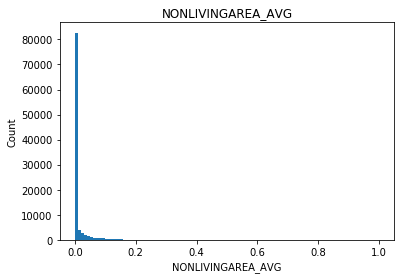

In [325]:
hist_maker(100, df_train['NONLIVINGAREA_AVG'], 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_AVG')

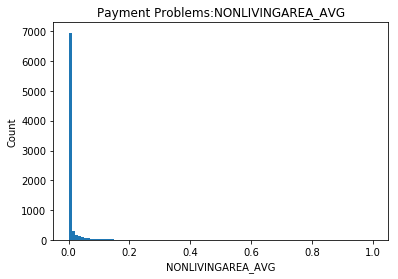

In [326]:
hist_maker(100, success1['NONLIVINGAREA_AVG'], 'NONLIVINGAREA_AVG', 'Payment Problems:NONLIVINGAREA_AVG')

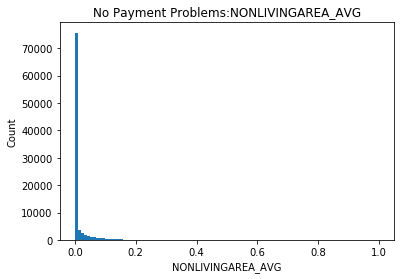

In [327]:
hist_maker(100, success0['NONLIVINGAREA_AVG'], 'NONLIVINGAREA_AVG', 'No Payment Problems:NONLIVINGAREA_AVG')

In [328]:
#The 3 charts look similar
dfex3 = df_train[['TARGET', 'NONLIVINGAREA_AVG']]
dfex3.corr()
#It looks like there is a slightly negative correlation between the variables

,TARGET,NONLIVINGAREA_AVG
TARGET,1.000000,-0.017423
NONLIVINGAREA_AVG,-0.017423,1.000000


In [329]:
#The next column we will look at is NONLIVINGAREA_MODE
#This column indicates the average non living area.
df_train['NONLIVINGAREA_MODE'].isnull().sum()

55070

In [330]:
df_train['NONLIVINGAREA_MODE'] = df_train['NONLIVINGAREA_MODE'].fillna(0)
success1['NONLIVINGAREA_MODE'] = success1['NONLIVINGAREA_MODE'].fillna(0)
success0['NONLIVINGAREA_MODE'] = success0['NONLIVINGAREA_MODE'].fillna(0)
#We will assume that the missing values are due to loans being unrelated to property so we will fill in 0

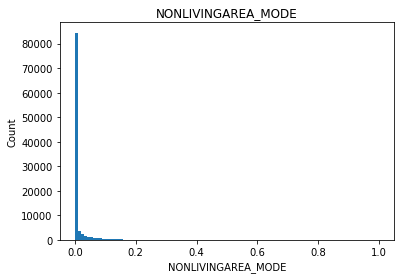

In [331]:
hist_maker(100, df_train['NONLIVINGAREA_MODE'], 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MODE')

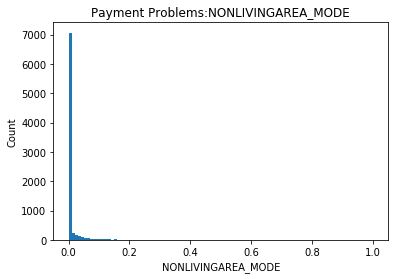

In [332]:
hist_maker(100, success1['NONLIVINGAREA_MODE'], 'NONLIVINGAREA_MODE', 'Payment Problems:NONLIVINGAREA_MODE')

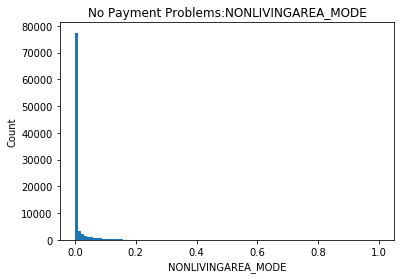

In [333]:
hist_maker(100, success0['NONLIVINGAREA_MODE'], 'NONLIVINGAREA_MODE', 'No Payment Problems:NONLIVINGAREA_MODE')

In [334]:
#All 3 charts look similar
dfex3 = df_train[['TARGET', 'NONLIVINGAREA_MODE']]
dfex3.corr()
#It looks like there is a slightly negative correlation between the two variables

,TARGET,NONLIVINGAREA_MODE
TARGET,1.000000,-0.016283
NONLIVINGAREA_MODE,-0.016283,1.000000


In [335]:
#The next column we will look at is NONLIVINGAREA_MEDI
#This column indicates the average non living area.
df_train['NONLIVINGAREA_MEDI'].isnull().sum()

55070

In [336]:
df_train['NONLIVINGAREA_MEDI'] = df_train['NONLIVINGAREA_MEDI'].fillna(0)
success1['NONLIVINGAREA_MEDI'] = success1['NONLIVINGAREA_MEDI'].fillna(0)
success0['NONLIVINGAREA_MEDI'] = success0['NONLIVINGAREA_MEDI'].fillna(0)
#We will assume that the missing values are due to loans being unrelated to property so we will fill in 0

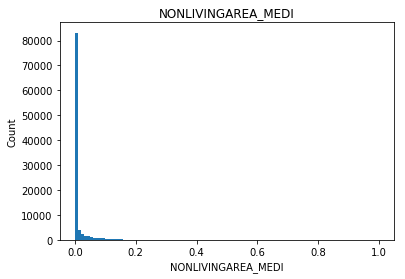

In [337]:
hist_maker(100, df_train['NONLIVINGAREA_MEDI'], 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_MEDI')

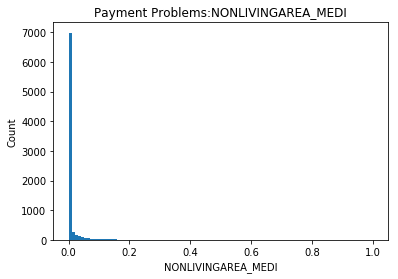

In [338]:
hist_maker(100, success1['NONLIVINGAREA_MEDI'], 'NONLIVINGAREA_MEDI', 'Payment Problems:NONLIVINGAREA_MEDI')

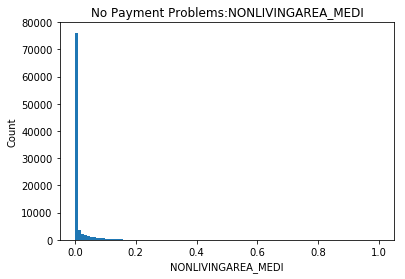

In [339]:
hist_maker(100, success0['NONLIVINGAREA_MEDI'], 'NONLIVINGAREA_MEDI', 'No Payment Problems:NONLIVINGAREA_MEDI')

In [340]:
dfex3 = df_train[['TARGET', 'NONLIVINGAREA_MEDI']]
dfex3.corr()
#It looks like there is a slight but insignificant negative correlation between the two variables

,TARGET,NONLIVINGAREA_MEDI
TARGET,1.000000,-0.017364
NONLIVINGAREA_MEDI,-0.017364,1.000000


In [341]:
#The next column we will look at is ELEVATORS_AVG
#This column indicates the average number of elevators
df_train['ELEVATORS_AVG'].isnull().sum()

53300

In [342]:
df_train['ELEVATORS_AVG'] = df_train['ELEVATORS_AVG'].fillna(0)
success1['ELEVATORS_AVG'] = success1['ELEVATORS_AVG'].fillna(0)
success0['ELEVATORS_AVG'] = success0['ELEVATORS_AVG'].fillna(0)
#We will assume that the missing values are due to loans being unrelated to property so we will fill in 0

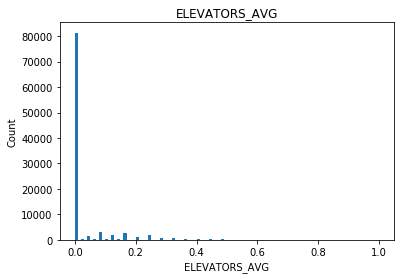

In [343]:
hist_maker(100, df_train['ELEVATORS_AVG'], 'ELEVATORS_AVG', 'ELEVATORS_AVG')

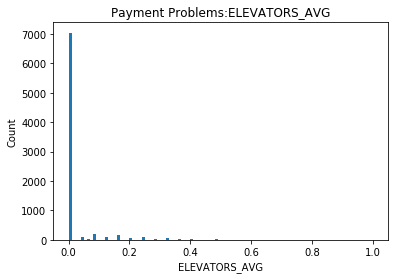

In [344]:
hist_maker(100, success1['ELEVATORS_AVG'], 'ELEVATORS_AVG', 'Payment Problems:ELEVATORS_AVG')

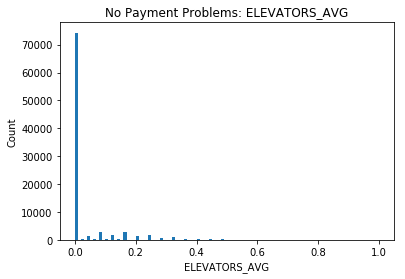

In [345]:
hist_maker(100, success0['ELEVATORS_AVG'], 'ELEVATORS_AVG', 'No Payment Problems: ELEVATORS_AVG')

In [346]:
#All 3 charts look similar
dfex3 = df_train[['TARGET', 'ELEVATORS_AVG']]
dfex3.corr()
#It looks like there is a slight negative correlation between the average number of elevators and payment problems

,TARGET,ELEVATORS_AVG
TARGET,1.000000,-0.038083
ELEVATORS_AVG,-0.038083,1.000000


In [347]:
#The next column we will look at is ELEVATORS_MEDI
#This column indicates the median number of elevators
df_train['ELEVATORS_MEDI'].isnull().sum()

53300

In [348]:
df_train['ELEVATORS_MEDI'] = df_train['ELEVATORS_MEDI'].fillna(0)
success1['ELEVATORS_MEDI'] = success1['ELEVATORS_MEDI'].fillna(0)
success0['ELEVATORS_MEDI'] = success0['ELEVATORS_MEDI'].fillna(0)
#We will assume that the missing values are due to loans being unrelated to property so we will fill in 0

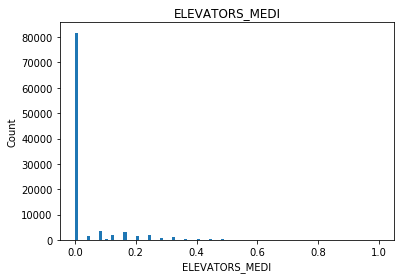

In [349]:
hist_maker(100, df_train['ELEVATORS_MEDI'], 'ELEVATORS_MEDI', 'ELEVATORS_MEDI')

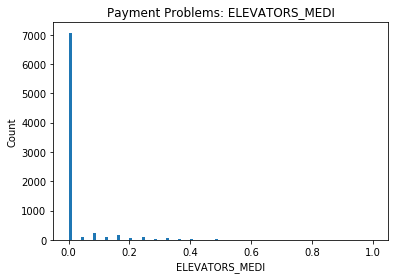

In [350]:
hist_maker(100, success1['ELEVATORS_MEDI'], 'ELEVATORS_MEDI', 'Payment Problems: ELEVATORS_MEDI')

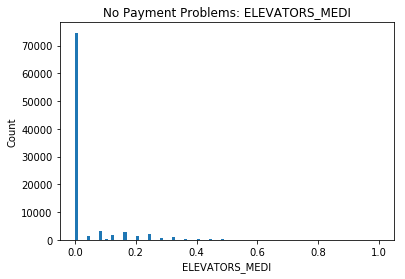

In [351]:
hist_maker(100, success0['ELEVATORS_MEDI'], 'ELEVATORS_MEDI', 'No Payment Problems: ELEVATORS_MEDI')

In [352]:
dfex3 = df_train[['TARGET', 'ELEVATORS_MEDI']]
dfex3.corr()
#It looks like there is a negative correlation between the number of elevators and payment problems

,TARGET,ELEVATORS_MEDI
TARGET,1.000000,-0.037697
ELEVATORS_MEDI,-0.037697,1.000000


In [353]:
#The next column we will look at is ELEVATORS_MODE
#This column indicates the mode number of elevators
df_train['ELEVATORS_MODE'].isnull().sum()

53300

In [354]:
df_train['ELEVATORS_MODE'] = df_train['ELEVATORS_MODE'].fillna(0)
success1['ELEVATORS_MODE'] = success1['ELEVATORS_MODE'].fillna(0)
success0['ELEVATORS_MODE'] = success0['ELEVATORS_MODE'].fillna(0)
#We will assume that the missing values are due to loans being unrelated to property so we will fill in 0

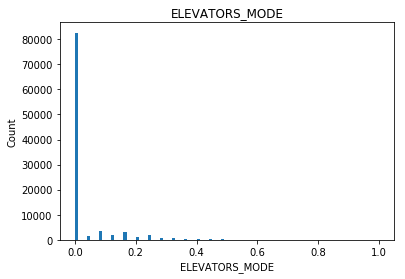

In [355]:
hist_maker(100, df_train['ELEVATORS_MODE'], 'ELEVATORS_MODE', 'ELEVATORS_MODE')

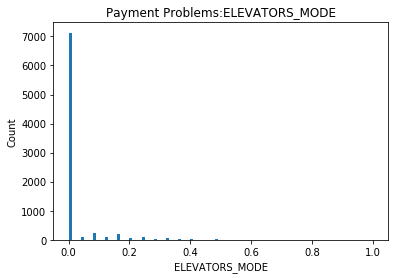

In [356]:
hist_maker(100, success1['ELEVATORS_MODE'], 'ELEVATORS_MODE', 'Payment Problems:ELEVATORS_MODE')

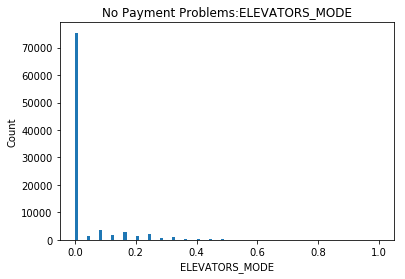

In [357]:
hist_maker(100, success0['ELEVATORS_MODE'], 'ELEVATORS_MODE', 'No Payment Problems:ELEVATORS_MODE')

In [358]:
#All 3 charts looks similar
dfex3 = df_train[['TARGET', 'ELEVATORS_MODE']]
dfex3.corr()
#It looks like there is a slight negative correlation between the two variables

,TARGET,ELEVATORS_MODE
TARGET,1.000000,-0.036373
ELEVATORS_MODE,-0.036373,1.000000


In [359]:
#The next column we will look at is DAYS_LAST_DUE_1ST_VERSION
#Relative to application date of current application when was the first due of the previous application
df_train['DAYS_LAST_DUE_1ST_VERSION'].isnull().sum()

5763

In [360]:
df_train['DAYS_LAST_DUE_1ST_VERSION'] = df_train['DAYS_LAST_DUE_1ST_VERSION'].fillna(0)
success1['DAYS_LAST_DUE_1ST_VERSION'] = success1['DAYS_LAST_DUE_1ST_VERSION'].fillna(0)
success0['DAYS_LAST_DUE_1ST_VERSION'] = success0['DAYS_LAST_DUE_1ST_VERSION'].fillna(0)
#We will assume that the missing values are due to payment not being made so we will fill in 0

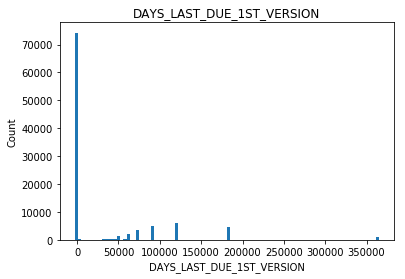

In [361]:
hist_maker(100, df_train['DAYS_LAST_DUE_1ST_VERSION'], 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE_1ST_VERSION')

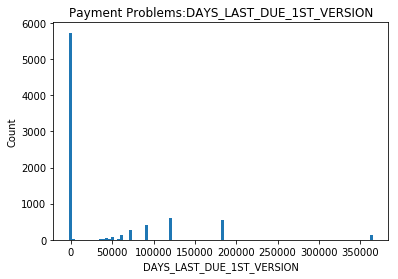

In [362]:
hist_maker(100, success1['DAYS_LAST_DUE_1ST_VERSION'], 'DAYS_LAST_DUE_1ST_VERSION', 'Payment Problems:DAYS_LAST_DUE_1ST_VERSION')

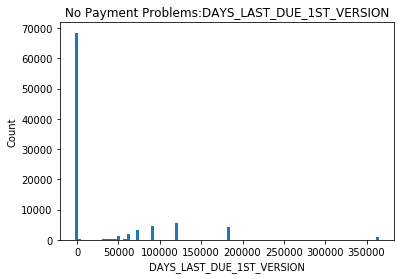

In [363]:
hist_maker(100, success0['DAYS_LAST_DUE_1ST_VERSION'], 'DAYS_LAST_DUE_1ST_VERSION', 'No Payment Problems:DAYS_LAST_DUE_1ST_VERSION')

In [364]:
#All 3 charts look similar
dfex3 = df_train[['TARGET', 'DAYS_LAST_DUE_1ST_VERSION']]
dfex3.corr()
#It looks like there is a slight positive correlation between the data

,TARGET,DAYS_LAST_DUE_1ST_VERSION
TARGET,1.000000,0.037015
DAYS_LAST_DUE_1ST_VERSION,0.037015,1.000000


In [365]:
#The next xolumn we will look at is BASEMENTAREA_AVG
#This column indicates the average basement area
df_train['BASEMENTAREA_AVG'].isnull().sum()

58360

In [366]:
df_train['BASEMENTAREA_AVG'] = df_train['BASEMENTAREA_AVG'].fillna(0)
success1['BASEMENTAREA_AVG'] = success1['BASEMENTAREA_AVG'].fillna(0)
success0['BASEMENTAREA_AVG'] = success0['BASEMENTAREA_AVG'].fillna(0)
#We will assume that the missing values are due to loans being unrelated to property so we will fill in 0

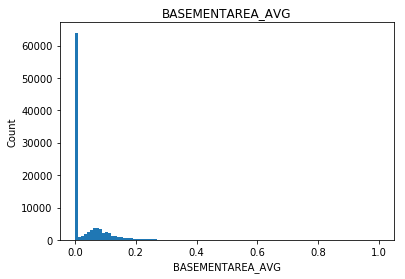

In [367]:
hist_maker(100, df_train['BASEMENTAREA_AVG'], 'BASEMENTAREA_AVG', 'BASEMENTAREA_AVG')

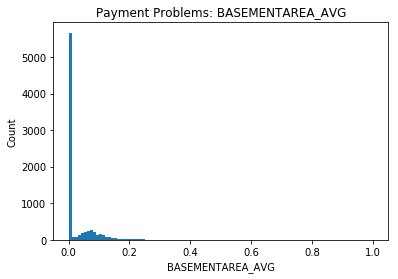

In [368]:
hist_maker(100, success1['BASEMENTAREA_AVG'], 'BASEMENTAREA_AVG', 'Payment Problems: BASEMENTAREA_AVG')

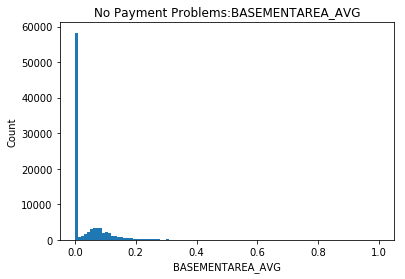

In [369]:
hist_maker(100, success0['BASEMENTAREA_AVG'], 'BASEMENTAREA_AVG', 'No Payment Problems:BASEMENTAREA_AVG')

In [370]:
#All 3 charts look similar
dfex3 = df_train[['TARGET', 'BASEMENTAREA_AVG']]
dfex3.corr()
#It looks like there is a slight negative correlation between the data

,TARGET,BASEMENTAREA_AVG
TARGET,1.000000,-0.033533
BASEMENTAREA_AVG,-0.033533,1.000000


In [371]:
#The next column we willl look at is OCCUPATION_TYPE_Laborers
#This column indicates if the client's occupation is laborer
df_train['OCCUPATION_TYPE_Laborers'].isnull().sum()

0

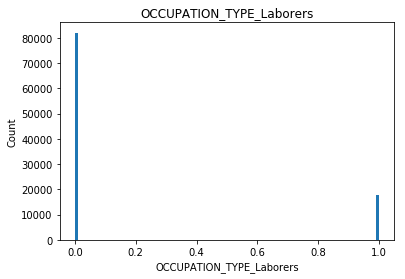

In [372]:
hist_maker(100, df_train['OCCUPATION_TYPE_Laborers'], 'OCCUPATION_TYPE_Laborers', 'OCCUPATION_TYPE_Laborers')

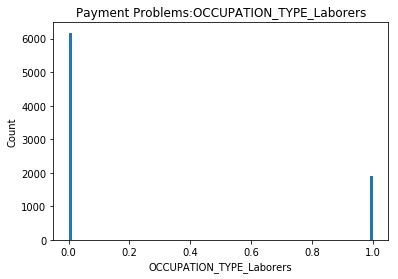

In [373]:
hist_maker(100, success1['OCCUPATION_TYPE_Laborers'], 'OCCUPATION_TYPE_Laborers', 'Payment Problems:OCCUPATION_TYPE_Laborers')

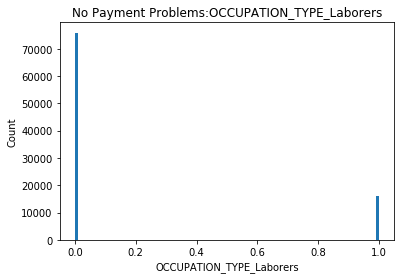

In [374]:
hist_maker(100, success0['OCCUPATION_TYPE_Laborers'], 'OCCUPATION_TYPE_Laborers', 'No Payment Problems:OCCUPATION_TYPE_Laborers')

In [375]:
#It looks like there might be more payment problems for laborers
#This could be due to the cyclical nature of the industry and could make economic loan timing very important
dfex3 = df_train[['TARGET', 'OCCUPATION_TYPE_Laborers']]
dfex3.corr()
#It looks like there is a slight positive correlation between these two categories

,TARGET,OCCUPATION_TYPE_Laborers
TARGET,1.000000,0.044128
OCCUPATION_TYPE_Laborers,0.044128,1.000000


In [376]:
#The next column we will look at is FLOORSMIN_AVG
#This column indicates the minimum number of floors
df_train['FLOORSMIN_AVG'].isnull().sum()

67703

In [377]:
df_train['FLOORSMIN_AVG'] = df_train['FLOORSMIN_AVG'].fillna(0)
success1['FLOORSMIN_AVG'] = success1['FLOORSMIN_AVG'].fillna(0)
success0['FLOORSMIN_AVG'] = success0['FLOORSMIN_AVG'].fillna(0)
#We will assume that the missing values are due to loans being unrelated to property so we will fill in 0

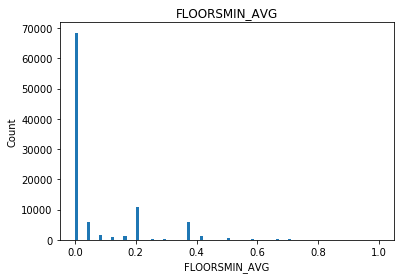

In [378]:
hist_maker(100, df_train['FLOORSMIN_AVG'], 'FLOORSMIN_AVG', 'FLOORSMIN_AVG')

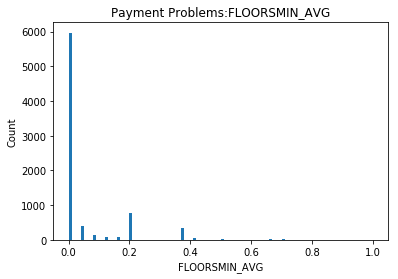

In [379]:
hist_maker(100, success1['FLOORSMIN_AVG'], 'FLOORSMIN_AVG', 'Payment Problems:FLOORSMIN_AVG')

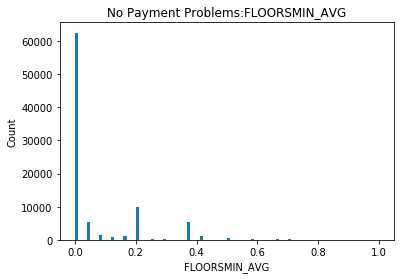

In [380]:
hist_maker(100,success0['FLOORSMIN_AVG'], 'FLOORSMIN_AVG', 'No Payment Problems:FLOORSMIN_AVG')

In [381]:
dfex3 = df_train[['TARGET', 'FLOORSMIN_AVG']]
dfex3.corr()
#It looks like there is a slight negative correlation between the two variables

,TARGET,FLOORSMIN_AVG
TARGET,1.000000,-0.037601
FLOORSMIN_AVG,-0.037601,1.000000


In [382]:
#The next column we will look at is BASEMENTAREA_MEDI
#This column indicates the median basement area
df_train['BASEMENTAREA_MEDI'].isnull().sum()

58360

In [383]:
df_train['BASEMENTAREA_MEDI'] = df_train['BASEMENTAREA_MEDI'].fillna(0)
success1['BASEMENTAREA_MEDI'] = success1['BASEMENTAREA_MEDI'].fillna(0)
success0['BASEMENTAREA_MEDI'] = success0['BASEMENTAREA_MEDI'].fillna(0)
#We will assume that the missing values are due to loans being unrelated to property so we will fill in 0

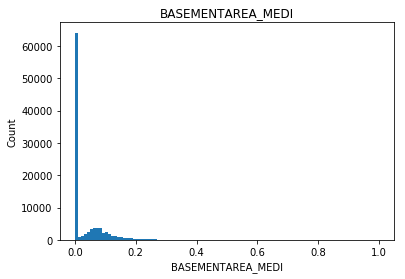

In [384]:
hist_maker(100, df_train['BASEMENTAREA_MEDI'], 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MEDI')

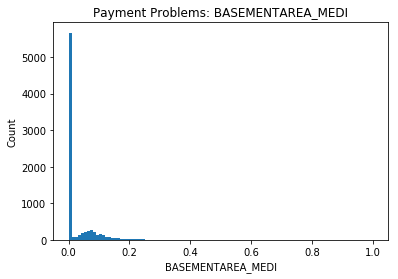

In [385]:
hist_maker(100, success1['BASEMENTAREA_MEDI'], 'BASEMENTAREA_MEDI', 'Payment Problems: BASEMENTAREA_MEDI')

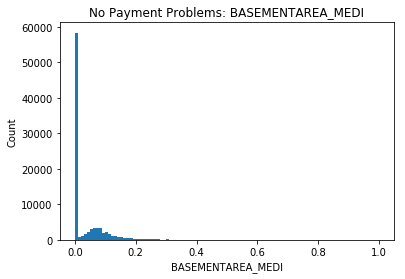

In [386]:
hist_maker(100, success0['BASEMENTAREA_MEDI'], 'BASEMENTAREA_MEDI', 'No Payment Problems: BASEMENTAREA_MEDI')

In [387]:
#All 3 charts looks similar
dfex3 = df_train[['TARGET', 'BASEMENTAREA_MEDI']]
dfex3.corr()
#It looks like there is a slight negative relationship between the two variables

,TARGET,BASEMENTAREA_MEDI
TARGET,1.000000,-0.033195
BASEMENTAREA_MEDI,-0.033195,1.000000


In [388]:
#The next column we will look at is AMT_ANNUITY
#This column indicates the amount of the annuity
df_train['AMT_ANNUITY'].isnull().sum()

5466

In [389]:
df_train['AMT_ANNUITY'] = df_train['AMT_ANNUITY'].fillna(0)
success1['AMT_ANNUITY'] = success1['AMT_ANNUITY'].fillna(0)
success0['AMT_ANNUITY'] = success0['AMT_ANNUITY'].fillna(0)
#We will assume that the missing values are due to annuity amount being 0

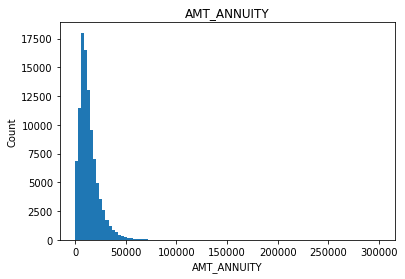

In [390]:
hist_maker(100, df_train['AMT_ANNUITY'], 'AMT_ANNUITY', 'AMT_ANNUITY')

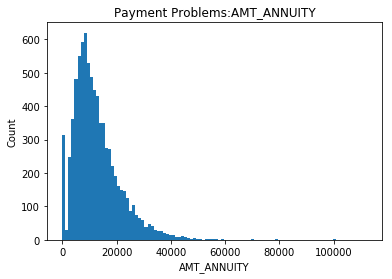

In [391]:
hist_maker(100, success1['AMT_ANNUITY'], 'AMT_ANNUITY', 'Payment Problems:AMT_ANNUITY')

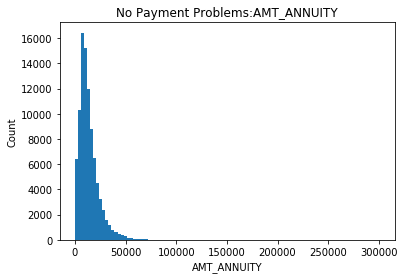

In [392]:
hist_maker(100, success0['AMT_ANNUITY'], 'AMT_ANNUITY', 'No Payment Problems:AMT_ANNUITY')

In [393]:
#It looks like there are more payment problems between 15000 and 20000
dfex3 = df_train[['TARGET', 'AMT_ANNUITY']]
dfex3.corr()
#It looks like there is a slight negative correlation between annuity amount and payment problems

,TARGET,AMT_ANNUITY
TARGET,1.000000,-0.025619
AMT_ANNUITY,-0.025619,1.000000


In [394]:
#The next column we will look at is FLOORSMIN_MODE
#This column indicates the mode minimum number of floors
df_train['FLOORSMIN_MODE'].isnull().sum()

67703

In [395]:
df_train['FLOORSMIN_MODE'] = df_train['FLOORSMIN_MODE'].fillna(0)
success1['FLOORSMIN_MODE'] = success1['FLOORSMIN_MODE'].fillna(0)
success0['FLOORSMIN_MODE'] = success0['FLOORSMIN_MODE'].fillna(0)
#We will assume that the missing values are due to loans being unrelated to property so we will fill in 0

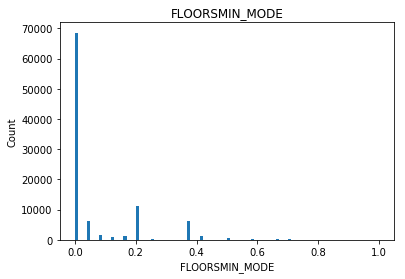

In [396]:
hist_maker(100, df_train['FLOORSMIN_MODE'], 'FLOORSMIN_MODE', 'FLOORSMIN_MODE')

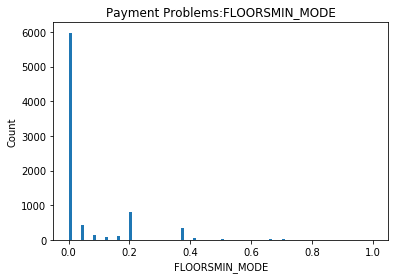

In [397]:
hist_maker(100, success1['FLOORSMIN_MODE'], 'FLOORSMIN_MODE', 'Payment Problems:FLOORSMIN_MODE')

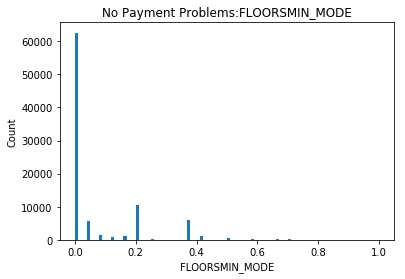

In [398]:
hist_maker(100, success0['FLOORSMIN_MODE'], 'FLOORSMIN_MODE', 'No Payment Problems:FLOORSMIN_MODE')

In [399]:
dfex3 = df_train[['TARGET', 'FLOORSMIN_MODE']]
dfex3.corr()
#It looks like there is a slightly negative correlation between the mode of the minimum number of floors and payment problems

,TARGET,FLOORSMIN_MODE
TARGET,1.000000,-0.037182
FLOORSMIN_MODE,-0.037182,1.000000


In [400]:
#The next column we will look at is OWN_CAR_AGE
#This column indcaites the age of a car if they own a car
df_train['OWN_CAR_AGE'].isnull().sum()

66019

In [401]:
df_train['OWN_CAR_AGE'].max()

65.0

In [402]:
df_train['OWN_CAR_AGE'] = df_train['OWN_CAR_AGE'].fillna(65)
success1['OWN_CAR_AGE'] = success1['OWN_CAR_AGE'].fillna(65)
success0['OWN_CAR_AGE'] = success0['OWN_CAR_AGE'].fillna(65)
#For this column, we will not use 0 as that would indicate that all of the missing values were for people with brand new cars
#We will instead assume that the missing values are due to people not owning cars.
#Since newer cars are typically more expensive than old cars we would use the max to give the cars the lowest possible asset value.


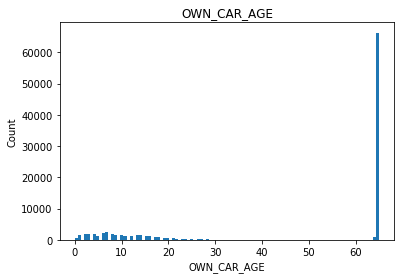

In [403]:
hist_maker(100, df_train['OWN_CAR_AGE'], 'OWN_CAR_AGE', 'OWN_CAR_AGE')

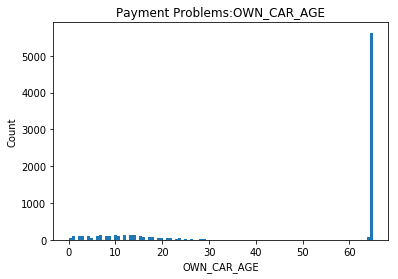

In [404]:
hist_maker(100, success1['OWN_CAR_AGE'], 'OWN_CAR_AGE', 'Payment Problems:OWN_CAR_AGE')

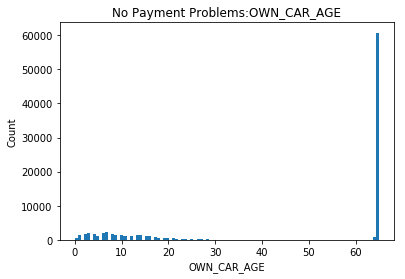

In [405]:
hist_maker(100, success0['OWN_CAR_AGE'], 'OWN_CAR_AGE', 'No Payment Problems:OWN_CAR_AGE')

In [406]:
#All 3 columns look similar
dfex3 = df_train[['TARGET', 'OWN_CAR_AGE']]
dfex3.corr()
#It looks like there is a slight positive correlation between the age of a car and payment problems

,TARGET,OWN_CAR_AGE
TARGET,1.000000,0.025681
OWN_CAR_AGE,0.025681,1.000000


In [407]:
#The next column we will look at is BASEMENTAREA_MEDI
#This column indicates the median of basement areas
df_train['BASEMENTAREA_MEDI'].isnull().sum()

0

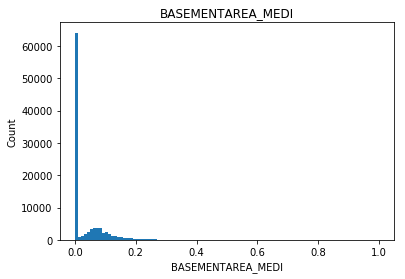

In [408]:
hist_maker(100, df_train['BASEMENTAREA_MEDI'], 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MEDI')

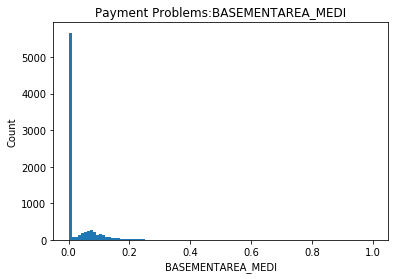

In [409]:
hist_maker(100, success1['BASEMENTAREA_MEDI'], 'BASEMENTAREA_MEDI', 'Payment Problems:BASEMENTAREA_MEDI')

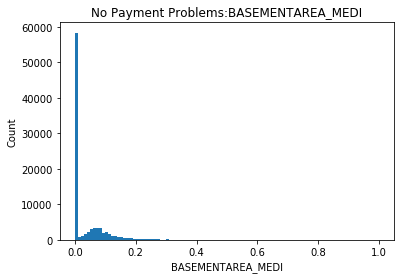

In [410]:
hist_maker(100, success0['BASEMENTAREA_MEDI'], 'BASEMENTAREA_MEDI', 'No Payment Problems:BASEMENTAREA_MEDI')

In [411]:
#All 3 columns look similar
dfex3 = df_train[['TARGET', 'BASEMENTAREA_MEDI']]
dfex3.corr()
#It looks like there is a slight negative correlation between median basement area and payment problems

,TARGET,BASEMENTAREA_MEDI
TARGET,1.000000,-0.033195
BASEMENTAREA_MEDI,-0.033195,1.000000


In [412]:
#The next column we will look at is BASEMENTAREA_MODE
#This column indicates the median of basement areas
df_train['BASEMENTAREA_MODE'].isnull().sum()

58360

In [413]:
df_train['BASEMENTAREA_MODE'] = df_train['BASEMENTAREA_MODE'].fillna(0)
success1['BASEMENTAREA_MODE'] = success1['BASEMENTAREA_MODE'].fillna(0)
success0['BASEMENTAREA_MODE'] = success0['BASEMENTAREA_MODE'].fillna(0)
#We will assume that the missing values are due to loans being unrelated to property so we will fill in 0

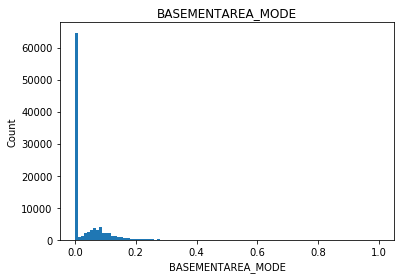

In [414]:
hist_maker(100, df_train['BASEMENTAREA_MODE'], 'BASEMENTAREA_MODE', 'BASEMENTAREA_MODE')

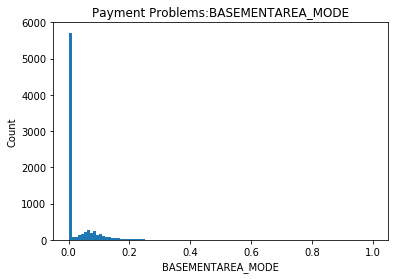

In [415]:
hist_maker(100, success1['BASEMENTAREA_MODE'], 'BASEMENTAREA_MODE', 'Payment Problems:BASEMENTAREA_MODE')

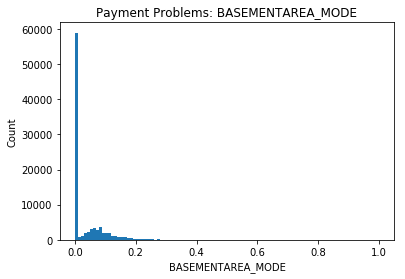

In [416]:
hist_maker(100, success0['BASEMENTAREA_MODE'], 'BASEMENTAREA_MODE', 'Payment Problems: BASEMENTAREA_MODE')

In [417]:
#All 3 columns look similar
dfex3 = df_train[['TARGET', 'BASEMENTAREA_MODE']]
dfex3.corr()
#It looks like there is a slight engative relationship between mode basement area and payment problems

,TARGET,BASEMENTAREA_MODE
TARGET,1.000000,-0.031813
BASEMENTAREA_MODE,-0.031813,1.000000


In [418]:
#The next column we will look at is HOUR_APPR_PROCESS_START_y
#This column indincates approxiamately what time the application was started
df_train['HOUR_APPR_PROCESS_START_y'].isnull().sum()

5346

In [419]:
df_train['HOUR_APPR_PROCESS_START_y'].mode()

0    13.0
dtype: float64

In [420]:
df_train['HOUR_APPR_PROCESS_START_y'] = df_train['HOUR_APPR_PROCESS_START_y'].fillna(13)
success1['HOUR_APPR_PROCESS_START_y'] = success1['HOUR_APPR_PROCESS_START_y'].fillna(13)
success0['HOUR_APPR_PROCESS_START_y'] = success0['HOUR_APPR_PROCESS_START_y'].fillna(13)
#For this column, we will fill missing values using the mode

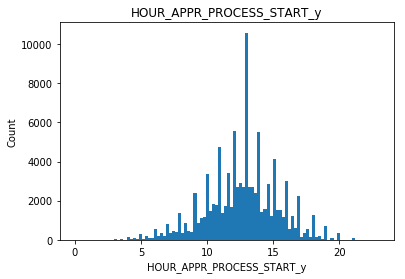

In [421]:
hist_maker(100, df_train['HOUR_APPR_PROCESS_START_y'], 'HOUR_APPR_PROCESS_START_y', 'HOUR_APPR_PROCESS_START_y')

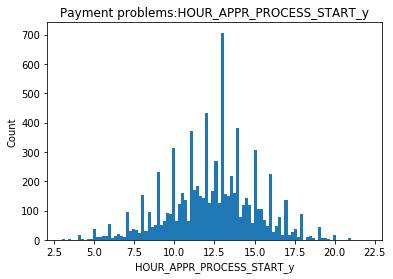

In [422]:
hist_maker(100, success1['HOUR_APPR_PROCESS_START_y'], 'HOUR_APPR_PROCESS_START_y', 'Payment problems:HOUR_APPR_PROCESS_START_y')

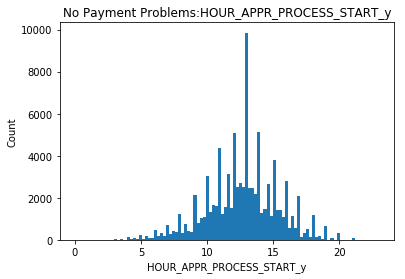

In [423]:
hist_maker(100, success0['HOUR_APPR_PROCESS_START_y'], 'HOUR_APPR_PROCESS_START_y', 'No Payment Problems:HOUR_APPR_PROCESS_START_y')

In [424]:
#All 3 charts look simiilar
dfex3 = df_train[['TARGET', 'HOUR_APPR_PROCESS_START_y']]
dfex3.corr()
#It looks like there is a slightly negative relationship between hour the application was started and payment problems

,TARGET,HOUR_APPR_PROCESS_START_y
TARGET,1.000000,-0.035751
HOUR_APPR_PROCESS_START_y,-0.035751,1.000000


In [425]:
#The next column we will look at is AMT_INSTALMENT
#This column indicates the amount of installment due
df_train['AMT_INSTALMENT'].isnull().sum()

5145

In [426]:
df_train['AMT_INSTALMENT'] = df_train['AMT_INSTALMENT'].fillna(0)
success1['AMT_INSTALMENT'] = success1['AMT_INSTALMENT'].fillna(0)
success0['AMT_INSTALMENT'] = success0['AMT_INSTALMENT'].fillna(0)
#We will assume that the missing values are due to the installment being 0

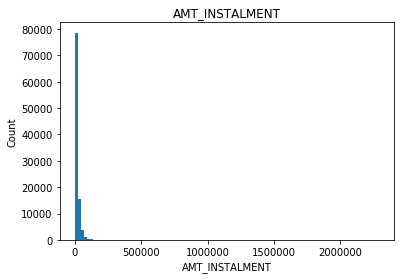

In [427]:
hist_maker(100, df_train['AMT_INSTALMENT'], 'AMT_INSTALMENT', 'AMT_INSTALMENT')

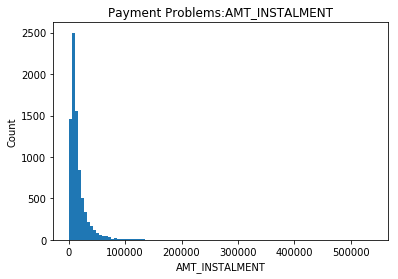

In [428]:
hist_maker(100, success1['AMT_INSTALMENT'], 'AMT_INSTALMENT', 'Payment Problems:AMT_INSTALMENT')

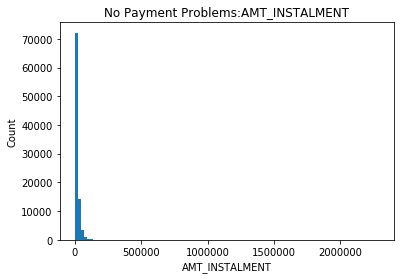

In [429]:
hist_maker(100, success0['AMT_INSTALMENT'], 'AMT_INSTALMENT', 'No Payment Problems:AMT_INSTALMENT')

In [430]:
dfex3 = df_train[['TARGET', 'AMT_INSTALMENT']]
dfex3.corr()
#It looks like there is a slight negative correlation between  the installment amount and payment problems

,TARGET,AMT_INSTALMENT
TARGET,1.00000,-0.01327
AMT_INSTALMENT,-0.01327,1.00000


In [431]:
#The next column we will look at is MONTHS_BALANCE_x.1
#This column indicates months balance
df_train['MONTHS_BALANCE_x.1'].isnull().sum()

5897

In [432]:
df_train['MONTHS_BALANCE_x.1'] = df_train['MONTHS_BALANCE_x.1'].fillna(0)
success1['MONTHS_BALANCE_x.1'] = success1['MONTHS_BALANCE_x.1'].fillna(0)
success0['MONTHS_BALANCE_x.1'] = success0['MONTHS_BALANCE_x.1'].fillna(0)
#We will assume the missing values are due to the balance being 0

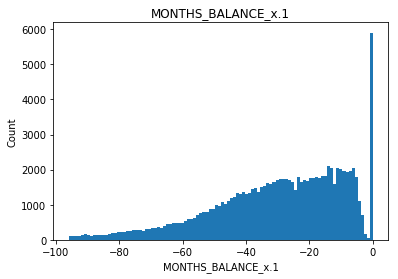

In [433]:
hist_maker(100, df_train['MONTHS_BALANCE_x.1'], 'MONTHS_BALANCE_x.1', 'MONTHS_BALANCE_x.1')

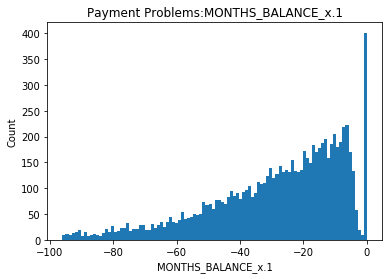

In [434]:
hist_maker(100,success1['MONTHS_BALANCE_x.1'], 'MONTHS_BALANCE_x.1', 'Payment Problems:MONTHS_BALANCE_x.1')

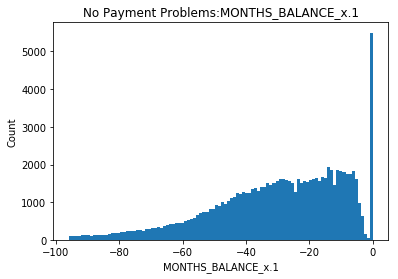

In [435]:
hist_maker(100, success0['MONTHS_BALANCE_x.1'], 'MONTHS_BALANCE_x.1', 'No Payment Problems:MONTHS_BALANCE_x.1')

In [436]:
#It looks like there are more payment problems with lower months balances
dfex3 = df_train[['TARGET', 'MONTHS_BALANCE_x.1']]
dfex3.corr()
#It looks like there is a slight positive relationship between 

,TARGET,MONTHS_BALANCE_x.1
TARGET,1.000000,0.023372
MONTHS_BALANCE_x.1,0.023372,1.000000


In [437]:
#The next column we will look at is CNT_DRAWINGS_OTHER_CURRENT
df_train['CNT_DRAWINGS_OTHER_CURRENT'].isnull().sum()

80334

In [438]:
df_train['CNT_DRAWINGS_OTHER_CURRENT'] = df_train['CNT_DRAWINGS_OTHER_CURRENT'].fillna(0)
success1['CNT_DRAWINGS_OTHER_CURRENT'] = success1['CNT_DRAWINGS_OTHER_CURRENT'].fillna(0)
success0['CNT_DRAWINGS_OTHER_CURRENT'] = success0['CNT_DRAWINGS_OTHER_CURRENT'].fillna(0)
#We will assume that the missing values are due to there being no drawings

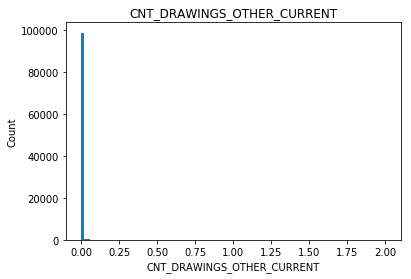

In [439]:
hist_maker(100, df_train['CNT_DRAWINGS_OTHER_CURRENT'], 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT')

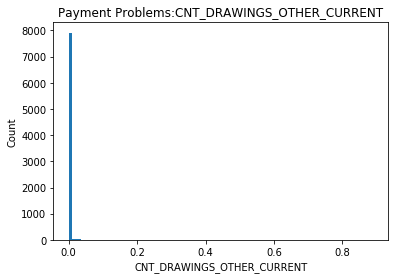

In [440]:
hist_maker(100, success1['CNT_DRAWINGS_OTHER_CURRENT'], 'CNT_DRAWINGS_OTHER_CURRENT', 'Payment Problems:CNT_DRAWINGS_OTHER_CURRENT')

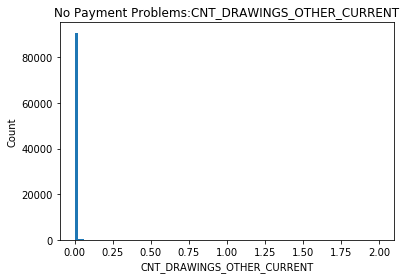

In [441]:
hist_maker(100, success0['CNT_DRAWINGS_OTHER_CURRENT'], 'CNT_DRAWINGS_OTHER_CURRENT', 'No Payment Problems:CNT_DRAWINGS_OTHER_CURRENT')

In [442]:
#All 3 charts look similar
dfex3 = df_train[['TARGET', 'CNT_DRAWINGS_OTHER_CURRENT']]
dfex3.corr()
#It looks like there is a slightly positive correlation between current drawings and payment problems

,TARGET,CNT_DRAWINGS_OTHER_CURRENT
TARGET,1.000000,0.012025
CNT_DRAWINGS_OTHER_CURRENT,0.012025,1.000000


In [443]:
#The next column we will look at is AMT_DRAWINGS_OTHER_CURRENT
df_train['AMT_DRAWINGS_OTHER_CURRENT'].isnull().sum()

80334

In [444]:
df_train['AMT_DRAWINGS_OTHER_CURRENT'] = df_train['AMT_DRAWINGS_OTHER_CURRENT'].fillna(0)
success1['AMT_DRAWINGS_OTHER_CURRENT'] = success1['AMT_DRAWINGS_OTHER_CURRENT'].fillna(0)
success0['AMT_DRAWINGS_OTHER_CURRENT'] = success0['AMT_DRAWINGS_OTHER_CURRENT'].fillna(0)
#We will assume that the missing values are due to drawings being 0

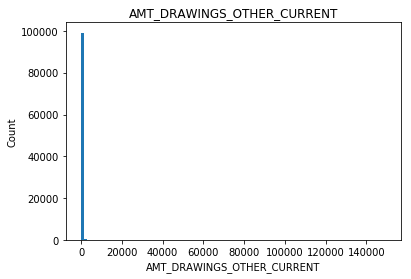

In [445]:
hist_maker(100, df_train['AMT_DRAWINGS_OTHER_CURRENT'], 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT')

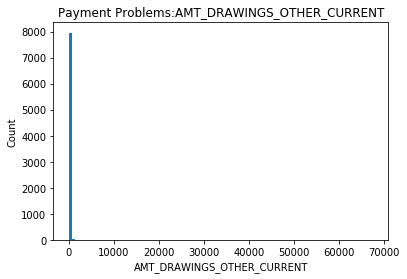

In [446]:
hist_maker(100, success1['AMT_DRAWINGS_OTHER_CURRENT'], 'AMT_DRAWINGS_OTHER_CURRENT', 'Payment Problems:AMT_DRAWINGS_OTHER_CURRENT')

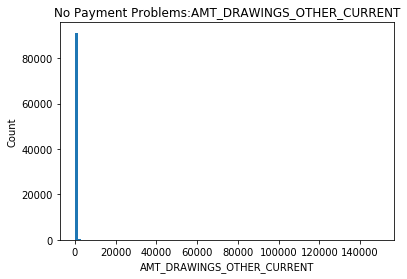

In [447]:
hist_maker(100, success0['AMT_DRAWINGS_OTHER_CURRENT'], 'AMT_DRAWINGS_OTHER_CURRENT', 'No Payment Problems:AMT_DRAWINGS_OTHER_CURRENT')

In [448]:
#All 3 charts look similar
dfex3 = df_train[['TARGET', 'AMT_DRAWINGS_OTHER_CURRENT']]
dfex3.corr()
#It looks like there is a slightly positive relationship between drawings and payment problems

,TARGET,AMT_DRAWINGS_OTHER_CURRENT
TARGET,1.000000,0.008127
AMT_DRAWINGS_OTHER_CURRENT,0.008127,1.000000


In [449]:
#The least column we will look at is AMT_PAYMENT_CURRENT
#This column indicates the current payment amount
df_train['AMT_PAYMENT_CURRENT'].isnull().sum()

80356

In [450]:
df_train['AMT_PAYMENT_CURRENT'] = df_train['AMT_PAYMENT_CURRENT'].fillna(0)
success1['AMT_PAYMENT_CURRENT'] = success1['AMT_PAYMENT_CURRENT'].fillna(0)
success0['AMT_PAYMENT_CURRENT'] = success0['AMT_PAYMENT_CURRENT'].fillna(0)
#We will assume that the missing values are due to the current payent being 0

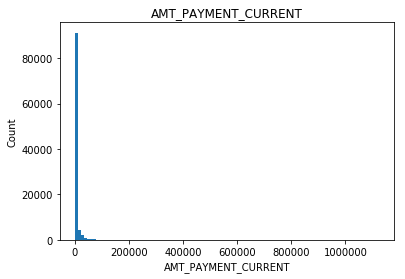

In [451]:
hist_maker(100, df_train['AMT_PAYMENT_CURRENT'], 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_CURRENT')

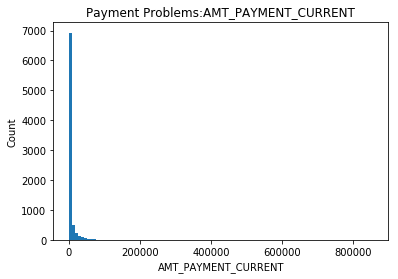

In [452]:
hist_maker(100, success1['AMT_PAYMENT_CURRENT'], 'AMT_PAYMENT_CURRENT', 'Payment Problems:AMT_PAYMENT_CURRENT')

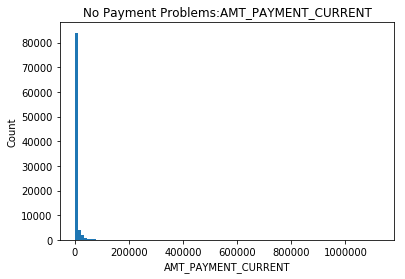

In [453]:
hist_maker(100, success0['AMT_PAYMENT_CURRENT'], 'AMT_PAYMENT_CURRENT', 'No Payment Problems:AMT_PAYMENT_CURRENT')

In [454]:
dfex3 = df_train[['TARGET', 'AMT_PAYMENT_CURRENT']]
dfex3.corr()
#It lookd like there is a slightly positive relationship between payment amount and payment problems

,TARGET,AMT_PAYMENT_CURRENT
TARGET,1.000000,0.022277
AMT_PAYMENT_CURRENT,0.022277,1.000000


In [515]:
df_train.isnull().sum()

SK_ID_CURR                                               0
SK_ID_BUREAU                                         14246
TARGET                                                   0
EXT_SOURCE_3                                             0
EXT_SOURCE_2                                             0
EXT_SOURCE_1                                             0
DAYS_BIRTH                                               0
NAME_EDUCATION_TYPE_Higher education                     0
CNT_DRAWINGS_ATM_CURRENT_x                               0
CNT_DRAWINGS_ATM_CURRENT_y                               0
AMT_DRAWINGS_CURRENT                                     0
AMT_BALANCE                                              0
AMT_RECIVABLE                                            0
AMT_RECEIVABLE_PRINCIPAL                                 0
NAME_INCOME_TYPE_Working                                 0
FLOORSMAX_AVG                                            0
FLOORSMAX_MEDI                                          

In [516]:
df_train.columns.values

array(['SK_ID_CURR', 'SK_ID_BUREAU', 'TARGET', 'EXT_SOURCE_3',
       'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH',
       'NAME_EDUCATION_TYPE_Higher education',
       'CNT_DRAWINGS_ATM_CURRENT_x', 'CNT_DRAWINGS_ATM_CURRENT_y',
       'AMT_DRAWINGS_CURRENT', 'AMT_BALANCE', 'AMT_RECIVABLE',
       'AMT_RECEIVABLE_PRINCIPAL', 'NAME_INCOME_TYPE_Working',
       'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'DAYS_DECISION',
       'TOTALAREA_MODE', 'FLOORSMAX_MODE', 'CODE_GENDER_M',
       'CODE_GENDER_F', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ENTRY_PAYMENT',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'LIVINGAREA_MEDI', 'LIVINGAREA_AVG', 'DAYS_INSTALMENT',
       'AMT_DRAWINGS_ATM_CURRENT', 'LIVINGAREA_MODE', 'DAYS_ID_PUBLISH',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'APARTMENTS_AVG',
       'AMT_INST_MIN_REGULARITY', 'APARTMENTS_MEDI', 'AMT_DOWN_PAYMENT',
       'APARTMENTS_MODE', 'AMT_GOODS_PRICE_x', 'AMT_PAYME

In [455]:
df_train = df_train[['SK_ID_CURR', 'TARGET', 'EXT_SOURCE_3', 'EXT_SOURCE_2',
       'EXT_SOURCE_1', 'DAYS_BIRTH',
       'NAME_EDUCATION_TYPE_Higher education',
       'CNT_DRAWINGS_ATM_CURRENT_x', 'CNT_DRAWINGS_ATM_CURRENT_y',
       'AMT_DRAWINGS_CURRENT', 'AMT_BALANCE', 'AMT_RECIVABLE',
       'AMT_RECEIVABLE_PRINCIPAL', 'NAME_INCOME_TYPE_Working',
       'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'DAYS_DECISION',
       'TOTALAREA_MODE', 'FLOORSMAX_MODE', 'CODE_GENDER_M',
       'CODE_GENDER_F', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ENTRY_PAYMENT',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'LIVINGAREA_MEDI', 'LIVINGAREA_AVG', 'DAYS_INSTALMENT',
       'AMT_DRAWINGS_ATM_CURRENT', 'LIVINGAREA_MODE', 'DAYS_ID_PUBLISH',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'APARTMENTS_AVG',
       'AMT_INST_MIN_REGULARITY', 'APARTMENTS_MEDI', 'AMT_DOWN_PAYMENT',
       'APARTMENTS_MODE', 'AMT_GOODS_PRICE_x', 'AMT_PAYMENT',
       'ENTRANCES_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE',
       'NAME_INCOME_TYPE_Pensioner', 'ORGANIZATION_TYPE_XNA',
       'CNT_DRAWINGS_POS_CURRENT', 'FLAG_EMP_PHONE',
       'EMERGENCYSTATE_MODE_No', 'REGION_RATING_CLIENT_W_CITY',
       'REG_CITY_NOT_WORK_CITY', 'REGION_RATING_CLIENT',
       'HOUSETYPE_MODE_block of flats', 'FLAG_DOCUMENT_3',
       'SELLERPLACE_AREA', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'NONLIVINGAREA_AVG',
       'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI', 'ELEVATORS_AVG',
       'ELEVATORS_MODE', 'ELEVATORS_MEDI', 'DAYS_LAST_DUE_1ST_VERSION',
       'BASEMENTAREA_AVG', 'OCCUPATION_TYPE_Laborers', 'FLOORSMIN_AVG',
       'BASEMENTAREA_MEDI', 'OWN_CAR_AGE', 'FLOORSMIN_MODE',
       'BASEMENTAREA_MODE', 'HOUR_APPR_PROCESS_START_y', 'AMT_INSTALMENT',
       'MONTHS_BALANCE_x.1', 'CNT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_PAYMENT_CURRENT', 'AMT_ANNUITY']]

In [456]:
df_train.to_csv('C:\\Users\\tilleymusprime\\Desktop\\dftrain_final.csv')

In [518]:
# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(df_train1, df_train['TARGET'], test_size = 0.2 , random_state=42)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.919254037298135


In [519]:
logit = sm.Logit(df_train['TARGET'], df_train1)
result=logit.fit()

NameError: name 'sm' is not defined

In [ ]:
print(result.params[0:10])

In [ ]:
print(result.params[16:31])

In [ ]:
import statsmodels.api as sm
from scipy import stats

In [439]:
sig = sm.OLS(df_train['TARGET'], df_train1).fit()

In [440]:
print(sig.summary())

                            OLS Regression Results                            
Dep. Variable:                 TARGET   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     207.5
Date:                Tue, 11 Sep 2018   Prob (F-statistic):               0.00
Time:                        22:46:36   Log-Likelihood:                -9036.4
No. Observations:              100001   AIC:                         1.822e+04
Df Residuals:                   99927   BIC:                         1.892e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [471]:
df_train.to_csv('C:\\Users\\tilleymusprime\\Desktop\\df_train_final_clean.csv')